# Exploratory Data Analysis on Anime Dataset

Information gathered from [My Anime List](https://myanimelist.net/)

# Introduction

**Introduction to Anime (Japanese Animation)**
--------------------------------------

<div align="justify">"Anime" is the term used by Western audiences to describe Japanese animated films and television programs (although it is used to describe any animation in Japan).
  
At first, animated pieces were known as senga eiga (線画映画, line-drawing film) or senga kigeki (線画喜劇, cartoon comedy film), which were often specified in katakana (cartoon comedy, カートン・コメディ, cartoon comedy).

Between 1907 and 1912 the first animated shorts were made, usually associated with political cartoonists, and in 1933 came the first piece of Japanese animation or spoken Japanese anime, Chikara to Onna Yo no Naka.

The following years would be, logically, marked by the war, and almost any audiovisual piece would be focused on a propaganda use. In 1948, one of the most important studios, Toei Animation, was born, and in 1958 it made the first color film, Hakujaden (白蛇伝, The Tale of the White Snake).

It was probably not until 1962 that the word anime began to be used, in a standardized way, in Japan to refer to animated productions. It seems that the film magazine Eiga Hyoron was the first.

During the 1970s some of the most popular anime in the country were born, such as Ashita no Joe (1970, Fuji TV), Arupusu no Shoujo Haiji (Heidi, 1974, Fuji TV), Lupin III (1971, YTV), Gatchaman (1972, Fuji TV), Mazinger Z (1972, Fuji TV), Uchuu Senkan Yamato (1974, YTV), Candy Candy (1976, TV Asahi) or Kidou Senshi Gundam (1979, NBN), but it was not until the 1980s when a real revolution would take place.

The first half of the 1990s saw the emergence of a new type of animation that was ready to blow the brains of viewers and burst the expectations of everything seen until then in cartoons. It was Japanese anime and there is no doubt that the two culprits of this irruption were Dragon Ball and Akira, two authentic bombshells that made us become aware of this new style of animation. These phenomena were accompanied by the arrival of private television stations, with many hours of programming to fill, which were busy with lots of Japanese anime series that were cheap to license. New publishers emerged, acquiring the rights to anime films destined to fill the shelves of video stores in response to this new demand.

Today's teenagers are getting hooked on Japanese anime again. It's happening to them as it happened in the 90s, for example, with Dragon Ball, The Knights of the Zodiac (Saint Seiya) or Chicho Earthquake (Chicho Terremoto - Dash Kappei). Not to mention the Dragon Ball phenomenon. It is true that now there are also many adults who maintain their taste for the series and movies created by the famous Japanese anime studios, and that has an influence.

Anime may be going through one of its best periods in history. The genre has audiences almost everywhere in the world. The stories are reaching diverse audiences and, technology permitting, a series of tools are available to improve manga adaptations or new proposals. A boom.</div>

**About the work done**
--------------------------------------

Usually when we think of Data Science, Machine Learning or Artificial Intelligence, we think of the models and the wonderful applications, but the first step is usually to explore and clean the data.

The purpose of this EDA is getting insights out of data while exploring it (after doing some Data cleaning/preparation/transformation) in order to answer some previos questions and prove some hypothesis.

The parts in the project are as follows:

- Introduction
- Getting the information
- Data Preparation, Cleaning and Descriptive Analysis
- Data and Visual Analysis
- Conclusions
- References

# Getting the information

In case new updated information should get collected, it is possible to run the next line after uncomment it.

In [2]:
# from utils import api_exctraction
# api_exctraction.get_info()

1
anime_2022_12_0917_50_13.csv created




# Data Preparation, Cleaning and Descriptive Analysis

## Importing libraries and checking the raw information

In [1]:
#Library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
from collections import Counter
from utils import utils
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import warnings
import pickle
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import spearmanr
warnings.simplefilter(action='ignore', category=FutureWarning)

#Preparing folder variables
os.chdir(os.path.dirname(sys.path[0])) # This command makes the notebook the main path and can work in cascade.
main_folder = sys.path[0]
data_folder = (main_folder + "\data")
img_folder = (main_folder + "\images")


First we need to read the csv file that contains the data

In [3]:
#The name of the .csv file should be changed for an updated one or use the pickle file
#df = pd.read_csv(data_folder + "/" + "anime_2022_12_02_00_24_58.csv",sep=";") 

In [77]:
#df_copy = df.copy() # making  copy
#df_copy.sample(5) # printing a sample

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
5732,https://cdn.myanimelist.net/images/anime/1240/...,Yamato Takeru: After War,ヤマトタケル ～After War～,OVA,Unknown,[],2,23 min per ep,PG-13 - Teens 13 or older,6.27,215.0,7861.0,NaN,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","['Mecha', 'Space']",1995.0,['Nippon Animation'],[]
20342,https://cdn.myanimelist.net/images/anime/1432/...,Tunshu Zhen Lequ Sanzijing,豚鼠镇乐趣三字经,TV,Original,['Kids'],100,14 min per ep,PG - Children,NaN,NaN,16897.0,NaN,['Fantasy'],['Anthropomorphic'],2017.0,[],[]
1811,https://cdn.myanimelist.net/images/anime/7/688...,Shizuku,しずく,Movie,Original,[],1,4 min,PG - Children,5.62,1461.0,10963.0,NaN,['Comedy'],[],1965.0,['Mushi Production'],[]
22675,https://cdn.myanimelist.net/images/anime/1535/...,Sleepless: A Midsummer Night's Dream - The Ani...,SLEEPLESS ~A Midsummer Night`s Dream~ The Anim...,OVA,Visual novel,[],2,16 min per ep,Rx - Hentai,5.71,1052.0,NaN,NaN,['Hentai'],[],2022.0,['BreakBottle'],['Showten']
4298,https://cdn.myanimelist.net/images/anime/13/12...,Koisuru Tenshi Angelique: Chibi Character Adve...,恋する天使アンジェリーク ちびキャラAdventure,Special,Unknown,[],1,4 min,G - All Ages,5.92,227.0,9685.0,NaN,"['Adventure', 'Comedy']",[],2006.0,[],[]


Now lets count of non-null values and the format of the columns

In [78]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24105 entries, 0 to 24104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cover           24105 non-null  object 
 1   English_Title   24105 non-null  object 
 2   Japanses_Title  23914 non-null  object 
 3   Type            24029 non-null  object 
 4   Source          24105 non-null  object 
 5   Audience        24105 non-null  object 
 6   N_Episodes      24105 non-null  int64  
 7   Duration        24105 non-null  object 
 8   Rating          23315 non-null  object 
 9   Score           14874 non-null  float64
 10  Scored_by       14874 non-null  float64
 11  Rank            21515 non-null  float64
 12  Season          5348 non-null   object 
 13  Genre           24105 non-null  object 
 14  Theme           24105 non-null  object 
 15  Released        22885 non-null  float64
 16  Studios         24105 non-null  object 
 17  Producers       24105 non-null 

Printing the number of null values per column

In [79]:
#Print number of null per column
df_copy.isna().sum()

Cover                 0
English_Title         0
Japanses_Title      191
Type                 76
Source                0
Audience              0
N_Episodes            0
Duration              0
Rating              790
Score              9231
Scored_by          9231
Rank               2590
Season            18757
Genre                 0
Theme                 0
Released           1220
Studios               0
Producers             0
dtype: int64

Let's see the total number of null values in the df

In [80]:
#Print number TOTAL of null values in the df
df_copy.isna().sum().sum()

42086

Checking the percenteage of null values from higher to lower

In [6]:
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

English_Title    0.0
Type             0.0
Source           0.0
N_Episodes       0.0
Duration         0.0
Rating           0.0
Score            0.0
Scored_by        0.0
Rank             0.0
Genre            0.0
Theme            0.0
Released         0.0
Studios          0.0
Producers        0.0
dtype: float64

## Next esteps explanation 

So far now we can see that we can't be completely confident in these results as we can see in the dataframe that there are many columns with empty lists. First we will have to clean the data, compare it with the previous results to see the change and then we can proceed to analyze.

There are some columns that the information is storaged inside a list and we would like to display them by removing brackets and commas from the list. in this way we can later analyze it if needed.

Now we can fully see the work we need to do.
- We will remove the column Season due to the high number of missing values.

- In Audience, rating ,Genre, Theme, Studios and Producers we will proceed to change null values to Unknown, due to we do not have that information.

- About released, Scored_by, Score and Rank:
    - Released: We will find the missing values with interpolation

    - Scored_by: We will find the missing values with interpolation
    
    - Score: We will find the missing values with interpolation

    - Rank: once we have all the values in Scored_by and Score we will use linear regresion to predict the missing values.

- Cover ,English_Title and Japanses_Title are not needed, we can also remove this columns

- Audience column: In the case of Audience, it is basically the japanese way to classify the people that would watch the anime. From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese. For this reason we are not going to use Audience and we are going to drop it. 

- Duration column. We are going to standardize is converting the information into a numeric value representing minutes.

## Cleaning the columns with empty lists

In [82]:
non_numeric = ["Audience","Genre","Theme","Studios","Producers"]
for column in non_numeric:
    df_copy[column] = df_copy[column].apply(eval).str.join(',') #remove brackets and commas

df_copy.sample(5)

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
6101,https://cdn.myanimelist.net/images/anime/12/62...,Berserk: Ougon Jidai-hen I - Haou no Tamago,ベルセルク 黄金時代篇Ⅰ 覇王の卵,Movie,Manga,Seinen,1,1 hr 16 min,R+ - Mild Nudity,7.71,136976.0,1116.0,NaN,"Action,Adventure,Drama,Fantasy,Horror","Gore,Military,Mythology",2012.0,Studio 4°C,"Yahoo! Japan,Good Smile Company,Beyond C.,Rial..."
10387,https://cdn.myanimelist.net/images/anime/13/72...,Yume Utsutsu,夢現,Movie,Original,,1,3 min,G - All Ages,4.80,155.0,12930.0,NaN,Avant Garde,,2002.0,,
22749,https://cdn.myanimelist.net/images/anime/1989/...,Enen no Shouboutai: San no Shou,炎炎ノ消防隊 参ノ章,TV,Manga,Shounen,0,Unknown,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,"Action,Supernatural",,NaN,David Production,"Kodansha,bilibili,DMM pictures,DMM Music"
23405,https://cdn.myanimelist.net/images/anime/1902/...,Kinemaquia PV,キネマキア,ONA,Manga,Shounen,1,30 sec,PG-13 - Teens 13 or older,NaN,NaN,21407.0,NaN,"Action,Horror,Supernatural",,2022.0,,
21626,https://cdn.myanimelist.net/images/anime/1983/...,Unison,Unison,Music,Other,,1,4 min,PG-13 - Teens 13 or older,7.33,1169.0,2345.0,NaN,,Music,2021.0,,Hololive Production


After doiung that, we can see that in the columns "Audience","Genre","Theme","Studios" and "Producers" there are many empty spaces. For the purpose of checking missing data, we will replace them with NaN. However, later we will replace them with "Unknown"

In [83]:
# Replacing empty space with NaN
list_not_num = ["Audience","Genre","Theme","Studios","Producers"]
df_copy[list_not_num] = df_copy[list_not_num].apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

Let's check again the percenteage of null values.

In [84]:
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Audience          60.912674
Producers         53.839452
Theme             46.081726
Studios           43.410081
Scored_by         38.294960
Score             38.294960
Genre             19.207633
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Duration           0.000000
English_Title      0.000000
N_Episodes         0.000000
Source             0.000000
Cover              0.000000
dtype: float64

## About released, Scored_by, Score and Rank

It is time to deal with the cleaning of Score, Scored_by and Rank values

lets check the number of null values in each of those columns

In [85]:
list_num = ["Rank",'Score','Scored_by',"Released"]
for cat in list_num:
    null_num = df_copy[cat].isna().sum()
    number = df_copy[cat][df_copy[cat] == 0].count()
    print("In the column ndamed",cat,"there are:",number,"of zero values")
    print("In the column ndamed",cat,"there are:",null_num,"of null values")

In the column ndamed Rank there are: 0 of zero values
In the column ndamed Rank there are: 2590 of null values
In the column ndamed Score there are: 0 of zero values
In the column ndamed Score there are: 9231 of null values
In the column ndamed Scored_by there are: 0 of zero values
In the column ndamed Scored_by there are: 9231 of null values
In the column ndamed Released there are: 0 of zero values
In the column ndamed Released there are: 1220 of null values


First we replace teh NaN values to zeros and count how many of them we have. We have 2590 rows with zero values.

In [86]:
#Replacing nan with ZEROS in numerical columns
list_num = ["Rank"]
for cat in list_num:
    df_copy[list_num] = df_copy[list_num].fillna(0)

Now we proceed with the interpolation to replace the missing null values in Released, Score and Scored_by

In [87]:
df_copy['Released'] = df_copy['Released'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")
df_copy['Score'] = df_copy['Score'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")
df_copy['Scored_by'] = df_copy['Scored_by'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")

It is possible that during the interpolation in scored_by, we suddenly get negative number, so we are going to check the min of Scored_by and in case we have we will convert the Scored_by column to absolute value using abs from numpy

In [88]:
df_copy['Scored_by'].agg(['min', 'max'])

min   -1.581879e+06
max    4.128912e+06
Name: Scored_by, dtype: float64

In [89]:
df_copy['Scored_by'] = np.abs(df_copy['Scored_by']) # convert the Scored_by column to absolute value using abs from numpy

Now let's launch the prediction function to replace the zero values in the rank column. We also check how many zero and null values we have now, we can see that we do not have now.

In [90]:
utils.predict(df_copy)

In [91]:
list_num = ["Rank",'Score','Scored_by',"Released"]
for cat in list_num:
    null_num = df_copy[cat].isna().sum()
    number = df_copy[cat][df_copy[cat] == 0].count()
    print("In the column ndamed",cat,"there are:",number,"of zero values")
    print("In the column ndamed",cat,"there are:",null_num,"of null values")

In the column ndamed Rank there are: 0 of zero values
In the column ndamed Rank there are: 0 of null values
In the column ndamed Score there are: 0 of zero values
In the column ndamed Score there are: 0 of null values
In the column ndamed Scored_by there are: 0 of zero values
In the column ndamed Scored_by there are: 0 of null values
In the column ndamed Released there are: 0 of zero values
In the column ndamed Released there are: 0 of null values


To finalize with Scored_by, Rank and Released columns, we will chenge the column type to integer.

In [92]:
df_copy[['Scored_by','Rank','Released']] = df_copy[['Scored_by','Rank','Released']].astype('int') # change the type of the column to integer

## Dealing with Audience and Rating columns

As mentioned before, Audience column is basically the japanese way to classify the people that would watch the anime. From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese.

We can print both columns to see how they are classified, however, the column Audience will be removed:

In [93]:
df_copy['Audience'].str.split(',').explode().value_counts()

Kids       5785
Shounen    2035
Seinen      915
Shoujo      700
Josei       105
Name: Audience, dtype: int64

In [94]:
df_copy['Rating'].str.split(',').explode().value_counts()

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Name: Rating, dtype: int64

In [95]:
df_copy.drop(["Audience"] , axis = 1 , inplace = True)

## Removing unnecessary columns

So let's proceed dropping the unnecesary columns for this analysis

In [96]:
# Dorpping unncesseray columns
df_copy.drop(["Cover" ,"Japanses_Title","Season",] , axis = 1 , inplace = True)

## Change null values to Unknown

We should not forget to assign Unkowns to all the Nan in the CATEGORICAL VARIABLES columns

In [97]:
list_num = ["Type",'Rating','Genre',"Released",'Studios',"Producers","Theme"]
for cat in list_num:
    df_copy[cat] = df_copy[cat].fillna('Unknown')

## Dealing with Zero values in N_Episodes column

Sometimes we do not know the number of episodes or there will be series to be released that they still don’t have the decided number of episodes to have.

So, first we check the number of animes with N_Episodes equal to zero.

Since the number of animes with zero episodes is low, we can input them without having an impact in the data.

In [98]:
# Get count of animes with N_Episodes equal to zero 
count = df_copy["N_Episodes"][df_copy["N_Episodes"] == 0].count()
print("There are",count,"animes with N_Episodes equal to zero")

There are 867 animes with N_Episodes equal to zero


We are going to Change zero values to the previous column value

In [100]:
#We can see that N_Episodes has a minumin of 0 episodes. That cannot be possible, in this case we are going to Change zero values to the previous column value
N_Episodes = df_copy['N_Episodes']
N_Episodes.replace(to_replace = 0,  method='ffill', inplace=True)

We check again the number of animes with N_Episodes equal to zero.

In [101]:
# Get count of animes with N_Episodes equal to zero 
count = df_copy["N_Episodes"][df_copy["N_Episodes"] == 0].count()
print("There are",count,"animes with N_Episodes equal to zero")

There are 0 animes with N_Episodes equal to zero


## Standardizing duration column

To finalize, let's change the format in the duration column. Let's leave the columns just with the duration in minutes

In [102]:
utils.to_minutes(df_copy)

Now are going to convert the Unknown values to nan in order to be able to interpolate the missing information

In [103]:
df_copy['Duration'] = df_copy['Duration'].replace('Unknown', np.nan)
df_copy['Duration'] = df_copy['Duration'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")

In [105]:
df_copy[['Duration']] = df_copy[['Duration']].astype('int') # change the type of the column to integer

Replacing zero values to the previous column value

In [110]:
Duration = df_copy['Duration']
Duration.replace(to_replace = 0,  method='ffill', inplace=True)

## Checking results after the cleaning process

Finally, let's check the result of this cleaning process. As result, we see no null values in the columns and everything looks clean.

In [106]:
print(((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False))
print(f"Total number of records: {len(df_copy)}")

English_Title    0.0
Type             0.0
Source           0.0
N_Episodes       0.0
Duration         0.0
Rating           0.0
Score            0.0
Scored_by        0.0
Rank             0.0
Genre            0.0
Theme            0.0
Released         0.0
Studios          0.0
Producers        0.0
dtype: float64
Total number of records: 24105


In [111]:
df_copy.sample(5) # printing a sample

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
6753,Crayon Shin-chan Movie 20: Arashi wo Yobu! Ora...,Movie,Manga,1,110,G - All Ages,6.72,2716,5293,Comedy,Unknown,2012,Shin-Ei Animation,Unknown
9525,Persona 4 the Golden Animation: Thank you Mr. ...,Special,Game,1,16,PG-13 - Teens 13 or older,6.50,4696,6533,"Adventure,Drama,Mystery,Supernatural",Unknown,2014,A-1 Pictures,Unknown
7541,Hiiro no Kakera: Totsugeki! Tonari no Ikemenzu,OVA,Visual novel,1,11,PG-13 - Teens 13 or older,6.71,2598,5378,"Comedy,Fantasy",Unknown,2013,Studio Deen,"Bandai Visual,Lantis"
7794,Hello Kitty no Kurumi Wari Ningyou,OVA,Unknown,1,15,G - All Ages,5.85,147,9984,Fantasy,Unknown,2001,Unknown,Sanrio
3070,Shin Onimusha: Dawn of Dreams the Story,OVA,Game,1,120,PG-13 - Teens 13 or older,5.90,407,9784,Action,"Historical,Martial Arts,Mythology,Samurai",2006,Unknown,Capcom


There are 14 columns and 24105 rows

In [108]:
#To find out the number of columns and rows
df_copy.shape

(24105, 14)

Let's have a look at the descriptive stats of the records.

In [112]:
df_copy.describe(include = "all")

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
count,24105,24105,24105,24105.000000,24105.000000,24105,24105.000000,2.410500e+04,24105.000000,24105,24105,24105.000000,24105,24105
unique,24050,7,17,NaN,NaN,7,NaN,NaN,NaN,1008,800,NaN,1437,4237
top,Genshin Impact,TV,Original,NaN,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,Unknown,Unknown,NaN,Unknown,Unknown
freq,6,7509,8920,NaN,NaN,8192,NaN,NaN,NaN,4630,11108,NaN,10464,12978
mean,NaN,NaN,NaN,15.234972,22.656669,NaN,6.453147,5.810970e+04,10794.168720,NaN,NaN,2007.544368,NaN,NaN
std,NaN,NaN,NaN,49.978538,26.334477,NaN,0.718209,2.356684e+05,5918.284321,NaN,NaN,14.557824,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,NaN,1.850000,0.000000e+00,1.000000,NaN,NaN,1917.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,5.000000,NaN,6.210000,6.740000e+02,6003.000000,NaN,NaN,2002.000000,NaN,NaN
50%,NaN,NaN,NaN,2.000000,18.000000,NaN,6.530696,3.897000e+03,10551.000000,NaN,NaN,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,13.000000,25.000000,NaN,6.650000,2.706400e+04,15655.000000,NaN,NaN,2017.000000,NaN,NaN


We find out that the max value in Released is 2024, so, let's get the count of values greater than 2022 in the column 'Released to see if this could affect to our analysis.

In [115]:
# Get count of values greater than 2022 in the column 'Released' 
count = df_copy["Released"][df_copy["Released"] > 2022].count()
print("There are",count,"animes after 2023 for future releases")

There are 206 animes after 2023 for future releases


Here is review of the information got it so far:

-  Type: There are 7 different categories and the top on is TV.

-  Source: There are 17 different categories and the top one is Original.

-  N_Episodes: The average number of episodes is 15 episodes.

-  Duration: The usual duration of an episode is 24 minutes.

-  Rating: There are 7 different ratings, and the most common es PG-13 - Teens 13 or older.

-  Released: There are 206 animes after 2023 for future releases. Because this number is so low we will not allocate them to a different year.

-  Score: The mean rating of all the anime is around 6.5 

For categorical variables, measures like mean, std, quartiles do not make sense, hence those positions are filled using NaN above and for continuous variables, measures like unique, top and frequency don’t make much sense hence those positions are filled using NaN values as well for those respective places.


## Saving cleaned df using Pickle

In [117]:
fichero = open(data_folder + "/" +"anime.pkl","wb")
pickle.dump(df_copy,fichero)
fichero.close()

## Opening cleaned df using Pickle

In [2]:
fichero = open(data_folder + "/" +"anime.pkl","rb")
df_copy = pickle.load(fichero)
fichero.close()

# Data and visual Analysis  

For the dataframe, a correlation matrix is made because it has many numerical variables that can be related to each other.
A couple of correlations are detected between score, N_Epsidoes and Duration. They will be analyzed later.

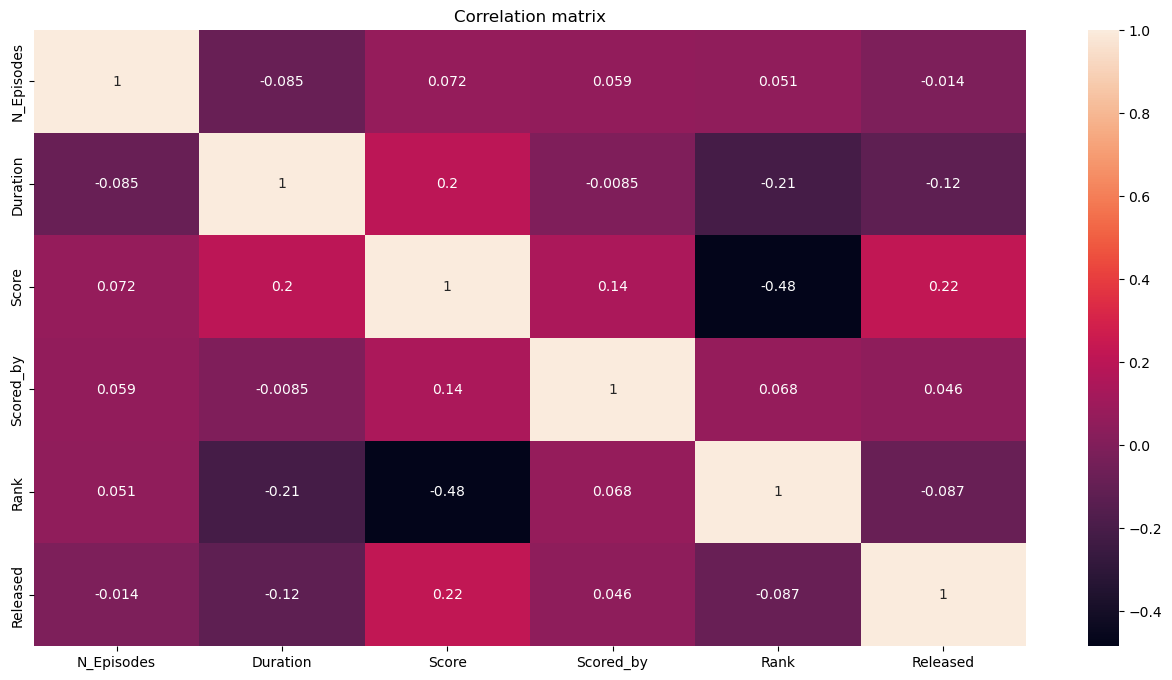

In [3]:
#Heatmap to Check possible correlations for future studies.
utils.heat(df_copy)

## One Dimensional-Analysis

### Numerical Columns

#### N_Episodes

Let's start with a dscribe and a boxplot

In [4]:
df_copy["N_Episodes"].describe()

count    24105.000000
mean        15.234972
std         49.978538
min          1.000000
25%          1.000000
50%          2.000000
75%         13.000000
max       3057.000000
Name: N_Episodes, dtype: float64

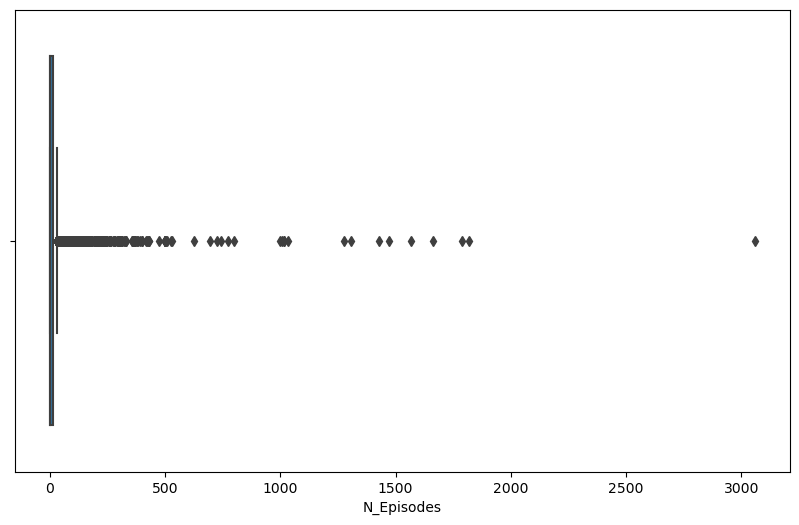

In [5]:
utils.box(df_copy,"N_Episodes","boxplot_Episodes_all")

We ca't really see that much, lets try checking the number of anines with with less than a certain amount of episodes.

We can see that most of the animes of any type, 23563 out of 24105 animes, has less than 100 episodes.

In [6]:
Total = df_copy["N_Episodes"].count() 
less_1000 = df_copy["N_Episodes"][df_copy["N_Episodes"] < 1000 ].count() 
less_500 = df_copy["N_Episodes"][df_copy["N_Episodes"] < 500 ].count()
less_250 = df_copy["N_Episodes"][df_copy["N_Episodes"] < 250 ].count()
less_150 = df_copy["N_Episodes"][df_copy["N_Episodes"] < 150 ].count()
less_100 = df_copy["N_Episodes"][df_copy["N_Episodes"] < 100 ].count()
equals_13 = df_copy["N_Episodes"][df_copy["N_Episodes"] == 13 ].count()
print("There is a total of",Total,"animes")
print ("The number of animes with less than 1000 episodes is",less_1000)
print ("The number of animes with less than 500 episodes is",less_500)
print ("The number of animes with less than 200 episodes is",less_250)
print ("The number of animes with less than 150 episodes is",less_150)
print ("The number of animes with less than 100 episodes is",less_100)
print ("The number of animes equal to 13 episodes is",equals_13)

There is a total of 24105 animes
The number of animes with less than 1000 episodes is 24091
The number of animes with less than 500 episodes is 24075
The number of animes with less than 200 episodes is 23997
The number of animes with less than 150 episodes is 23872
The number of animes with less than 100 episodes is 23563
The number of animes equal to 13 episodes is 1018


However we want to focus on Tv series and ONA.

In [7]:
df_copy["N_Episodes"][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")].describe()

count    11040.000000
mean        31.061413
std         70.570077
min          1.000000
25%         12.000000
50%         13.000000
75%         36.000000
max       3057.000000
Name: N_Episodes, dtype: float64

In [8]:
N_filtered = df_copy["N_Episodes"][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")].count()
print ("The number of animes that are Tv Series or ONA is",N_filtered)

The number of animes that are Tv Series or ONA is 11040


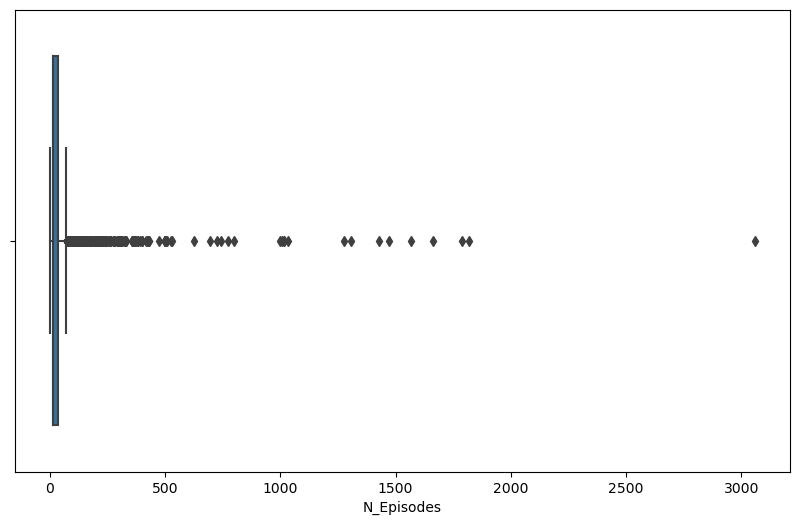

In [9]:
utils.box(df_copy[(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")],"N_Episodes","boxplot_Episodes_ONA_TV")

There are some ouliers that do not let us see properly, let norrow it down

In [10]:
N_filtered_total = df_copy["N_Episodes"][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")].count()

N_filtered = df_copy["N_Episodes"][(df_copy["N_Episodes"] > 100 ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"] > 100 ) & (df_copy["Type"] == "TV")].count()
print ("The number of animes that are Tv Series or ONA with more than 100 episodes is",N_filtered, "out of", N_filtered_total)

N_filtered = df_copy["N_Episodes"][(df_copy["N_Episodes"] <= 100 ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"] <= 100 ) & (df_copy["Type"] == "TV")].count()
print ("The number of animes that are Tv Series or ONA with less or equal to 100 episodes is",N_filtered,"out of", N_filtered_total)

The number of animes that are Tv Series or ONA with more than 100 episodes is 470 out of 11040
The number of animes that are Tv Series or ONA with less or equal to 100 episodes is 10570 out of 11040


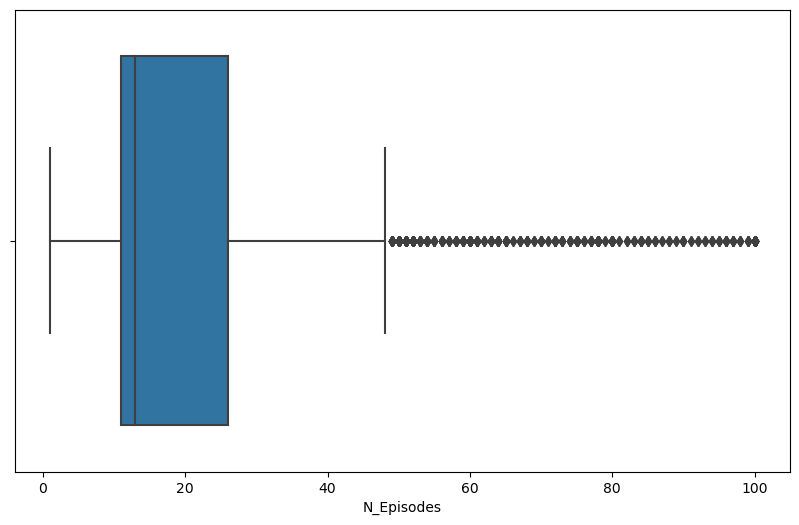

In [11]:
utils.box(df_copy[(df_copy["N_Episodes"] <= 100 ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"] <= 100 ) & (df_copy["Type"] == "TV")],"N_Episodes","Boxplot_Episodes_ONA_TV_less_100")

In [12]:
df_copy["N_Episodes"][(df_copy["N_Episodes"] <= 100 ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"] <= 100 ) & (df_copy["Type"] == "TV")].describe()

count    10570.000000
mean        22.359603
std         19.755440
min          1.000000
25%         11.000000
50%         13.000000
75%         26.000000
max        100.000000
Name: N_Episodes, dtype: float64

Checking the 25th percentile and 75th percentile we get that the Tv Series or ONA animes with less than 100 episodes has between 11 to 26 episodes

In [13]:
N_filtered_total = df_copy["N_Episodes"][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")].count()

N_filtered = df_copy["N_Episodes"][(df_copy["N_Episodes"] <= 26 ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"] <= 26 ) & (df_copy["Type"] == "TV")].count()
print ("The number of animes that are Tv Series or ONA with less or equal to 26 episodes is",N_filtered,"out of", N_filtered_total)

The number of animes that are Tv Series or ONA with less or equal to 26 episodes is 7973 out of 11040


In [14]:
N_filtered_total = df_copy["N_Episodes"][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")].count()

N_filtered = df_copy["N_Episodes"][(df_copy["N_Episodes"].between(11, 26) ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"].between(11, 26) ) & (df_copy["Type"] == "TV")].count()
print ("The number of animes that are Tv Series or ONA with episodes between 11 to 26 is",N_filtered,"out of", N_filtered_total)

The number of animes that are Tv Series or ONA with episodes between 11 to 26 is 5378 out of 11040


#### Duration

First, let’s try doing a hisplot.

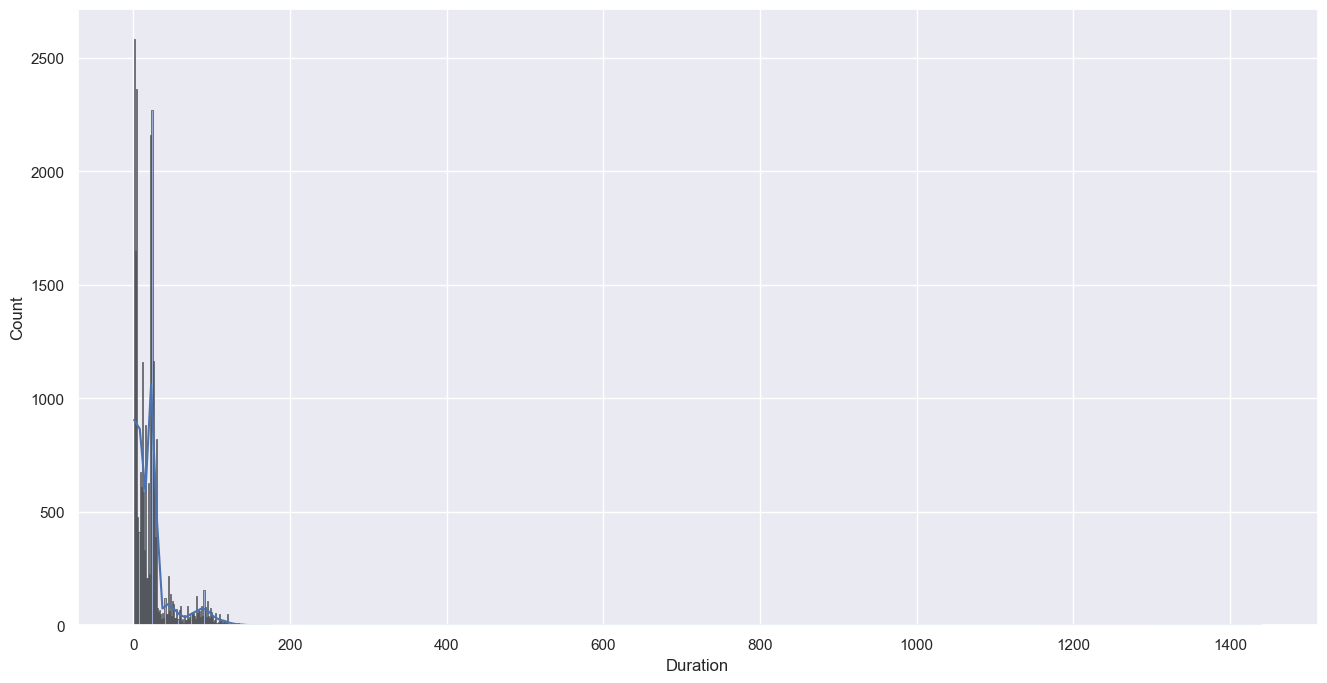

In [15]:
utils.hist_plot_line(df_copy,'Duration',"histplot_Duration")

At first glance is pretty hard to see using a regular histplot, for this reason we are going to use a logarithmic scale.


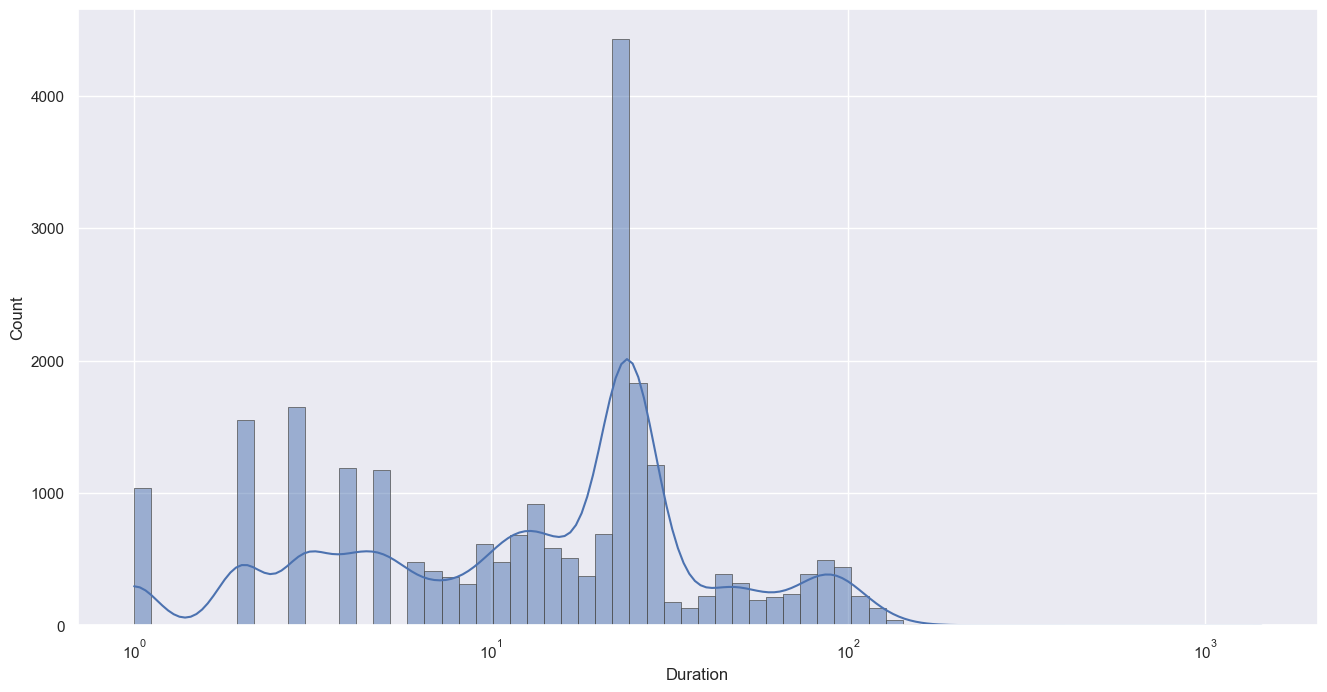

In [16]:
utils.hist_plot_line_logscale(df_copy,'Duration',"histplot_log_scale_Duration")

However, using the logarithmic scale is also pretty hard to get meaningful information. Let’s try a different approach.

We do a .describe() in Duration wo check the number of samples, the mean value, the standard deviation, the minimum, maximum, median and the values corresponding to the 25% and 75% percentiles.

In [17]:
df_copy["Duration"].describe()

count    24105.000000
mean        22.656669
std         26.334477
min          1.000000
25%          5.000000
50%         18.000000
75%         25.000000
max       1440.000000
Name: Duration, dtype: float64

In [18]:
# Get count of animes with more than 25 minutes
count = df_copy["Duration"][df_copy["Duration"] >25].count()
print("There are",count,"animes with more than 25 minutes")

There are 5501 animes with more than 25 minutes


In [19]:
# Get count of animes with more than 25 minutes
count = df_copy["Duration"][df_copy["Duration"] <= 25].count()
print("There are",count,"animes with less than 26 minutes")

There are 18604 animes with less than 26 minutes


We have 24105 anime records, 5501 animes with more than 25 minutes and 18604 animes with more than 25 minutes.

For this reason, let's narrow down the graph with anime lower than 26 minutes. 

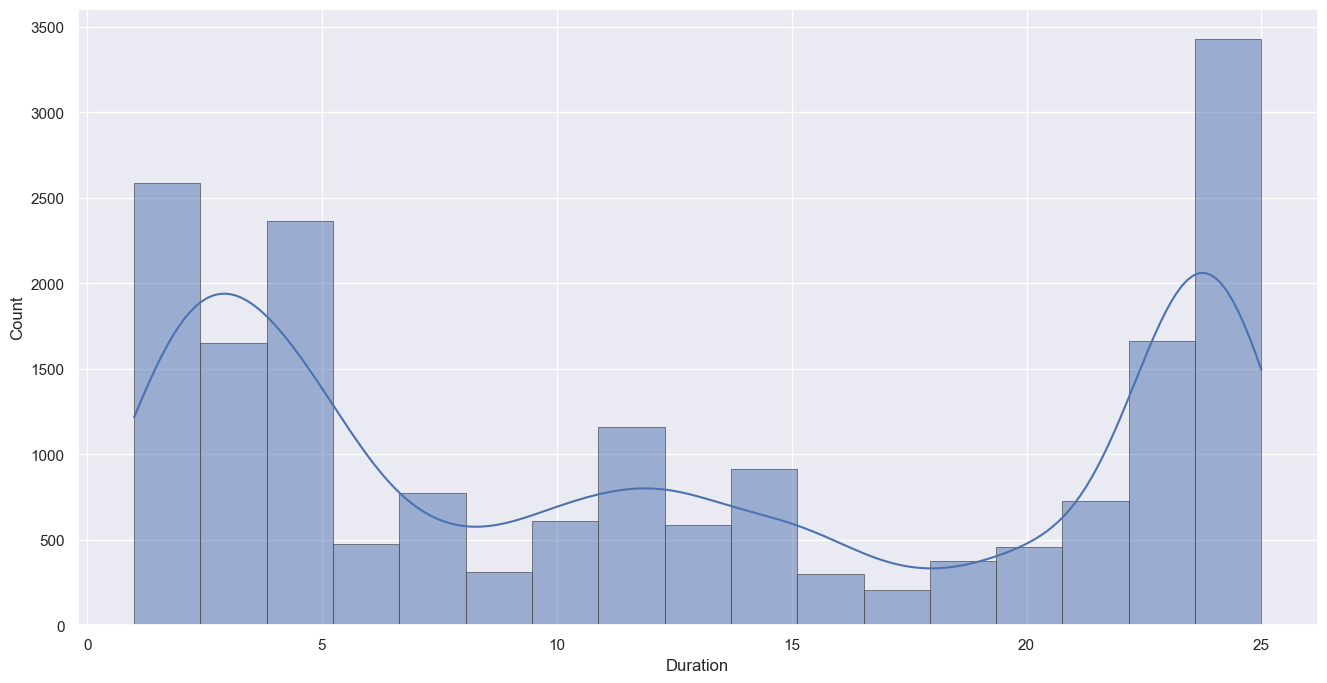

In [20]:
utils.hist_plot_line(df_copy[df_copy["Duration"] <= 25],"Duration","histplot_less_26_Duration")

Now we can see that the distribution tells us that most of the animes has a duration between 5 and 25 minutes.

However, many of those will belong to OVAS, Specials or Movies, so let's check those to belong to Tv Series and ONA
Let's do a boxplot and a describe

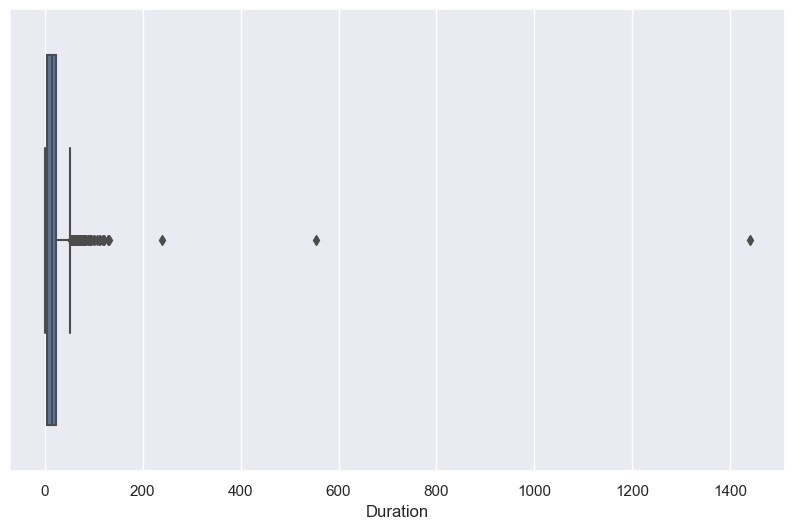

In [21]:
utils.box(df_copy[(df_copy["Type"] == "TV") | (df_copy["Type"] == "ONA")],"Duration","Boxplot_Duration")

Removing ouliers 200

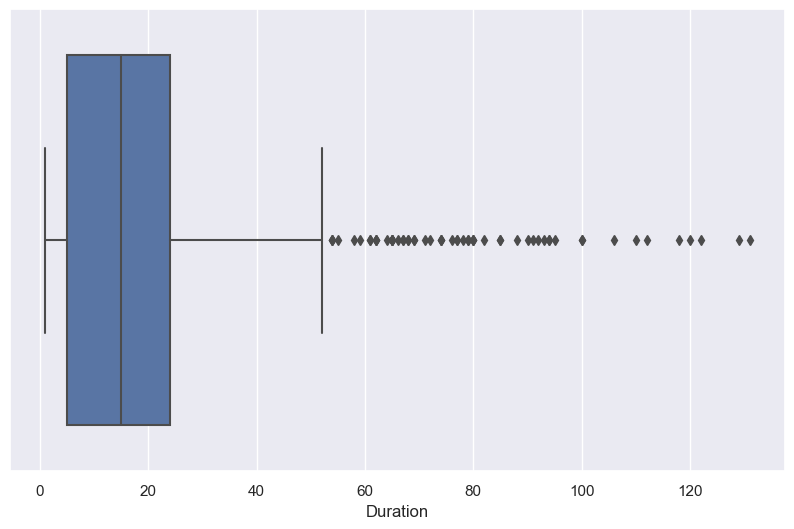

In [22]:
utils.box(df_copy[(df_copy["Duration"] < 200) & (df_copy["Type"] == "TV") | (df_copy["Duration"] < 200) & (df_copy["Type"] == "ONA")],"Duration","Boxplot_Duration_ fromless_200")

In [23]:
df_copy["Duration"][(df_copy["Duration"] < 200) & (df_copy["Type"] == "TV") | (df_copy["Duration"] < 200) & (df_copy["Type"] == "ONA")].describe()

count    11037.000000
mean        15.151037
std         10.364686
min          1.000000
25%          5.000000
50%         15.000000
75%         24.000000
max        131.000000
Name: Duration, dtype: float64

It does not change that much, the animes has a duration between 5 and 24 minutes.

In [24]:
# Get count of animes with more then 24 minutes and are tv series
count = df_copy["Duration"][(df_copy["Duration"] > 24) & (df_copy["Type"] == "TV") | (df_copy["Duration"] > 24) & (df_copy["Type"] == "ONA")].count()
print("There are",count,"animes with more then 25 minutes and are Tv Series or ONA")

There are 1136 animes with more then 25 minutes and are Tv Series or ONA


In [25]:
# Get count of animes between 5 to 24 minutes and are tv series
count = df_copy["Duration"][(df_copy["Duration"] <= 24) & (df_copy["Type"] == "TV") | (df_copy["Duration"] >= 5) & (df_copy["Type"] == "ONA")].count()
print("There are",count,"animes have between 5 to 24 minutes and are Tv Series or ONA")

There are 8678 animes have between 5 to 24 minutes and are Tv Series or ONA


In [26]:
# Get count of animes between 15 to 24 minutes and are tv series
count = df_copy["Duration"][(df_copy["Duration"] <= 24) & (df_copy["Type"] == "TV") | (df_copy["Duration"] >= 15) & (df_copy["Type"] == "ONA")].count()
print("There are",count,"animes have between 15 to 24 minutes and are Tv Series or ONA")

There are 7431 animes have between 15 to 24 minutes and are Tv Series or ONA


In [27]:
# Get count of animes has 24 or less minutes and are tv series
count = df_copy["Duration"][(df_copy["Duration"] <= 24) & (df_copy["Type"] == "TV") | (df_copy["Duration"] <= 24) & (df_copy["Type"] == "ONA")].count()
print("There are",count,"animes has 24 or less minutes and are Tv Series or ONA")

There are 9904 animes has 24 or less minutes and are Tv Series or ONA


In [28]:
# Get count of animes with more than 10 minutes and are tv series
count = df_copy["Duration"][(df_copy["Duration"] >= 5) & (df_copy["Type"] == "TV") | (df_copy["Duration"] >= 5) & (df_copy["Type"] == "ONA")].count()
print("There are",count,"animes with equal or more than 5 minutes and are Tv Series or ONA")

There are 8911 animes with equal or more than 5 minutes and are Tv Series or ONA


In [29]:
# Get count of animes that belongs to TV series
Total = df_copy["N_Episodes"].count() 
tv = df_copy["Type"][(df_copy["Type"] == "TV")|(df_copy["Type"] == "ONA")].count()

print("There are",tv,"animes that belongs to TV series or ONA out of",Total)

There are 11040 animes that belongs to TV series or ONA out of 24105


Basically, from Tv Series or ONA animes, 9904 out of 11040, have 24 or less minutes and just 1136  with more than 24 minutes.
 
There are 8678 animes have between 5 to 24 minutes and are Tv Series or ONA

From TV series or ONA:

    89,71 % 24 or less minutes duration

    10,29 % more than 24 minutes duration

From this:

    78,61 % have between 5 to 24 minutes duration
    
    67,31 % have between 15 to 24 minutes duration

#### Score

After doing a distplot and a boxplot we can see that Most of the animes are scored between 5 to 8

In [33]:
print("There are",len(df_copy[(df_copy['Score'] >= 5) & (df_copy['Score'] <= 6)]),"animes between 5 and 6 points")
print("There are",len(df_copy[df_copy['Score'].between(6,7)]),"animes between 6 and 7 points")
print("There are",len(df_copy[df_copy['Score'].between(7,8)]),"animes between 7 and 8 points")
print("There are",len(df_copy[(df_copy['Score'] >= 8) & (df_copy['Score'] <= 9)]),"animes between 8 and 9 points")

There are 3938 animes between 5 and 6 points
There are 15301 animes between 6 and 7 points
There are 3602 animes between 7 and 8 points
There are 579 animes between 8 and 9 points


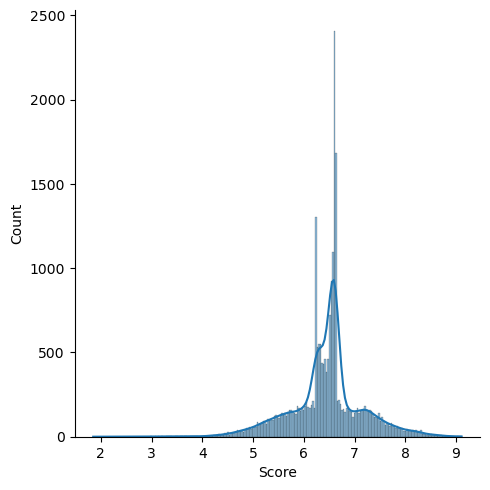

In [3]:
utils.dis_plot(df_copy, 'Score',"displot_Score")

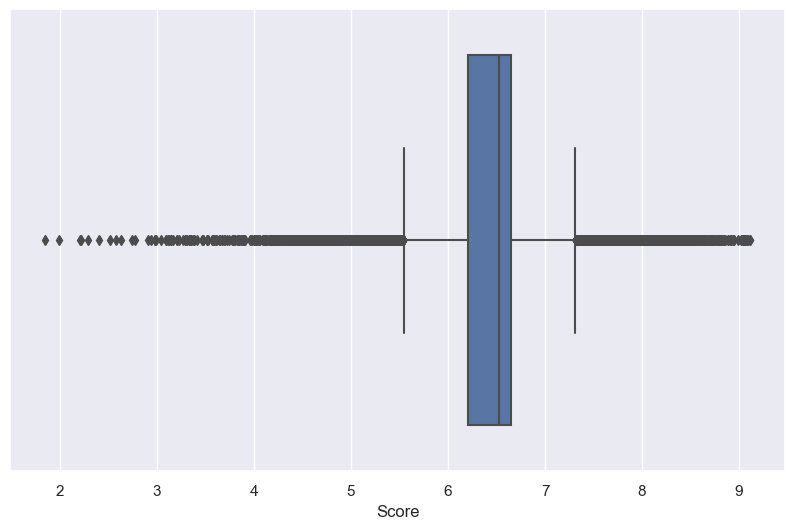

In [34]:
utils.box(df_copy,'Score',"Boxplot_Score_all")

- There are 3938 animes between 5 and 6 points
- There are 15301 animes between 6 and 7 points
- There are 3602 animes between 7 and 8 points
- There are 579 animes between 8 and 9 points

However, we want to focus on TV Series and ONA

In [35]:
score_tv_ona = df_copy[(df_copy['Type'] == "ONA") | (df_copy['Type'] == "TV")]
score_tv_ona["Score"].describe()

count    11040.000000
mean         6.592051
std          0.669742
min          2.290000
25%          6.320000
50%          6.592395
75%          6.750000
max          9.110000
Name: Score, dtype: float64

In [36]:
print("There are",len(score_tv_ona[(score_tv_ona['Score'] < 6.32)]),"animes with less than 6.32 points")
print("There are",len(score_tv_ona[(score_tv_ona['Score'] >= 6.32) & (score_tv_ona['Score'] <= 6.75)]),"animes between 6.32 and 6.75 points")
print("There are",len(score_tv_ona[(score_tv_ona['Score'] > 6.75)]),"animes with more than 6.75 points")

There are 2755 animes with less than 6.32 points
There are 5549 animes between 6.32 and 6.75 points
There are 2736 animes with more than 6.75 points


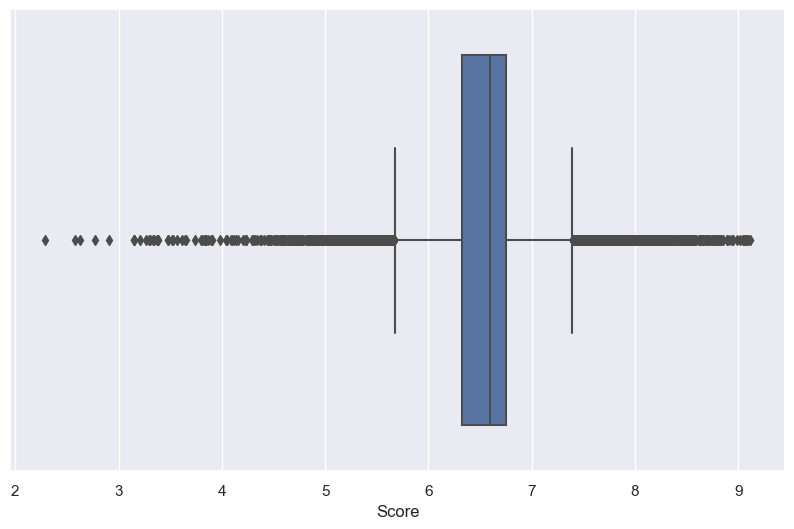

In [37]:
utils.box(df_copy[(df_copy['Type'] == "ONA") | (df_copy['Type'] == "TV")],"Score","Boxplot_Score_TV_ONA")

From TV and ONA:
    There are 2755 animes with less than 6.32 points

    There are 5549 animes between 6.32 and 6.75 points

    There are 2736 animes with more than 6.75 points

It means:

    24,96 % with less than 6.32 points 

    50,26 % between 6.32 and 6.75 points 

    24,78 % with more than 6.75 points

#### Rank

Here we can check the top 20 at this time. We can see that Bleach: Sennen Kessen-hen is number 1 right now in total Score and Kaguya-sama wa Kokurasetai number 3. Both of them recently released. With time and more votes, they could maintain their position or change it, we would not know until some time pass.

In [39]:
df_rank_top = df_copy[df_copy["Rank"] < 21].sort_values(by=["Rank"], ascending=True)
df_rank_top

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
16645,Bleach: Sennen Kessen-hen,TV,Manga,13,24,R - 17+ (violence & profanity),9.11,80321,1,"Action,Adventure,Fantasy",Unknown,2022,Pierrot,"TV Tokyo,Aniplex,Dentsu,Shueisha"
3961,Fullmetal Alchemist: Brotherhood,TV,Manga,64,24,R - 17+ (violence & profanity),9.11,1933742,2,"Action,Adventure,Drama,Fantasy",Military,2009,Bones,"Aniplex,Square Enix,Mainichi Broadcasting Syst..."
17635,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV,Manga,13,23,PG-13 - Teens 13 or older,9.09,373142,3,"Comedy,Romance","Psychological,School",2022,A-1 Pictures,"Aniplex,Mainichi Broadcasting System,Magic Cap..."
5669,Steins;Gate,TV,Visual novel,24,24,PG-13 - Teens 13 or older,9.08,1286088,4,"Drama,Sci-Fi,Suspense","Psychological,Time Travel",2011,White Fox,"Frontier Works,Media Factory,Movic,AT-X,Kadoka..."
9883,Gintama°,TV,Manga,51,24,PG-13 - Teens 13 or older,9.07,227495,5,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2015,Bandai Namco Pictures,"TV Tokyo,Aniplex,Dentsu"
14879,Shingeki no Kyojin Season 3 Part 2,TV,Manga,10,23,R - 17+ (violence & profanity),9.06,1386387,6,"Action,Drama","Gore,Military,Survival",2019,Wit Studio,"Production I.G,Dentsu,Mainichi Broadcasting Sy..."
5991,Gintama',TV,Manga,51,24,PG-13 - Teens 13 or older,9.05,217364,7,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2011,Sunrise,"TV Tokyo,Aniplex,Dentsu,Trinity Sound,Miracle ..."
15542,Gintama: The Final,Movie,Manga,1,104,PG-13 - Teens 13 or older,9.05,56776,8,"Action,Comedy,Drama,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2021,Bandai Namco Pictures,"TV Tokyo,Warner Bros. Japan"
7242,Gintama': Enchousen,TV,Manga,13,24,PG-13 - Teens 13 or older,9.04,151944,9,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2012,Sunrise,"TV Tokyo,Aniplex,Dentsu,Shueisha,Miracle Bus"
6458,Hunter x Hunter (2011),TV,Manga,148,23,PG-13 - Teens 13 or older,9.04,1569486,10,"Action,Adventure,Fantasy",Unknown,2011,Madhouse,"VAP,Nippon Television Network,Shueisha"


#### Released

We can see a serious increase the 80's. At that time, anime became mainstream in Japan, experiencing a boom in production with the rise in popularity of anime like Gundam, Macross, Dragon Ball, and genres such as real robot, space opera and cyberpunk.

We can appreciate a declive in releases during 2019 and 2020, this could be duo to the COVID-19 period.

Another possible factor is that during the last years in the anime industry, there are so many copy-and-paste anime. The only difference may be the relationship between characters, slight changes in the plot, and different characters and/or setting. The anime industry has definitely declined in quality and uniqueness throughout the years. However, there are still releasing some great gems that keep the industry still strong, lately examples: My Hero Academia, Attack On Titan, Tokyo Revengers, Jujutsu Kaisen and Kimetsu no Yaiba.

In [40]:
df_copy['Released'].unique()

array([1998, 2001, 2002, 2004, 2005, 1999, 2003, 1995, 1997, 1996, 1988,
       1993, 2000, 1979, 1989, 1991, 1985, 1986, 1994, 1992, 1990, 1978,
       1973, 2006, 1987, 1984, 1982, 1977, 1983, 1980, 1976, 1968, 1981,
       2007, 1971, 1967, 1975, 1962, 1965, 1969, 1974, 1964, 2008, 1972,
       1970, 1966, 1963, 1945, 2009, 2012, 2021, 1933, 1929, 1943, 2010,
       1931, 1930, 1932, 1934, 1936, 1928, 1960, 1958, 2011, 1959, 1947,
       1917, 1935, 1938, 1939, 1941, 1942, 1948, 1950, 1957, 1961, 1918,
       1924, 1925, 1926, 1927, 1937, 1940, 1944, 1946, 1949, 1951, 1952,
       1953, 1954, 1955, 1956, 2016, 2013, 2019, 2018, 2014, 2015, 2017,
       2022, 2020, 2023, 2024, 1921])

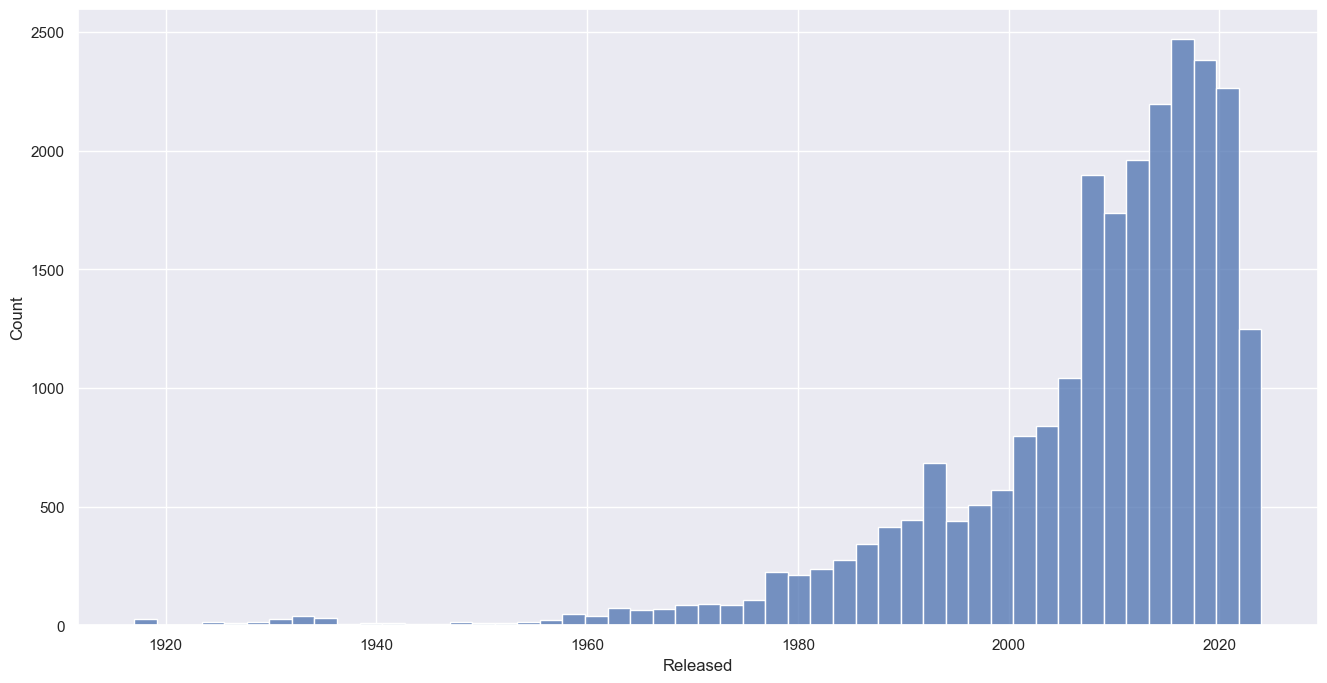

In [42]:
utils.hist_plot(df_copy,"Released","hisplot_released")

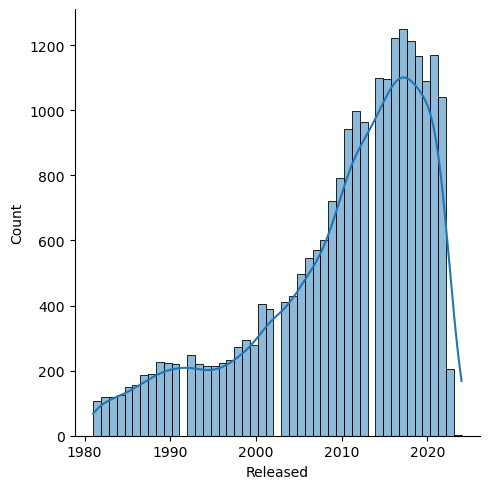

In [4]:
utils.dis_plot(df_copy[df_copy["Released"] > 1980], 'Released',"displot_Released_since_1980")

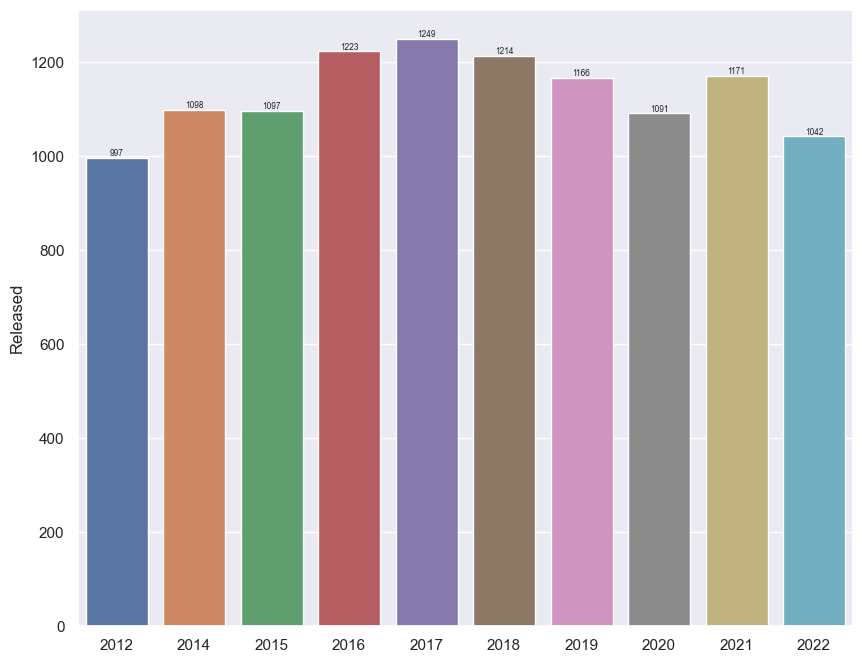

In [44]:
utils.barplot_top10(df_copy['Released'],"Barplot_Released_top10")

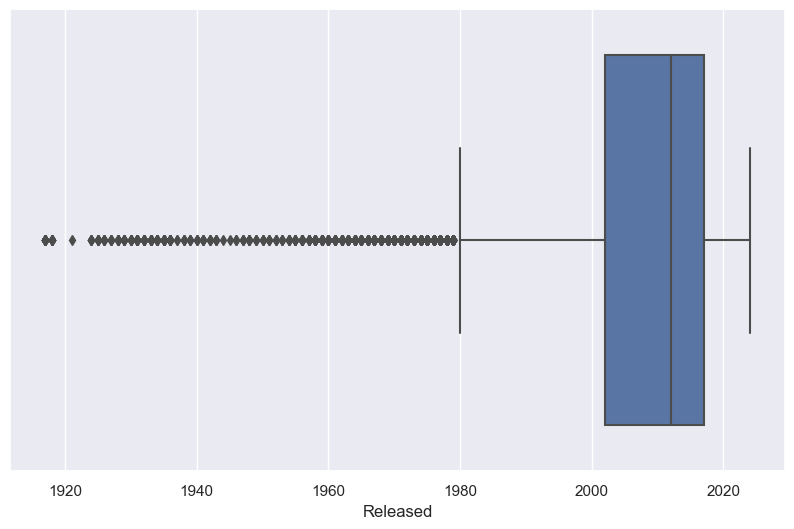

In [45]:
utils.box(df_copy,'Released',"Boxplot_Released_All")

Over here we can see the evolution of type of animes per year. So far TV series were the favourite type from the late 20's, however, since 2000 we can see that ONA is getting more popular. We will need to see what happen in the coming years.

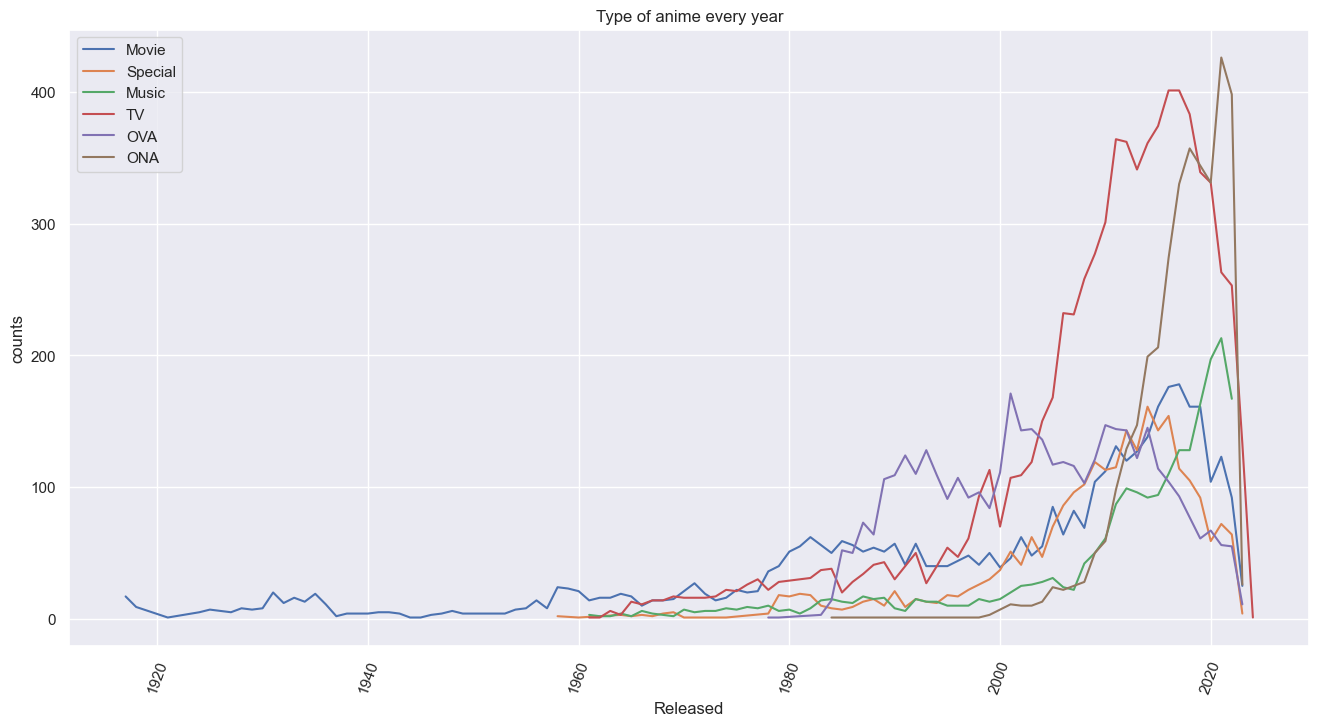

In [47]:
df_released = df_copy[(df_copy["Type"]  != "Unknown")]
utils.line_plot(df_released,'Type','Released','Type of anime every year',"Lineplot_Type_by_year")

In [48]:
release_since_1980 = df_copy['Released'][(df_copy['Released'] >= 1980)].count()
print("From 1980 until today",release_since_1980,"animes has been released")

release_since_2020 = df_copy['Released'][(df_copy['Released'] >= 2000)].count()
print("From 2000 until today",release_since_2020,"animes has been released")

release_since_2020 = df_copy['Released'][(df_copy['Released'] >= 2000) & (df_copy['Type'] == "ONA") | (df_copy['Released'] >= 2000) & (df_copy['Type'] == "TV")].count()
print("From 2000 until today",release_since_2020,"TV series and ONA has been released")

since_2020_movie = df_copy['Released'][(df_copy['Released'] >= 2000) & (df_copy['Type'] == "Movie")].count()
print("From 2000 until today",since_2020_movie,"Movies has been released")

since_2020_specials = df_copy['Released'][(df_copy['Released'] >= 2000) & (df_copy['Type'] == "Special")].count()
print("From 2000 until today",since_2020_specials,"specials has been released")

since_2020_ova = df_copy['Released'][(df_copy['Released'] >= 2000) & (df_copy['Type'] == "OVA")].count()
print("From 2000 until today",since_2020_ova,"OVAs has been released")

since_2020_music = df_copy['Released'][(df_copy['Released'] >= 2000) & (df_copy['Type'] == "Music")].count()
print("From 2000 until today",since_2020_music,"music videos has been released")

since_2020_Unknown = df_copy['Released'][(df_copy['Released'] >= 2000) & (df_copy['Type'] == "Unknown")].count()
print("From 2000 until today",since_2020_Unknown,"Unknown has been released")

From 1980 until today 22958 animes has been released
From 2000 until today 19105 animes has been released
From 2000 until today 9853 TV series and ONA has been released
From 2000 until today 2463 Movies has been released
From 2000 until today 2178 specials has been released
From 2000 until today 2620 OVAs has been released
From 2000 until today 1918 music videos has been released
From 2000 until today 73 Unknown has been released


From 2000 until today 19105 animes has been released, 79,26 % of all anime.
- 9853 TV series and ONA has been released
- 2463 Movies has been released
- 2178 specials has been released
- 2620 OVAs has been released
- 1918 music videos has been released
- 73 Unknown has been released

It means:

- 51,57 % TV series or ONA
- 12,89 % are movies
- 11,4 % are specials
- 13,71 % are OVAs
- 10,04 % are music videos
- 0,39 % does not fall to any category

### Categorical Columns

#### Dictribución de variables categóricas

#### Type

First lets define some of this names:
- **Original Net Animation (ONA)** is an anime that is directly released onto the Internet.
- **Original Video Animation (OVA)** is an animated film or series made specially for release in home-video formats. OVA is created for selling (by Video or DVD). It's intended to the small number of viewer without advertisement. It means more otaku friendly theme.
- **Movie** are just regular movies of the anime, it could be part of the story or ir could be not.
- **TV** regular anime series broadcasted on TV.
- **Special** (aka TV Special) is not weekly. Usually yearly or one shot. It's have only one episode but it's have longer length (ex 2 hours). It's still intended for broadcast.
- **Music** are Anime Music Video (anime music video, better known by the acronym AMV), is a music video generally made with an Anime theme. The main characteristic of AMVs is that they are composed of scenes from one or more anime series or movies accompanied by a song that seeks to synchronize with the rhythm of the latter.

As we can see below, most of the anime are TV type (regular series).

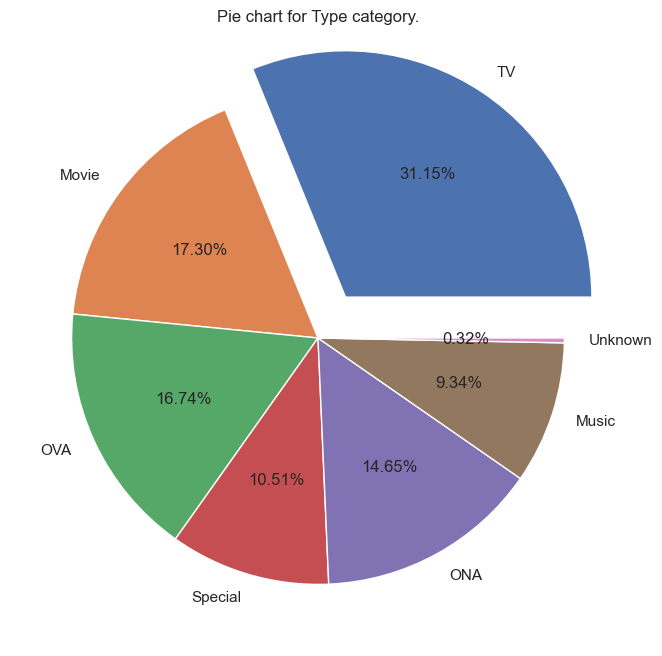

In [49]:
utils.pieplot(df_copy["Type"],"Type")

In [50]:
ntype = df_copy['Type'].value_counts()
ntype

TV         7509
Movie      4169
OVA        4034
ONA        3531
Special    2534
Music      2252
Unknown      76
Name: Type, dtype: int64

#### Source

So, what is source material? It's the material that's the source of the story or content used in an anime. Sometimes anime has original stories, which I'll get to in a bit, but often they're based off pre-existing works such as manga, light novels, visual novels, etc....

We can see that most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves). Manga and game are also a popular source for animes. Of all the anime we have in the list, 24105, there are a total of 14681 that come from an original source, manga or game. This means that 60.90437666685334995 % of the anime belong to this group.

In [51]:
nsource = df_copy['Source'].value_counts()
nsource

Original        8920
Manga           4570
Unknown         3899
Game            1191
Visual novel    1102
Other            964
Light novel      951
Novel            735
Web manga        383
Music            378
4-koma manga     312
Picture book     198
Book             177
Mixed media      125
Web novel        118
Card game         69
Radio             13
Name: Source, dtype: int64

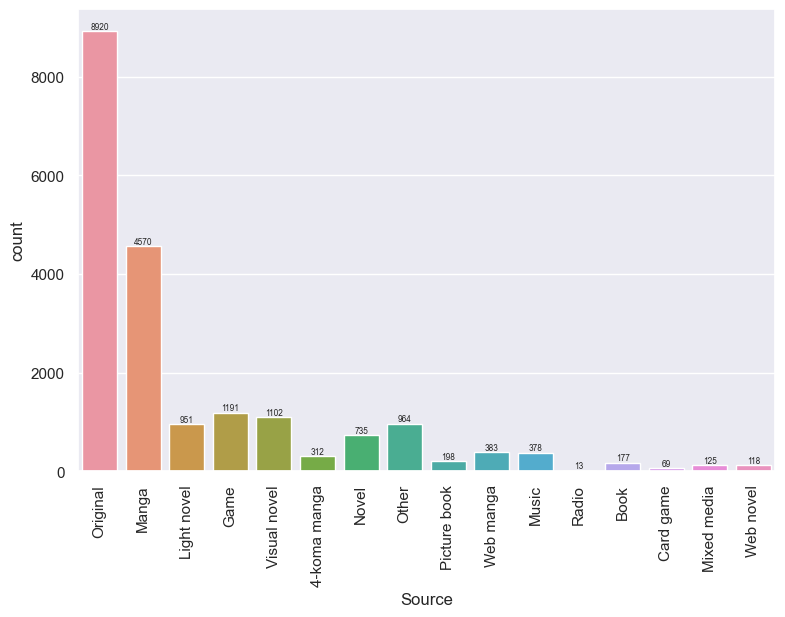

In [52]:
main_sources = df_copy[(df_copy['Source'] != "Unknown")]
utils.simple_countplot(main_sources,'Source', "Countplot_all_Source_no_unkowns")


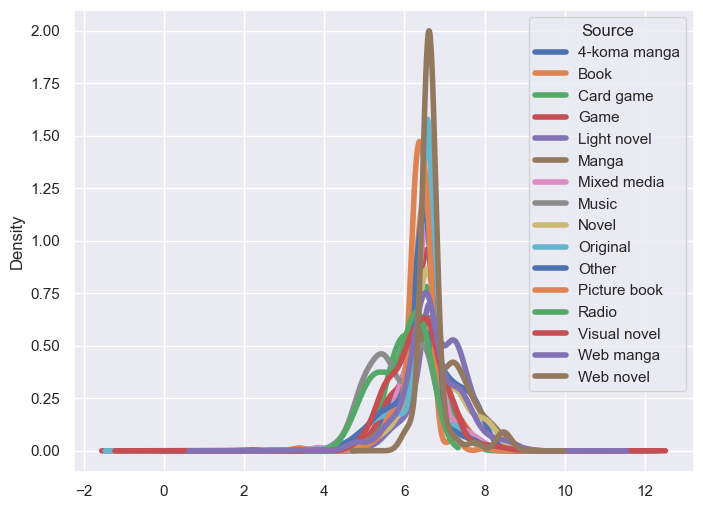

In [53]:
utils.density(main_sources,'Source',"Score","Density_Source_Score")

In [54]:
print("Of all the anime we have in the list,",len(df_copy),",there are a total of",len(main_sources),"that come from an original source, manga or game. This means that",
((len(main_sources) * 100) / len(df_copy)),"% of the anime belong to this group.")

Of all the anime we have in the list, 24105 ,there are a total of 20206 that come from an original source, manga or game. This means that 83.82493258660028 % of the anime belong to this group.


However, let's focus con TV and ONA sources

In [55]:
nsource_tv_ona = df_copy['Source'][(df_copy['Type'] == "TV") | (df_copy['Type'] == "ONA")].value_counts()
nsource_tv_ona

Original        4279
Manga           2121
Unknown         1388
Game             649
Light novel      545
Other            484
Novel            439
Web manga        304
4-koma manga     188
Visual novel     184
Web novel        116
Picture book     100
Mixed media       82
Book              71
Card game         58
Music             25
Radio              7
Name: Source, dtype: int64

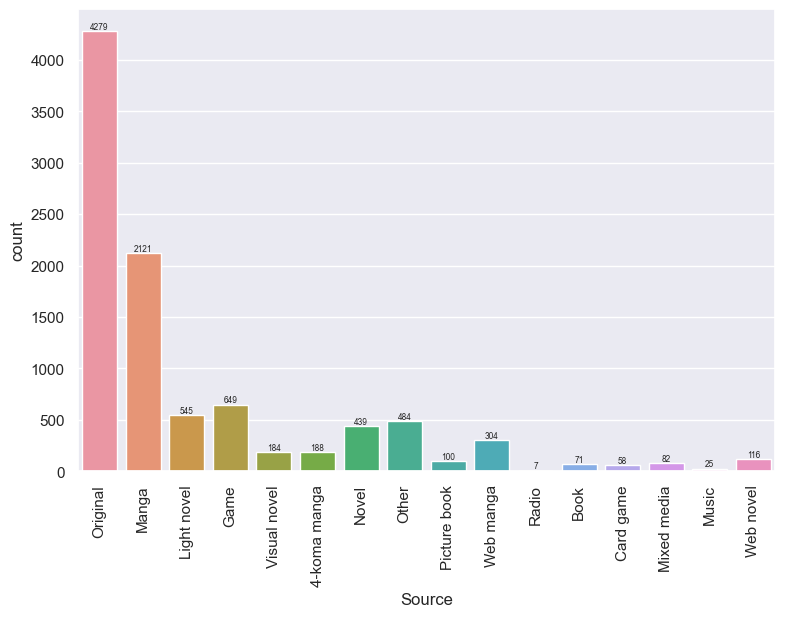

In [56]:
main_sources_tv_ona = df_copy[(df_copy['Source'] != "Unknown") & (df_copy['Type'] == "TV") | (df_copy['Source'] != "Unknown") & (df_copy['Type'] == "ONA")]
utils.simple_countplot(main_sources_tv_ona,'Source', "Countplot_Source_TV_ONA_no_unkowns")

- Most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves)

    From 11040 animes that belong to TV series and ONA. The 63,85 % come from an original source, manga or game.

        38,76 % comes from an Original source

        19,21 % comes from a Manga source

        5,88 % comes from a game source

#### Rating

These only represent target demographics and don’t describe what content is in the anime

- Rated G: General audiences – All ages admitted.
- Rated PG: Parental guidance suggested – Some material may not be suitable for children.
- Rated PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
- Rated R: Restricted – Under 17 requires accompanying parent or adult guardian.
- Rated Rx: Hentai. No one under 18 admitted.
- Rated R+: Means that there is nudity. Restricted – Under 17 requires accompanying parent or adult guardian

In [57]:
df_copy["Rating"].value_counts()

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Unknown                            790
Name: Rating, dtype: int64

In [58]:
df_copy["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

PG-13 - Teens 13 or older is the most popular

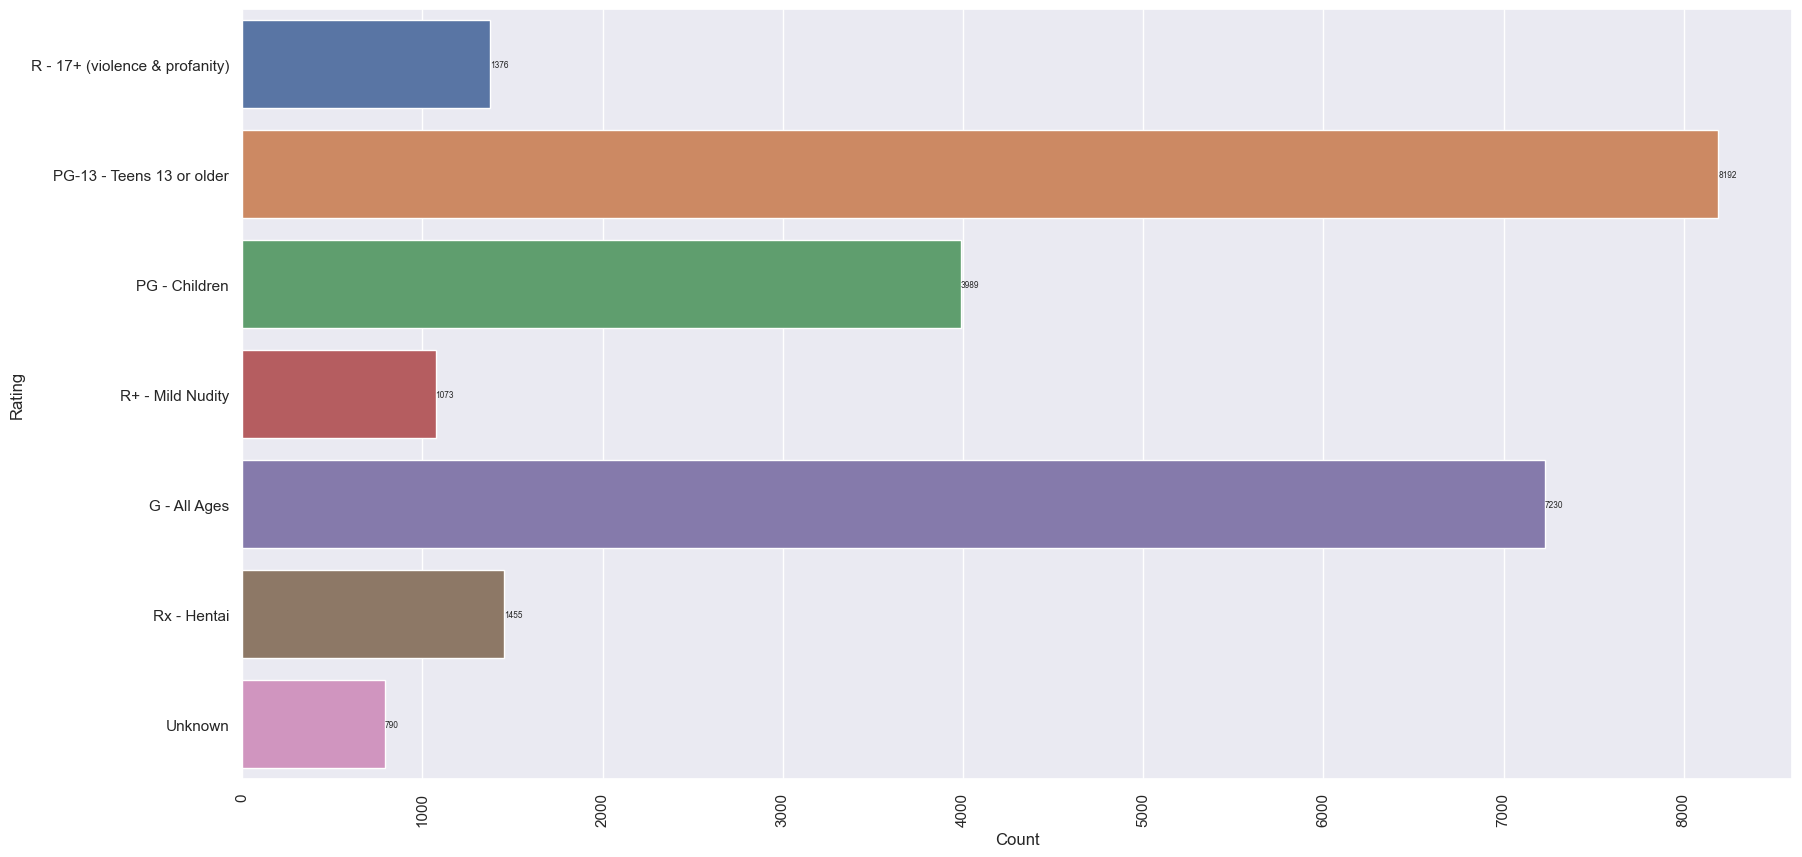

In [59]:
utils.simple_barplot(df_copy["Rating"],"Rating","Barplot_Unidimensional_ALL_Rating")

In [60]:
df_copy["Rating"][(df_copy["Type"] == "TV") | (df_copy["Type"] == "ONA")].value_counts()

PG-13 - Teens 13 or older         4275
PG - Children                     2872
G - All Ages                      2447
R - 17+ (violence & profanity)     708
Unknown                            379
R+ - Mild Nudity                   304
Rx - Hentai                         55
Name: Rating, dtype: int64

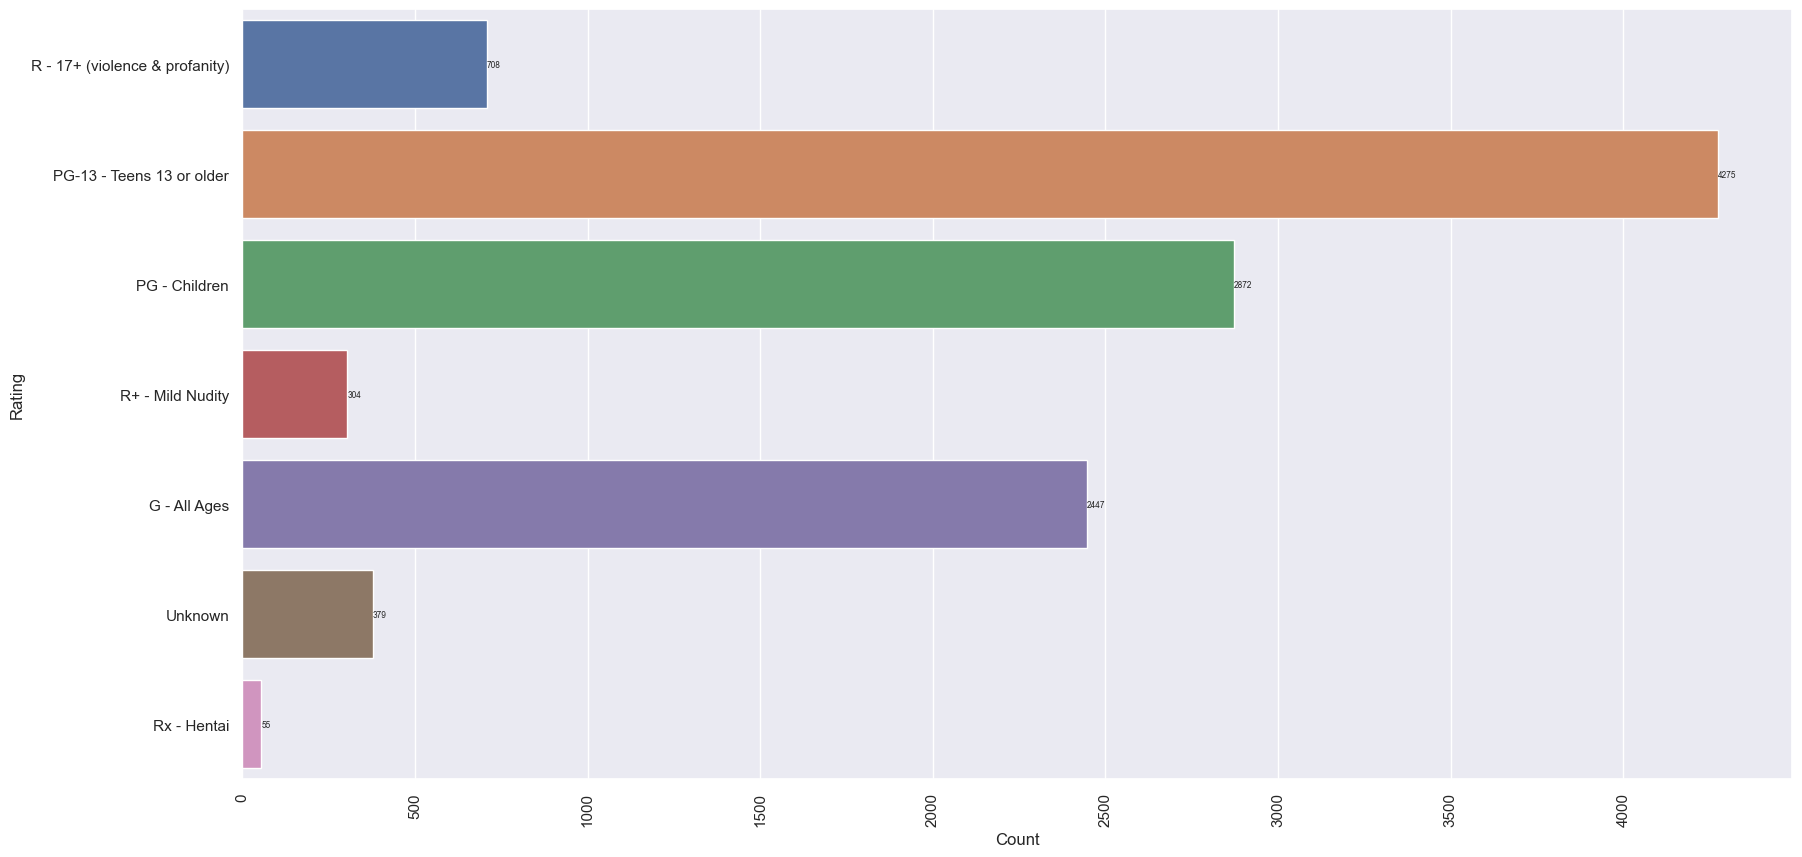

In [61]:
utils.simple_barplot(df_copy["Rating"][(df_copy["Type"] == "TV") | (df_copy["Type"] == "ONA")],"Rating","Barplot_Unidimensional_TV_ONA_Rating")

#### Genre

The different types of anime are in the dozens. If you’re an avid watcher of the Big 3 Anime, then you may have come to learn that every show is based on a specific anime genre.

Today, anime is available in a wide range of genres such as drama, action, supernatural, and horror, to mention a few. They are made for a young girl or young boy as well as adults. They feature tough female characters and handsome male characters.

We can appreciate that Comedy Genre is the most typical one.

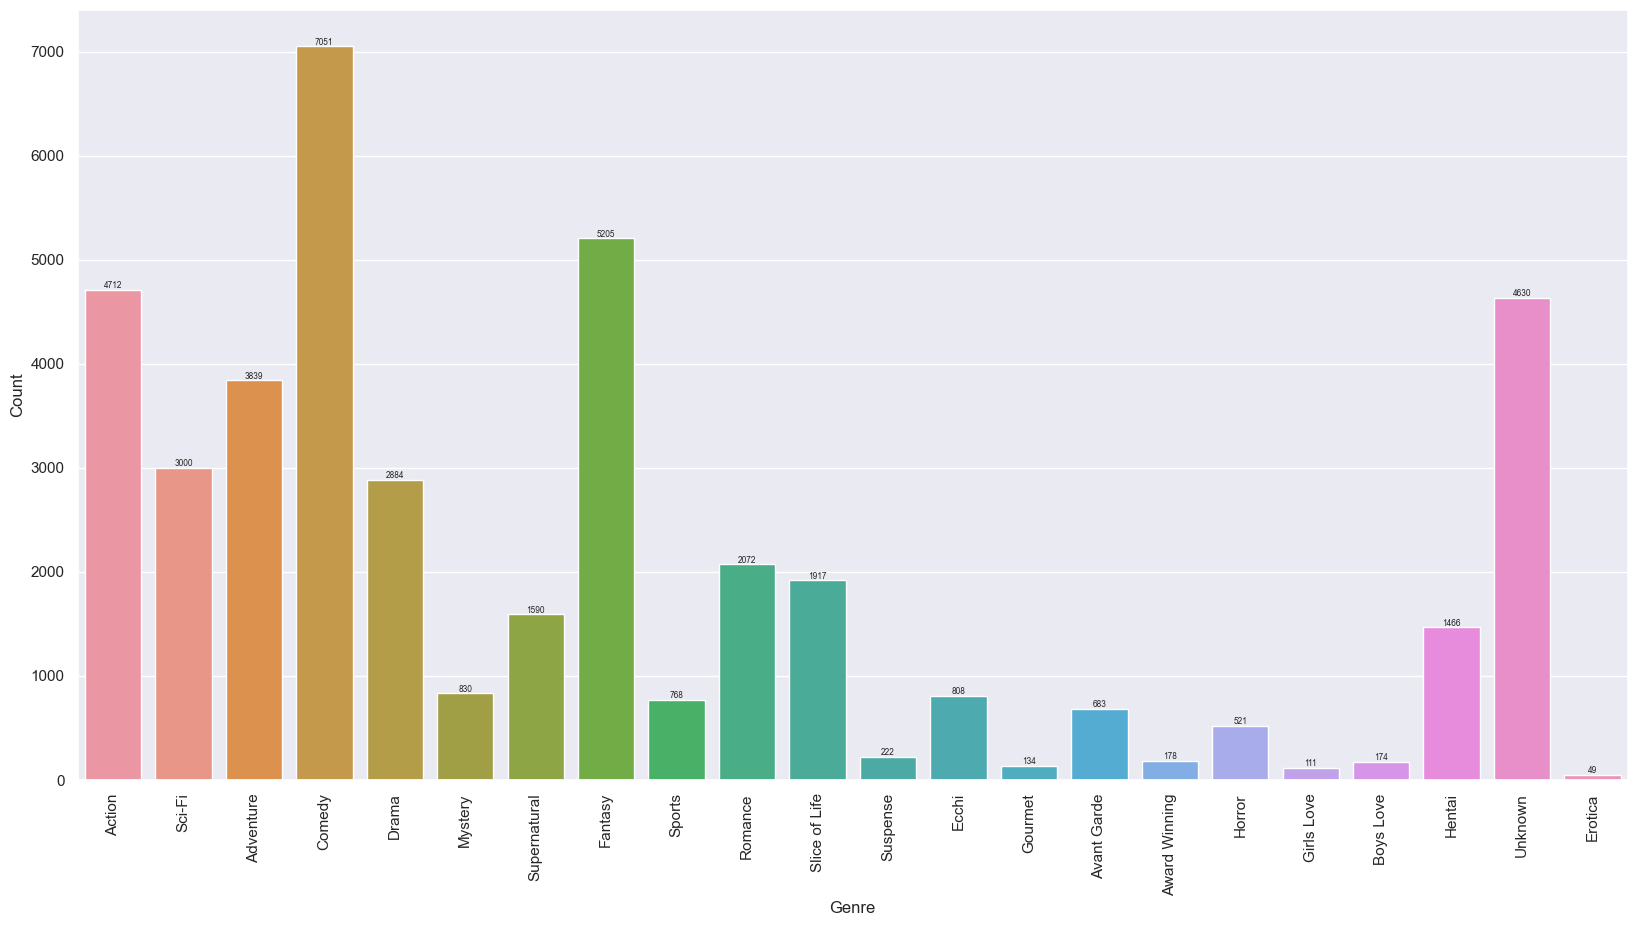

In [62]:
utils.complex_barplot(df_copy["Genre"],"Genre","Barplot_Genre_all")

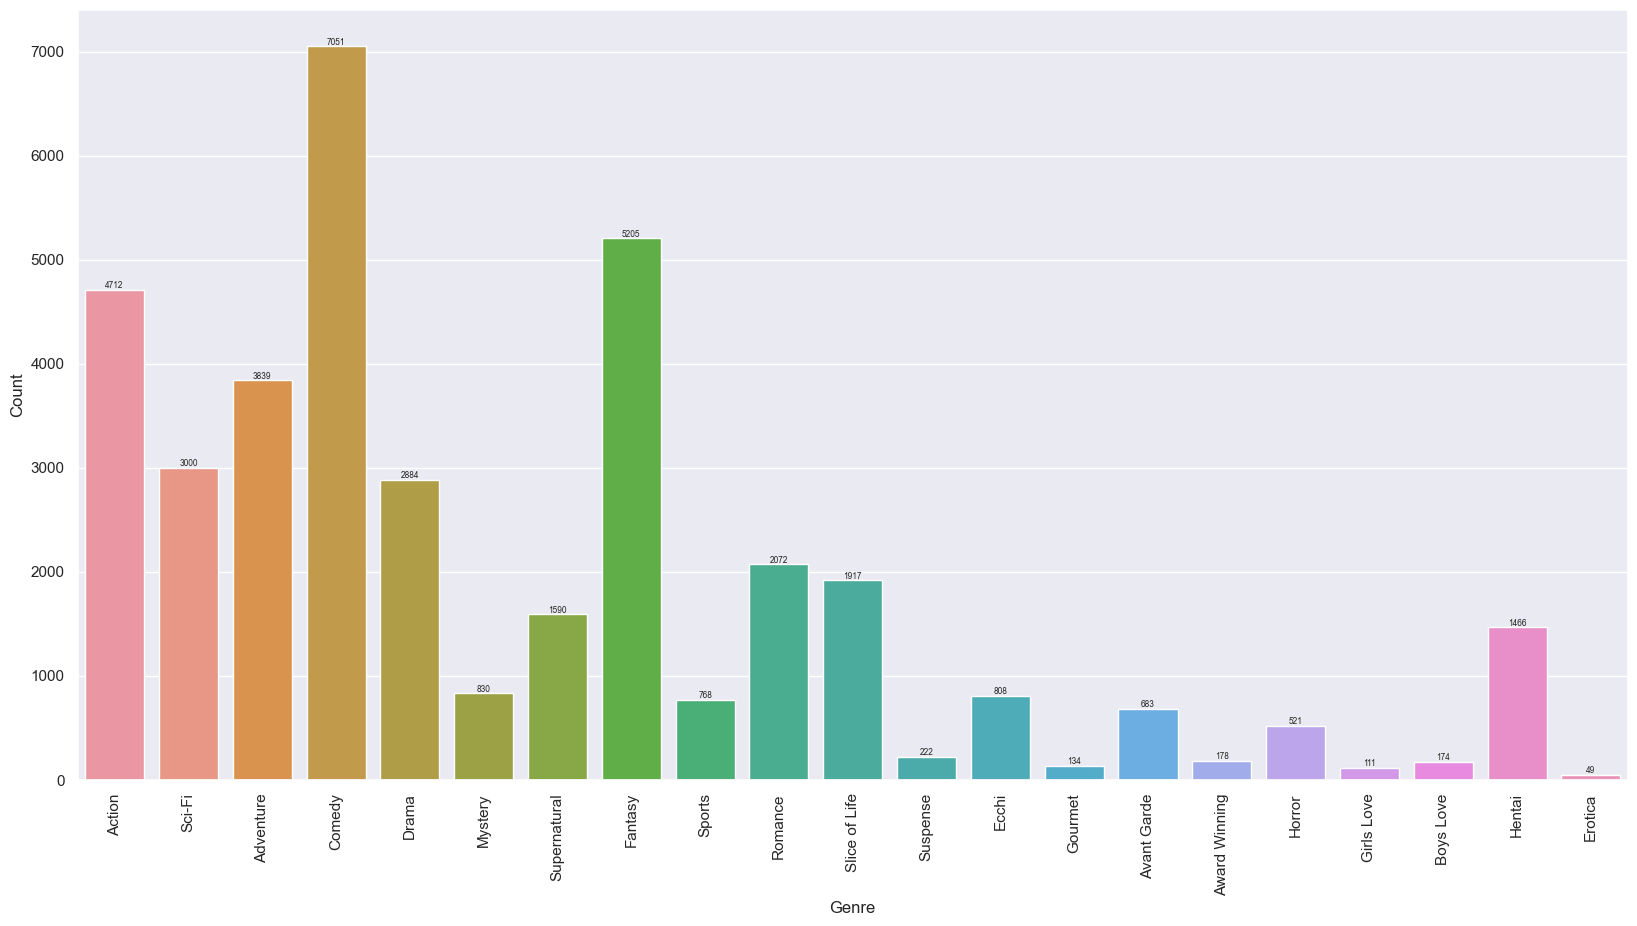

In [63]:
no_unknown = df_copy["Genre"][(df_copy["Genre"] != "Unknown")]
utils.complex_barplot(no_unknown,"Genre","Barplot_Genre_no_unknowns")

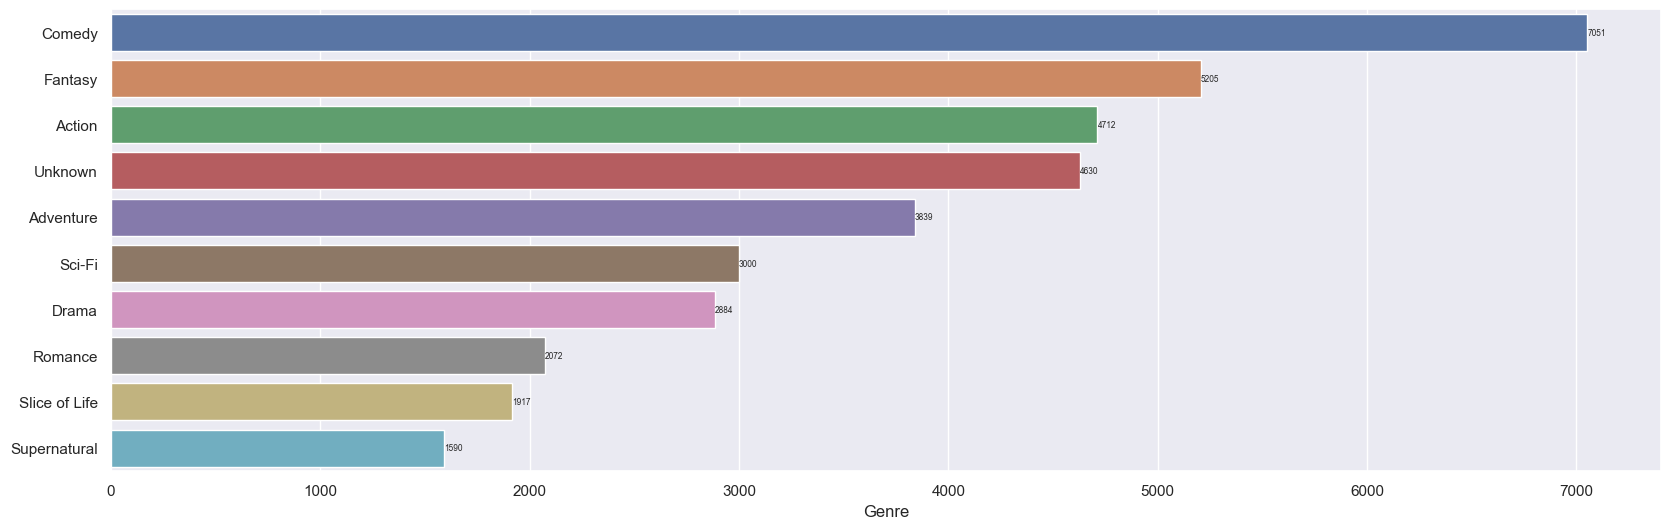

In [64]:
# Genres: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Genre"],"Barplot_Top10_Genre_no_unknowns")

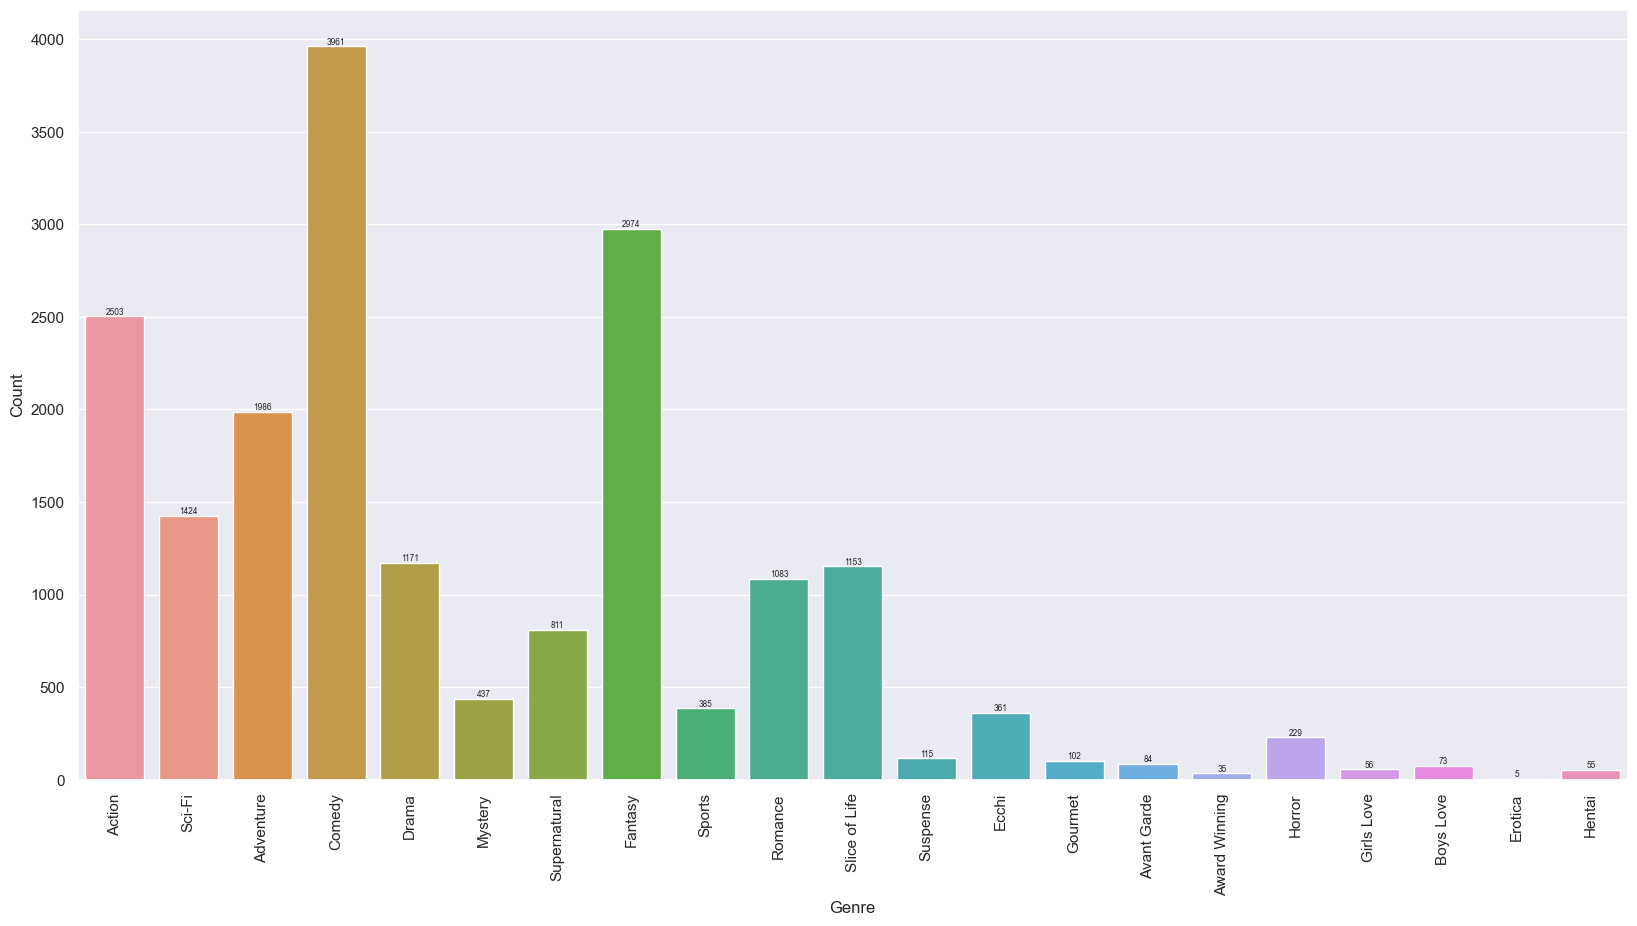

In [65]:
no_unknown_onatv = df_copy["Genre"][(df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "TV")]
utils.complex_barplot(no_unknown_onatv,"Genre","Barplot_Genre_no_unknowns")

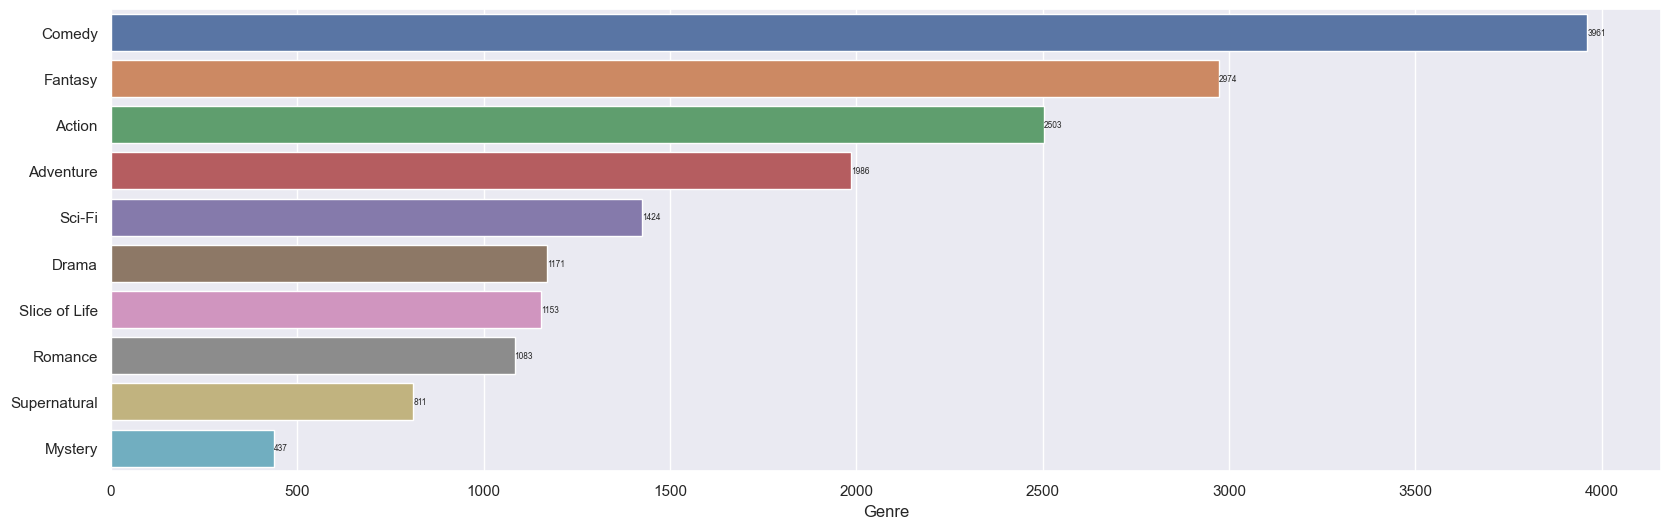

In [66]:
# Genres: Top 10. sns.barplot
no_unknown_onatv = df_copy["Genre"][(df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "TV")]
utils.complex_barplot_top10(no_unknown_onatv,"Barplot_Top10_tv_ona_Genre_no_unknowns")

In [67]:
splitted_data = df_copy["Genre"][(df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode()
splitted_data.count()

19003

In [68]:
splitted_data = df_copy["Genre"][(df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().head(10)
splitted_data

Comedy           3961
Fantasy          2974
Action           2503
Adventure        1986
Sci-Fi           1424
Drama            1171
Slice of Life    1153
Romance          1083
Supernatural      811
Mystery           437
Name: Genre, dtype: int64

In [69]:
splitted_index = df_copy["Genre"][(df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().head(10).index
splitted_index

Index(['Comedy', 'Fantasy', 'Action', 'Adventure', 'Sci-Fi', 'Drama',
       'Slice of Life', 'Romance', 'Supernatural', 'Mystery'],
      dtype='object')

In [70]:
df_copy["Genre"][(df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] != "Unknown") & (df_copy["Type"] == "TV")].count()

9316

In [71]:
df_copy["Genre"][ (df_copy["Type"] == "ONA") |  (df_copy["Type"] == "TV")].count()

11040

In [72]:
df_copy["Genre"][ (df_copy["Genre"] == "Comedy") & (df_copy["Type"] == "ONA") | (df_copy["Genre"] == "Comedy") &  (df_copy["Type"] == "TV")].count()

1345

The top 10 genres represent the 91,39 % of all anime
20,73 % comedy
15,57 % fantasy
13,1 % action
10,13 % adventure
7,49 % Sci-Fi
6,13 % Drama
6,04 % Slice of Life
5,67 % Romance
4,24 % Supernatural
2,29 % Mystery


#### Theme

Music, School and history theme are the ones with more animes.

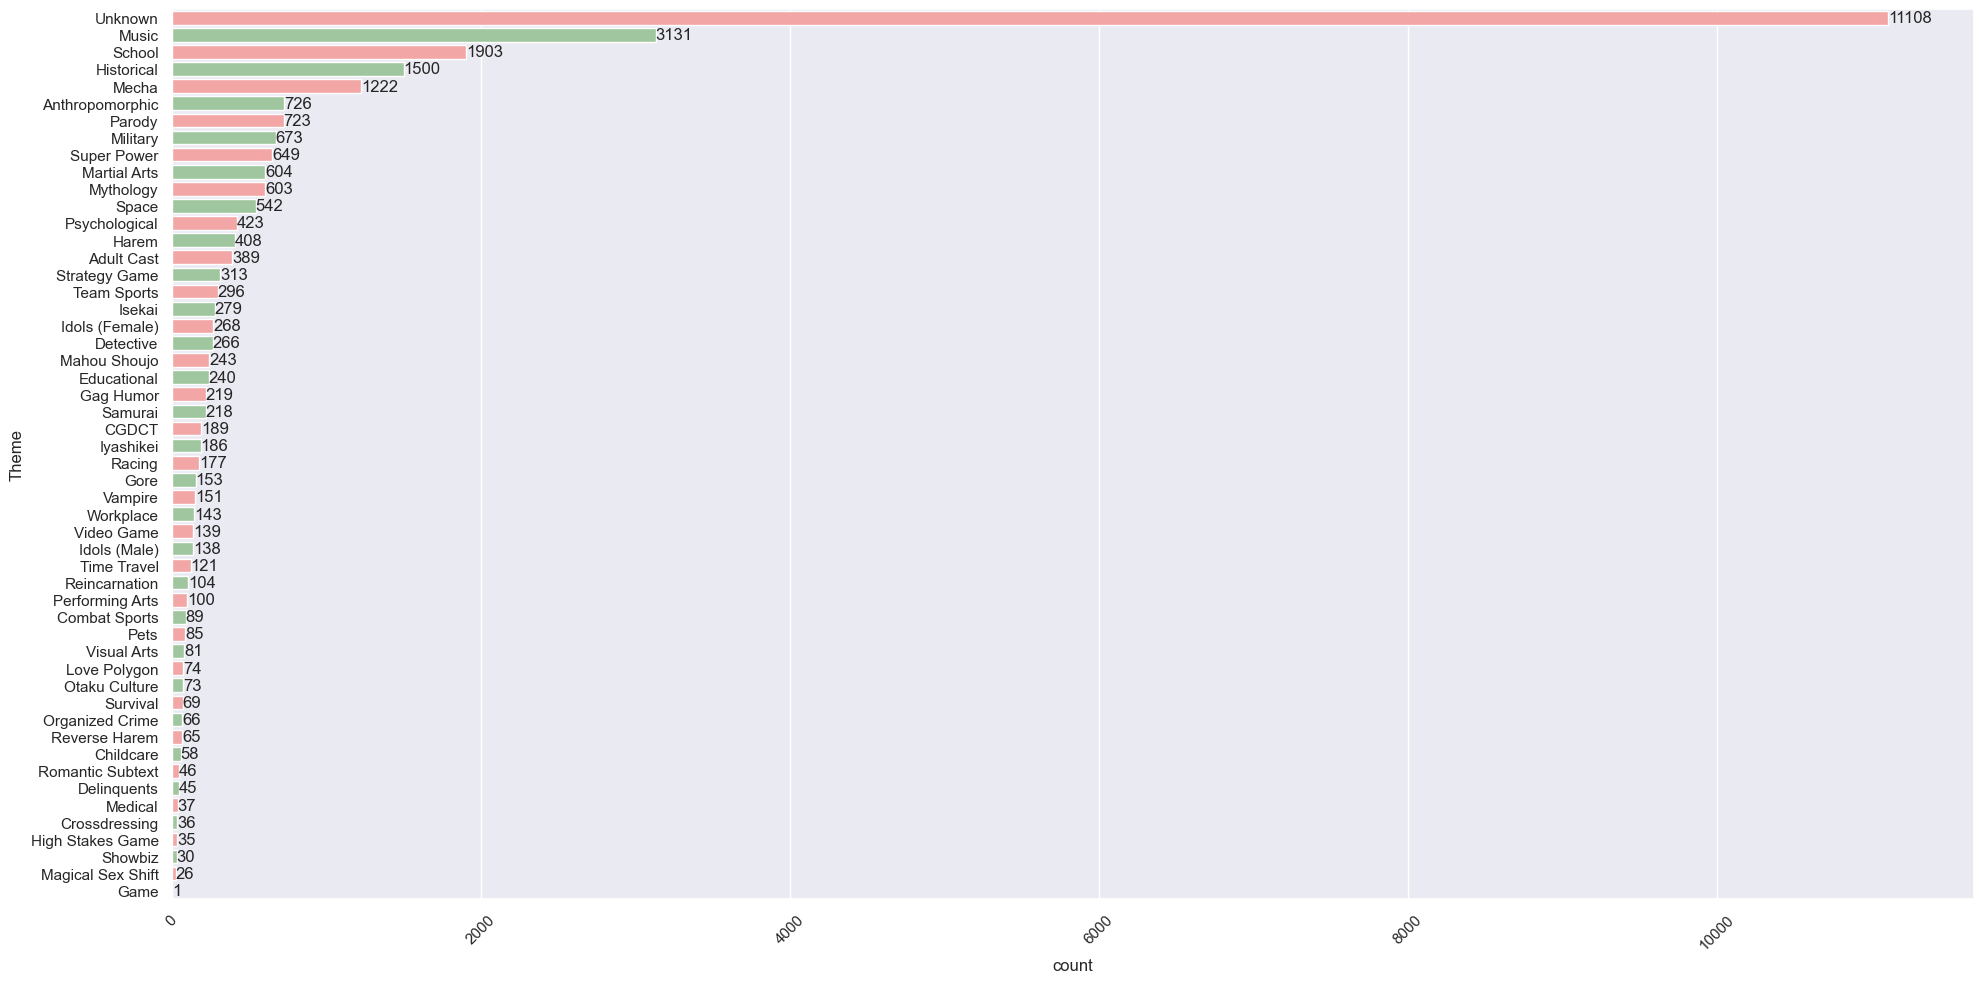

In [73]:
utils.countplot(df_copy["Theme"],"Theme")

We remove the unknowns from the countplot to see it better

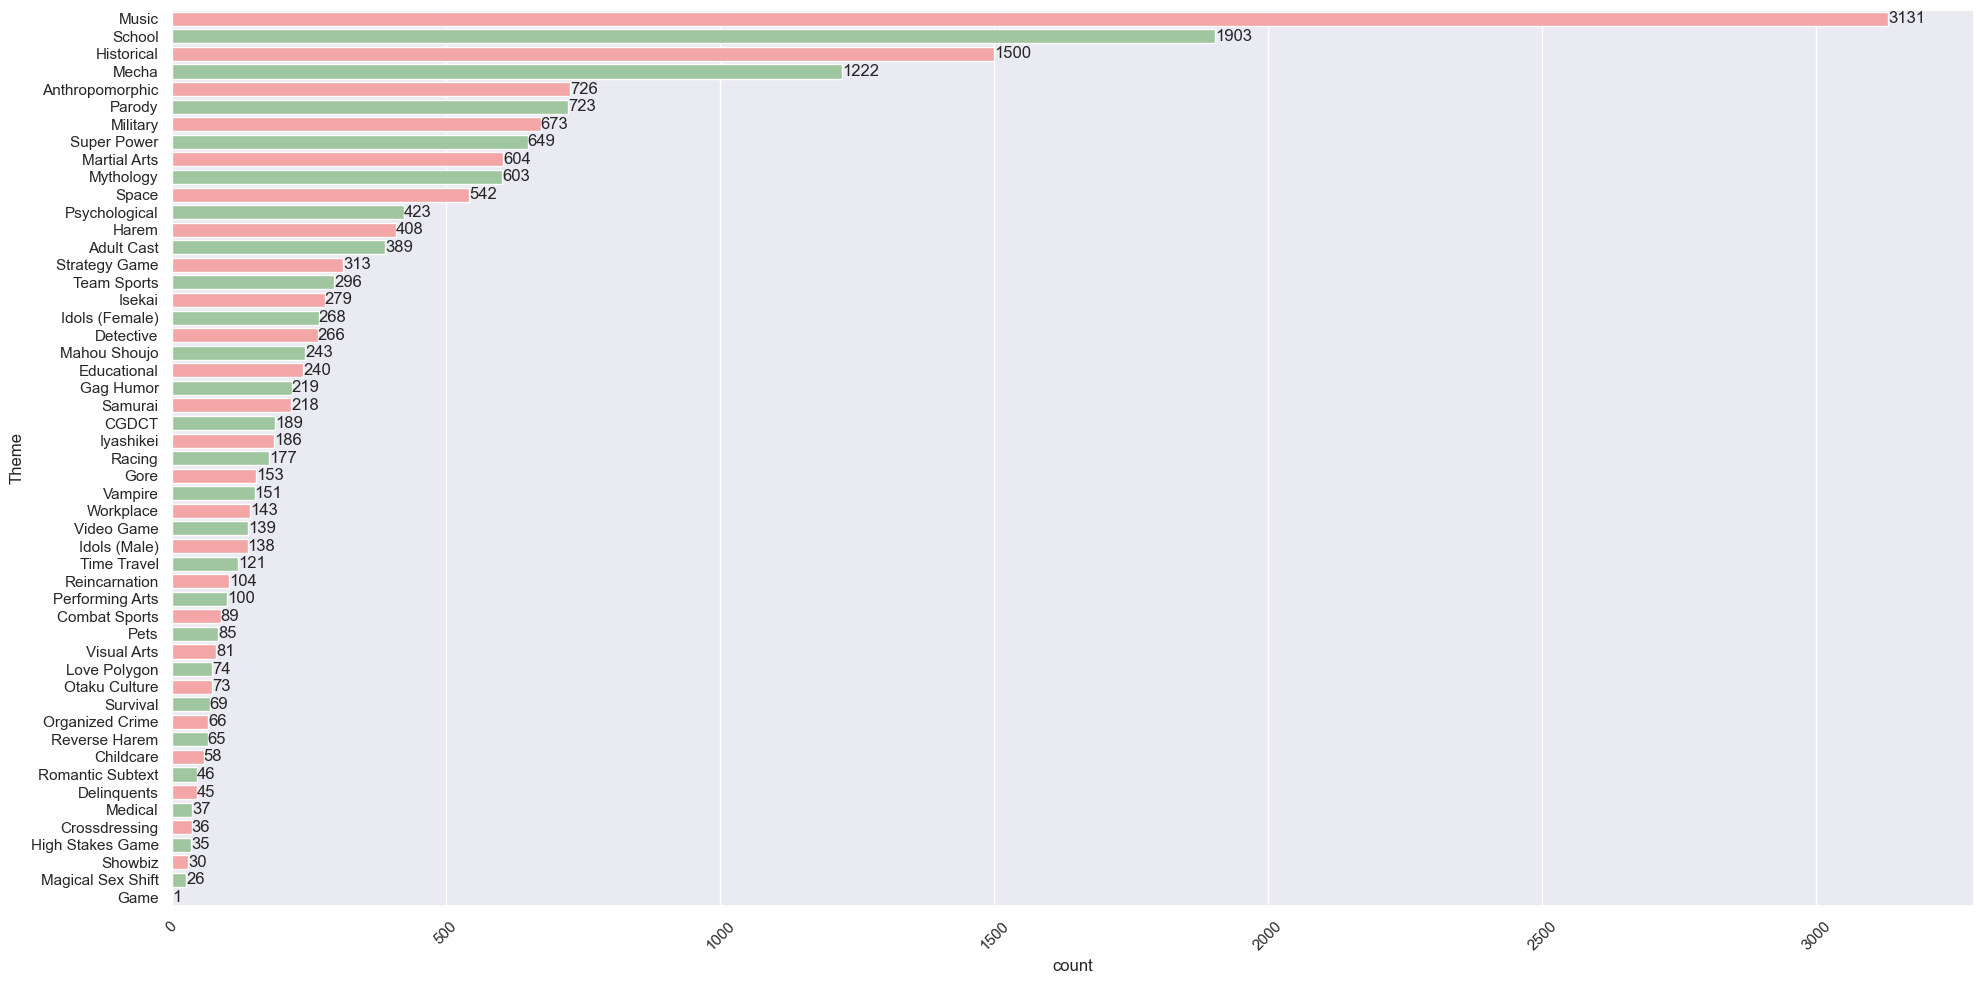

In [74]:
df_copy2 = df_copy.copy()
no_unknown = df_copy2[df_copy2["Theme"] != "Unknown"]
utils.countplot(no_unknown["Theme"],"Theme")

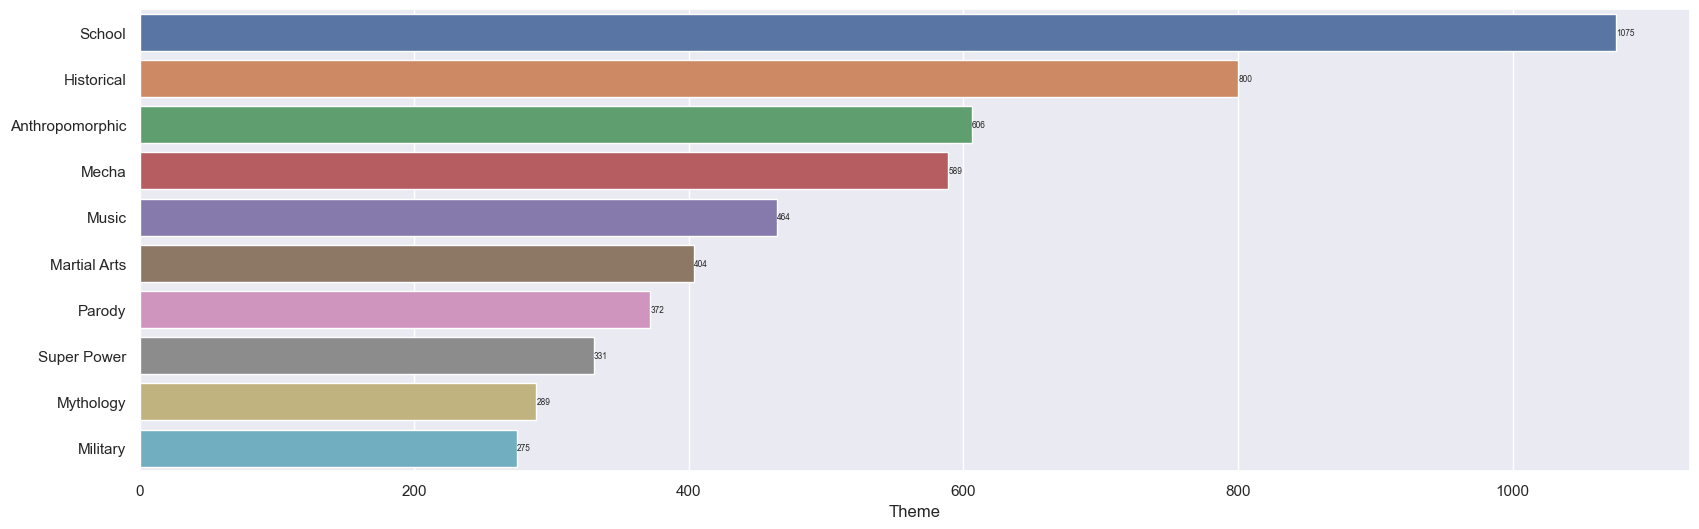

In [75]:
# Theme: Top 10. sns.barplot
no_unknown_onatv = df_copy["Theme"][(df_copy2["Theme"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Theme"] != "Unknown") & (df_copy["Type"] == "TV")]
utils.complex_barplot_top10(no_unknown_onatv,"Barplot_Top10_tv_ona_Theme_no_unknowns")

In [76]:
count =  (splitted_data == "Historical").sum()
count

0

In [77]:
df_copy["Theme"][(df_copy2["Theme"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Theme"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().head(10)


School             1075
Historical          800
Anthropomorphic     606
Mecha               589
Music               464
Martial Arts        404
Parody              372
Super Power         331
Mythology           289
Military            275
Name: Theme, dtype: int64

In [78]:
print("There are",df_copy["Theme"][(df_copy2["Theme"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Theme"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().count(), "different themes")

There are 51 different themes


In [79]:
print("We know",df_copy["Theme"][(df_copy2["Theme"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Theme"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().count(), "anime themes from TV and ONA type")

We know 8681 anime themes from TV and ONA type


In [80]:
splitted_data = df_copy["Theme"][(df_copy2["Theme"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Theme"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().index
splitted_data

Index(['School', 'Historical', 'Anthropomorphic', 'Mecha', 'Music',
       'Martial Arts', 'Parody', 'Super Power', 'Mythology', 'Military',
       'Harem', 'Strategy Game', 'Isekai', 'Space', 'Psychological',
       'Adult Cast', 'Team Sports', 'Gag Humor', 'Mahou Shoujo', 'Iyashikei',
       'Workplace', 'Idols (Female)', 'CGDCT', 'Racing', 'Samurai',
       'Video Game', 'Detective', 'Reincarnation', 'Gore', 'Vampire',
       'Educational', 'Time Travel', 'Love Polygon', 'Performing Arts',
       'Otaku Culture', 'Idols (Male)', 'Survival', 'Pets', 'Combat Sports',
       'Reverse Harem', 'Visual Arts', 'Childcare', 'Romantic Subtext',
       'Organized Crime', 'High Stakes Game', 'Crossdressing', 'Medical',
       'Showbiz', 'Magical Sex Shift', 'Delinquents', 'Game'],
      dtype='object')

There are 51 different themes

We know the theme from 8681 animes from TV and ONA type

Top 10 represent 5205, 59,96 % of the total

#### Producers

Top 10 producers with unknowns and Top 10 producers without unknowns

NHK, Nippon Hoso Kyokai (Japan Broadcasting Corporation), is the producer with the most anime in the world. However, it is a public entity. So Aniplex would be the first private company that most anime produces.

Really easy to understand why Aniplex is leading the chart. It has tittles like Fullmetal Alchemist: Brotherhood,Sword Art Online, Naruto, Naruto: Shippuuden, Kimetsu no Yaiba, Ao no Exorcist, Nanatsu no Taizai, Bleach, Soul Eater, etc With tittles like this under them, pretty normal that they lead.

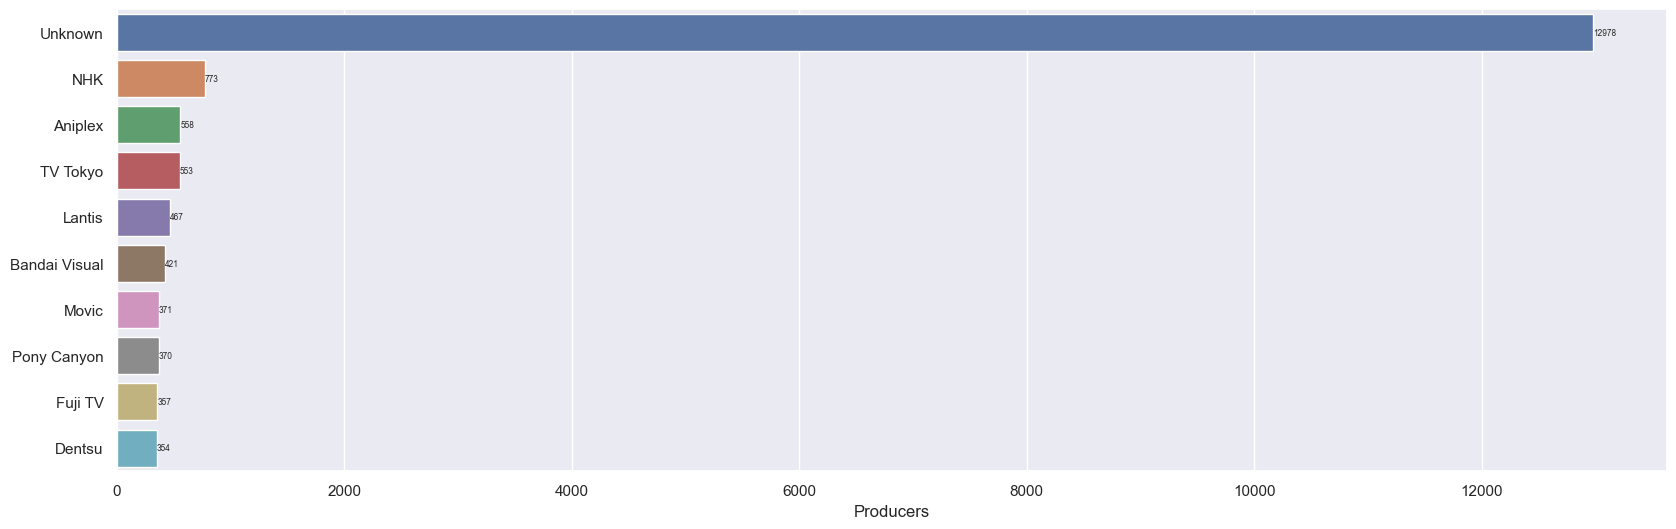

In [81]:
utils.complex_barplot_top10(df_copy["Producers"],"Barplot_Top10_all_producers")

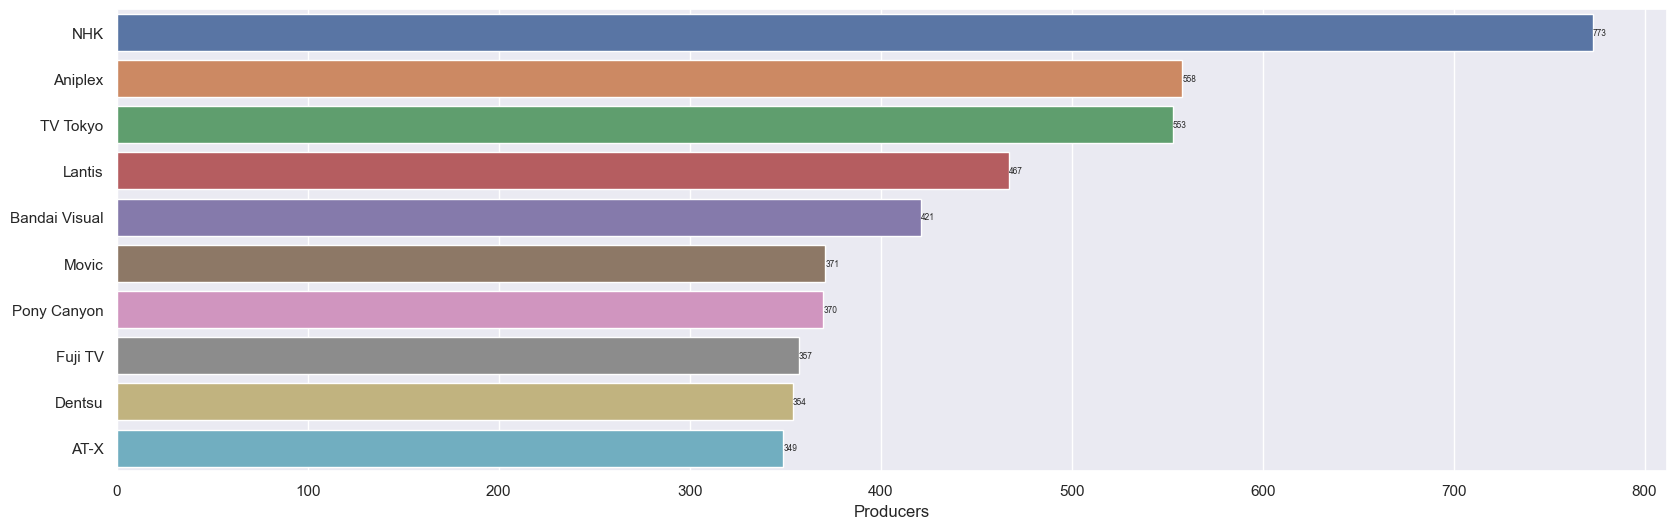

In [82]:
df_copy2 = df_copy.copy()
no_unknown = df_copy2[df_copy2["Producers"] != "Unknown"]
utils.complex_barplot_top10(no_unknown["Producers"],"Barplot_Top10_tv_no_unknowns_producers")

Let's check the same but only about TV and ONA

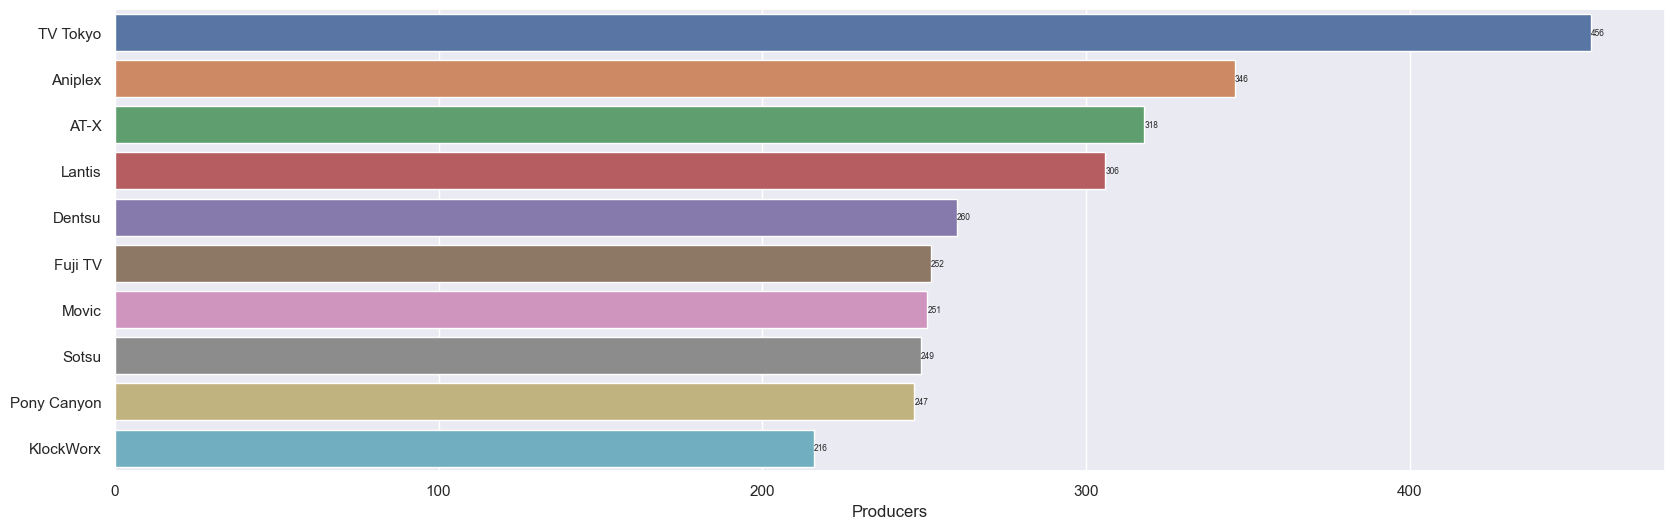

In [83]:
utils.complex_barplot_top10(df_copy["Producers"][(df_copy["Producers"] != "Unknown") & (df_copy["Type"] == "ONA") |(df_copy["Producers"] != "Unknown") & (df_copy["Type"] == "TV")],"Barplot_Top10_tv_ona_no_unknowns_producers")

In [84]:
df_copy["Producers"][(df_copy2["Producers"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Producers"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().head(20)

TV Tokyo                        456
Aniplex                         346
AT-X                            318
Lantis                          306
Dentsu                          260
Fuji TV                         252
Movic                           251
Sotsu                           249
Pony Canyon                     247
KlockWorx                       216
Kodansha                        210
NHK                             207
Kadokawa                        206
Mainichi Broadcasting System    198
TBS                             192
Shueisha                        185
Bandai Visual                   179
Tencent Penguin Pictures        174
DAX Production                  162
bilibili                        155
Name: Producers, dtype: int64

In [85]:
print("There are",df_copy["Producers"][(df_copy2["Producers"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Producers"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().count(), "different Producers")

There are 1128 different Producers


In [86]:
print("We know",df_copy["Producers"][(df_copy2["Producers"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Producers"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().count(), "anime producers from TV and ONA type")

We know 14449 anime producers from TV and ONA type


In [87]:
splitted_data = df_copy["Producers"][(df_copy2["Producers"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Producers"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().index
splitted_data

Index(['TV Tokyo', 'Aniplex', 'AT-X', 'Lantis', 'Dentsu', 'Fuji TV', 'Movic',
       'Sotsu', 'Pony Canyon', 'KlockWorx',
       ...
       'ONEMUSIC', 'Grouper Productions', 'AG-ONE', 'Yamamura Animation',
       ' Inc.', 'Picture Magic', 'AKABEiSOFT2', 'Studio Pastoral',
       'Creek & River', 'Science SARU'],
      dtype='object', length=1128)

From TV and ONA: TV Tokyo, Aniplex, AT-X are the top 3

This top 10 (2901) represents the 20,08 %

#### Studios

Top 10 Studios with unknowns and Top 10 Studios without unknowns

Toei Animation is the first private company with the most anime in the world. Not really surprising due to it is a studio nearly as old as anime itself, Toei Animation started as Japan Animated Films in 1948. Becoming a formidable powerhouse in the 1960s, the studio was responsible for classic, influential series such as Dragon Ball, Fist of the North Star, Slam Dunk, Mazinger Z, Galaxy Express 999, One Piece, and Sailor Moon.

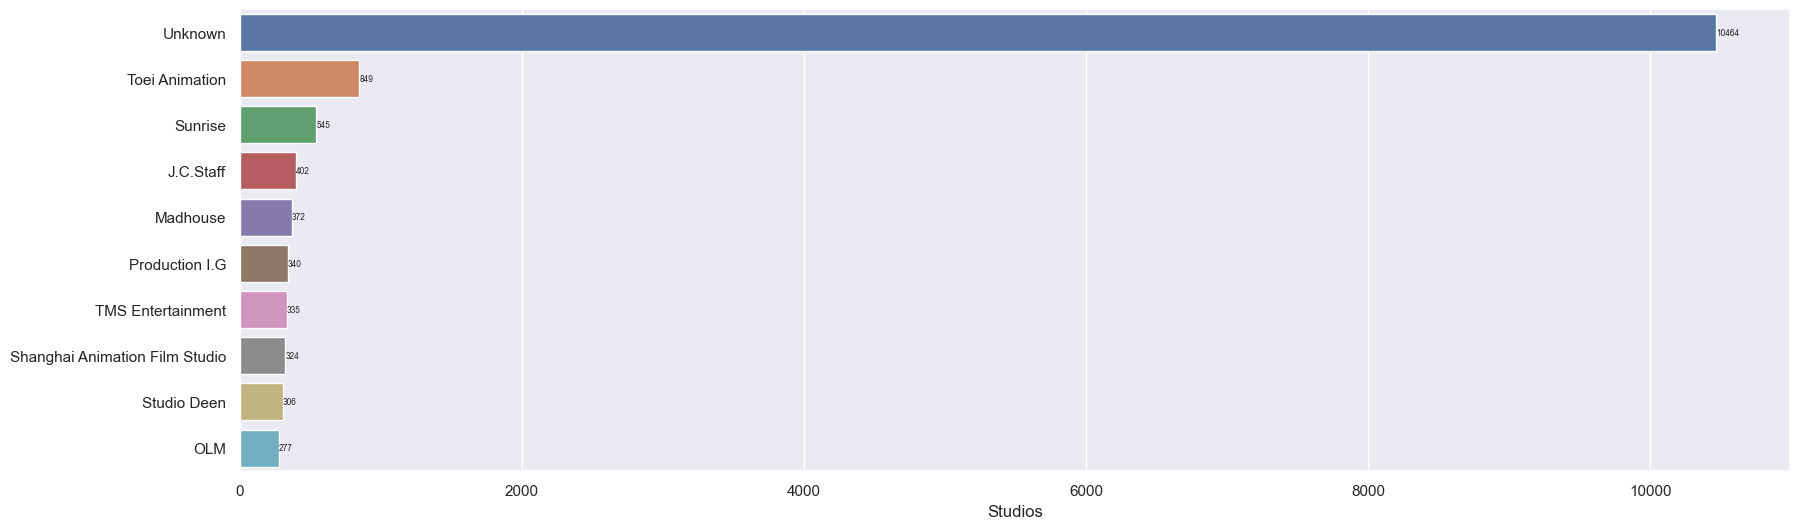

In [88]:
# Studios: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Studios"],"Barplot_Top10_all_studios")

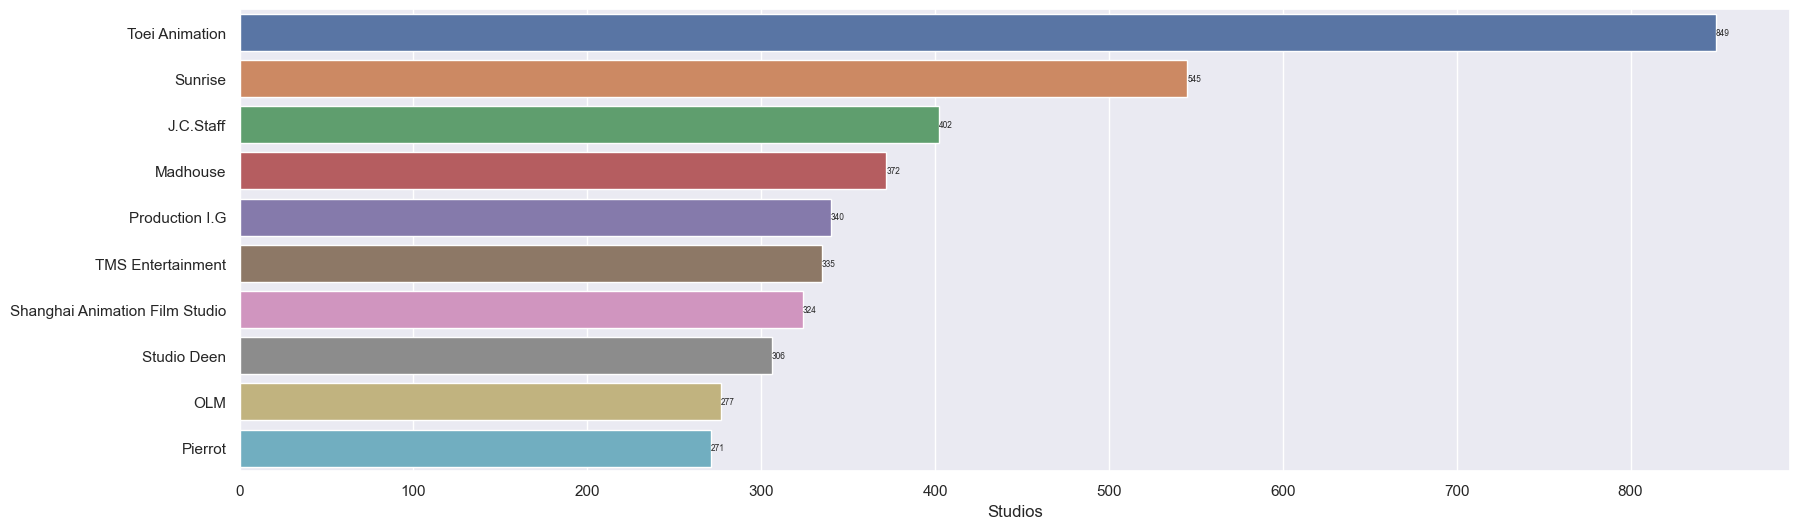

In [89]:
no_unknown = df_copy2[df_copy2["Studios"] != "Unknown"]
utils.complex_barplot_top10(no_unknown["Studios"],"Barplot_Top10_all_no_unknowns_studios")

Let's check the same but only about TV and ONA

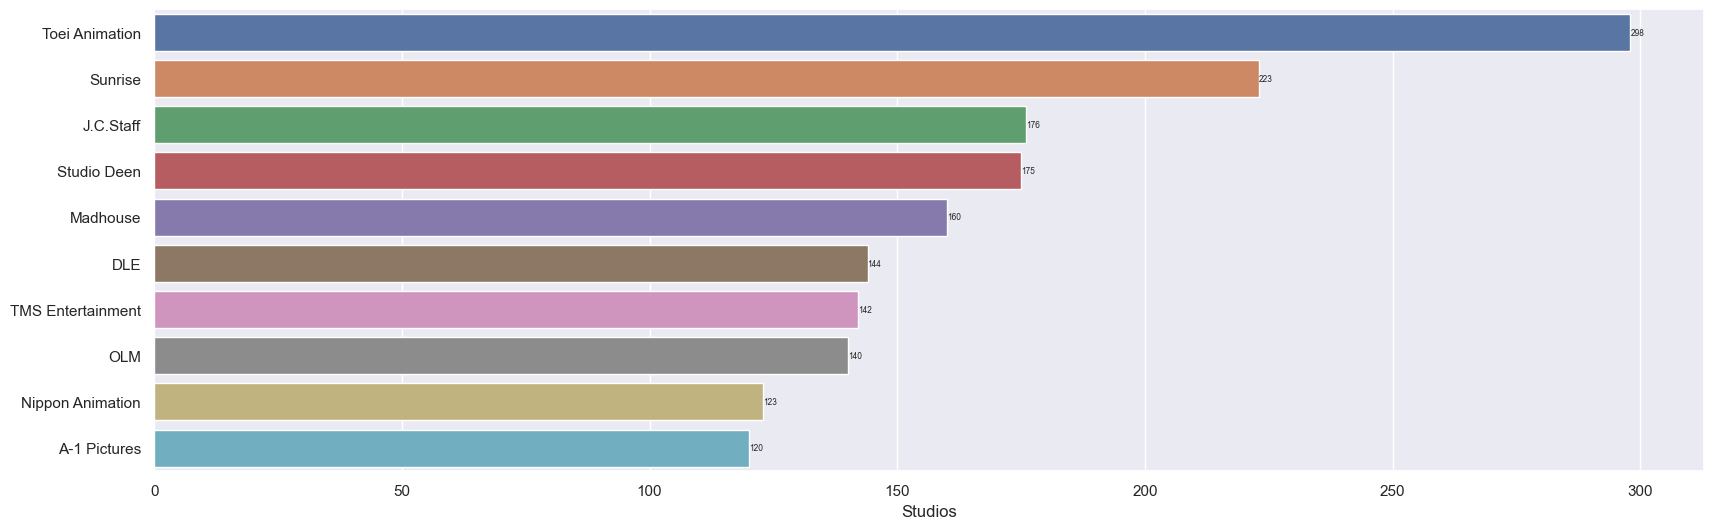

In [90]:
utils.complex_barplot_top10(df_copy["Studios"][(df_copy["Studios"] != "Unknown") & (df_copy["Type"] == "ONA") |(df_copy["Studios"] != "Unknown") & (df_copy["Type"] == "TV")],"Barplot_Top10_tv_ona_no_unknowns_Studios")

In [91]:
df_copy["Studios"][(df_copy2["Studios"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Studios"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().head(20)

Toei Animation          298
Sunrise                 223
J.C.Staff               176
Studio Deen             175
Madhouse                160
DLE                     144
TMS Entertainment       142
OLM                     140
Nippon Animation        123
A-1 Pictures            120
Pierrot                 118
Tatsunoko Production    113
Production I.G          103
Gonzo                    83
Bones                    80
Xebec                    78
Shin-Ei Animation        73
SILVER LINK.             71
LIDENFILMS               67
Shaft                    67
Name: Studios, dtype: int64

In [92]:
print("There are",df_copy["Studios"][(df_copy2["Studios"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Studios"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().count(), "different Studios")

There are 680 different Studios


In [93]:
print("We know",df_copy["Studios"][(df_copy2["Studios"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Studios"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().count(), "anime Studios from TV and ONA type")

We know 6839 anime Studios from TV and ONA type


In [94]:
splitted_data = df_copy["Studios"][(df_copy2["Studios"] != "Unknown") & (df_copy["Type"] == "ONA") | (df_copy["Studios"] != "Unknown") & (df_copy["Type"] == "TV")].str.split(',').explode().value_counts().index
splitted_data

Index(['Toei Animation', 'Sunrise', 'J.C.Staff', 'Studio Deen', 'Madhouse',
       'DLE', 'TMS Entertainment', 'OLM', 'Nippon Animation', 'A-1 Pictures',
       ...
       'MMT Technology', 'AIC Project', 'Anima&Co.', 'Rabbit Machine',
       'Panmedia', 'Pony Canyon', 'Studio Binzo', 'TOHO animation',
       'Qubic Pictures', 'E&H Production'],
      dtype='object', length=680)

From TV and ONA: Toei Animation, Sunrise, J.C.Staff are the top 3 (no change)
We know 6839 anime Studios from TV and ONA type

This top 10 (2901) represents the 24,87 %

## Bi-Dimensional-Analysis

### Score and Type

We can check graphically the Score of each Type to see the median.

This boxplot shows that the Types with better median are TV, Movie and Specials.

It requires mores analytical study

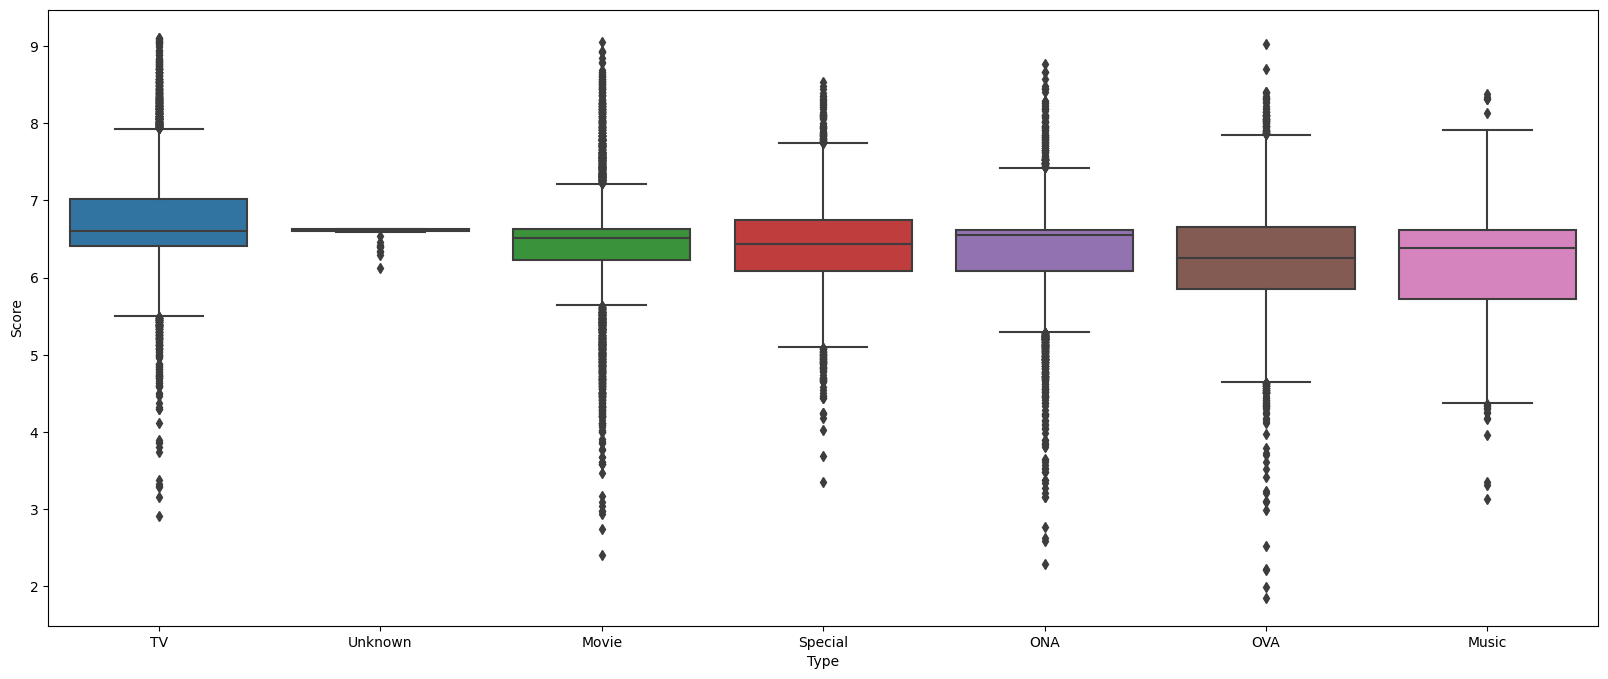

In [64]:
mean = df_copy.groupby(['Type'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy,mean,'Type','Score')

We calculate the mean,median, min and max of Types for each Types.

It shows that the Types with better mean are TV, ONA and Movie

In [ ]:
 # finding the mean, median, min and max of Scored_by
type_Scored_by = utils.various(df_copy,'Type','Scored_by')
type_Scored_by

Scored_by                      
                 mean   median min      max
Type                                       
TV       99997.016913  15327.0   7  4125905
ONA      67098.823280   2105.0   0  4128912
Movie    52538.337251   3819.0   0  2113452
OVA      26750.072385   2394.0   1  1650790
Unknown  19307.855263   3274.5  34   279164
Special  19191.662194   2488.0   0  1400265
Music    15936.709147    610.0   8   783563

We calculate the mean,median, min and max of Score for each Types.

It shows that the Types with better mean are TV, Movie and Specials.

In [65]:
 # finding the mean, median, min and max of Score
type_score = utils.various(df_copy,'Type','Score')
type_score

Score                         
             mean    median   min      max
Type                                      
TV       6.715764  6.598315  2.91  9.11000
Unknown  6.584459  6.618241  6.12  6.62804
Movie    6.429894  6.520000  2.40  9.05000
Special  6.420673  6.434526  3.35  8.54000
ONA      6.328962  6.550301  2.29  8.77000
OVA      6.265786  6.260000  1.85  9.03000
Music    6.182972  6.387958  3.13  8.38000

We also check the coefficient of variation of Score and Scored_by. 

I tis possible to see those were the scores is more regular TV, Special and Music.

Those that their score are more iregular like Movie, OVA and ONA.

In [67]:
#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Rating columns with their score
df_copy_aux['Type'] =df_copy['Type']
df_copy_aux['Score'] =df_copy['Score']
df_copy_aux['Scored_by'] =df_copy['Scored_by']

# Group a dataframe and calculate coefficient of variation
df_copy_aux.groupby('Type').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Type,,
Movie,0.126655,2.867566
OVA,0.117100,4.085621
ONA,0.104425,5.462501
Music,0.104079,3.732160
Special,0.102092,3.977636
TV,0.094912,2.994734
Unknown,0.014019,2.495653


Let's remember the results of the unidimensional analysis of Types:

In [56]:
ntype

TV         7509
Movie      4169
OVA        4034
ONA        3531
Special    2534
Music      2252
Unknown      76
Name: Type, dtype: int64

Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Types to go for are: TV, ONA and Movie.

- 2. If the goal is about the score there are two options:
        - Having the best score but not regular, the best three Types to go for are: TV, Movie and Specials.
        - Not Having the best score but the most regular one, the best three Types to go for are: TV, Special and Music.
        

Howerver, taking also into account the results of the unidimensional analysis of Types:
- Specias and Music types has less animes then the rest.
- TV, Movie and OVA has mores animes then the rest
- ONA is increasing rapidly thanks to the online distribution companies like Netflix.
Go fot TV, Movie and ONA would be the best idea

### Score and Source

We can check grafically the Score of each Source to see the median. 

This boxplot shows that the Sources with better median are Light novel, Manga and Novel.

It requieres mores analytical study

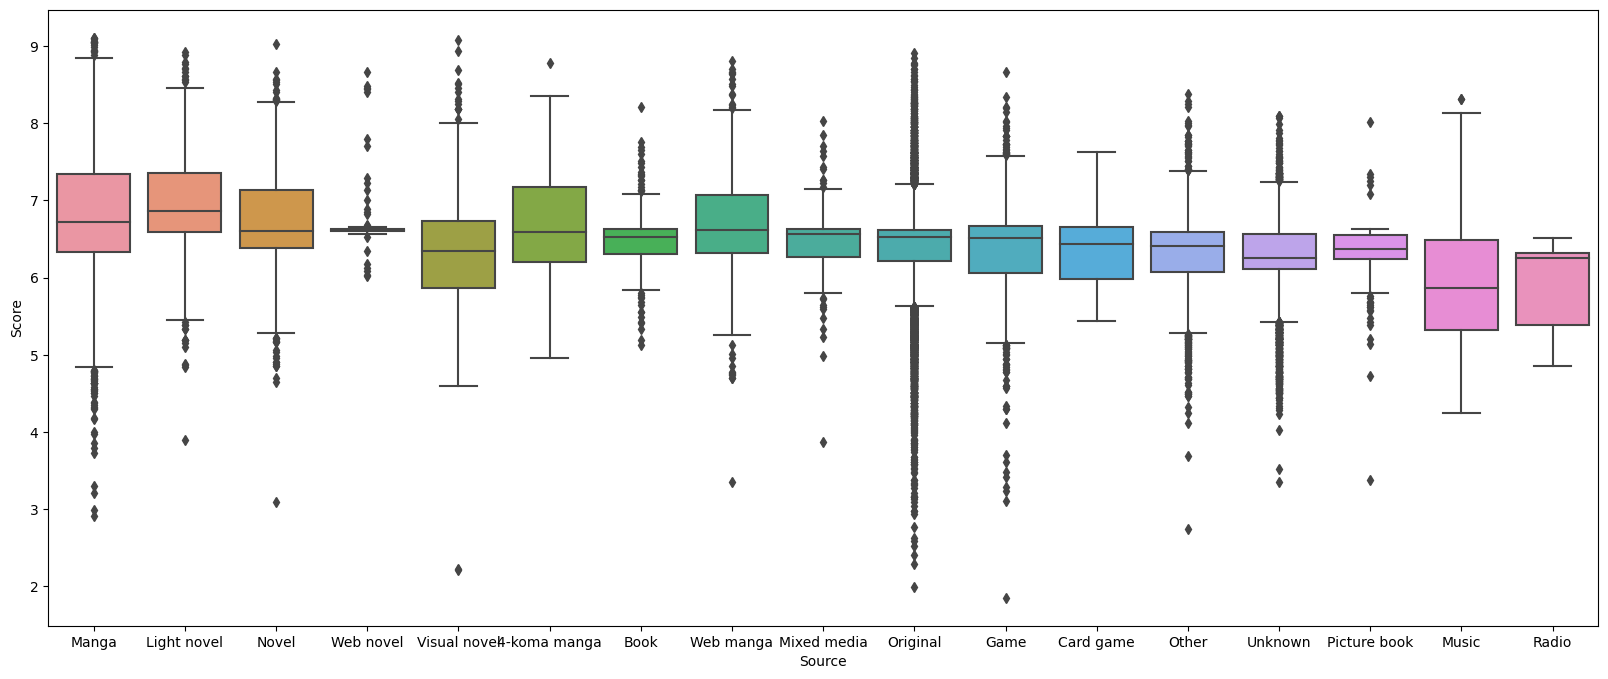

In [68]:
df_source = df_copy[(df_copy["Type"] == "ONA") |(df_copy["Type"] == "TV")]
mean = df_source.groupby(['Source'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy,mean,'Source','Score')

Now we calculate the mean,median, min and max of Scored_by for each Source.

It shows that the Source with better mean are Light novel, Original and Manga.

In [69]:
 # finding the mean, median, min and max of Scored_by
source_Scored_by = utils.various(df_source,'Source','Scored_by')
source_Scored_by

Scored_by                       
                       mean   median  min      max
Source                                            
Light novel   146210.152294  65540.0    7  2011482
Original      119810.304043  11575.0    3  4128912
Manga          91086.734088  14125.0    0  3371923
Visual novel   73485.048913  25497.5  496  1286088
Unknown        64832.646254   4035.5   16  4125905
Other          63392.270661   4615.5    7  4027113
Book           52629.859155   5131.0  121   705389
Web manga      52412.276316   7132.0   26  2047625
4-koma manga   43968.164894  10587.5  124   537536
Picture book   40291.690000   7945.0   63   657301

We also check the coefficient of variation of Score and Scored_by. 

I tis possible to see those where the scores is more regular Web novel, Picture book and Book.

Those that their score is more iregular like Music, Visual novel and manga.

In [ ]:
df_source = df_copy[(df_copy["Source"] != "Unknown") & (df_copy["Type"] == "ONA") |(df_copy["Source"] != "Unknown") & (df_copy["Type"] == "TV")]

In [61]:
#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Rating columns with their score
df_copy_aux['Source'] =df_copy['Source'][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")]
df_copy_aux['Score'] =df_copy['Score'][ (df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")]
df_copy_aux['Scored_by'] =df_copy['Scored_by'][ (df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")]

# Group a dataframe and calculate coefficient of variation
df_copy_aux.groupby('Source').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Source,,
Music,0.118245,2.601476
Visual novel,0.111071,2.008400
Manga,0.109810,2.520211
Web manga,0.107046,3.229489
4-koma manga,0.105223,1.909162
Light novel,0.096906,1.535603
Other,0.096399,4.621674
Original,0.093591,3.653130
Game,0.093299,5.299941


Let's remember the results of the unidimensional analysis of Sources:

In [116]:
df_copy['Source'][(df_copy['Source'] != "Unknown") & (df_copy['Type'] == "TV") | (df_copy['Source'] != "Unknown") & (df_copy['Type'] == "ONA")].value_counts().head(10)

Original        4279
Manga           2121
Game             649
Light novel      545
Other            484
Novel            439
Web manga        304
4-koma manga     188
Visual novel     184
Web novel        116
Name: Source, dtype: int64

Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Sources to go for are: Light novel, Original and Manga.

- 2. If the goal is about the score there are two options:
        - Having the best score but not regular, the best three Sources to go for are: Music, Visual novel and manga.
        - Not Having the best score but the most regular one, the best three Sources to go for are: Music, Visual novel and manga.

However, taking also into account the results of the unidimensional analysis of Sources:
- Picture book, Book, Radio and Web novel has almost no animes. It would be risky to go for these ones.
- The best idea would be to go for Light novel, Manga and Original Sources

### Score and Number of Episodes


Let's do a scatterplot to see the relationship between different variables (Score and Duration of the episodes).

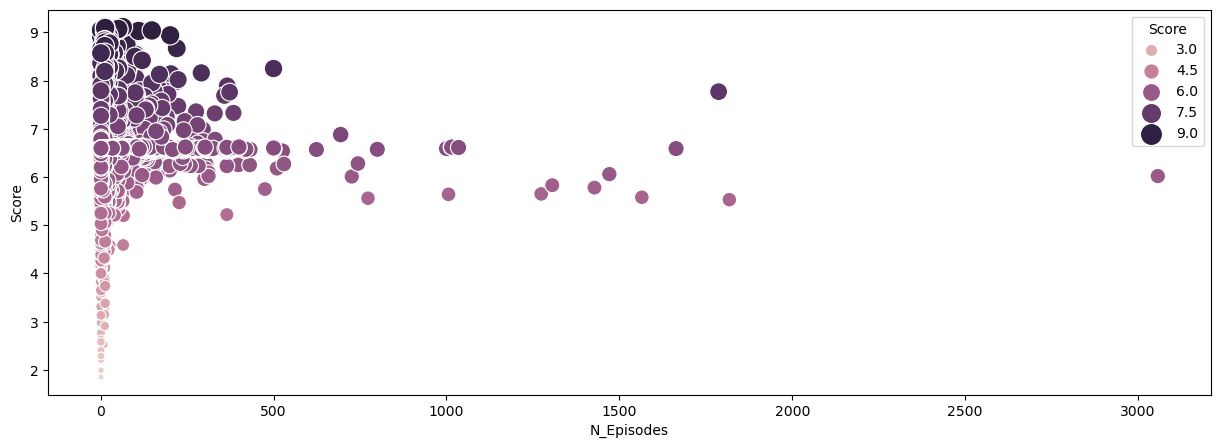

In [18]:
utils.scat(df_copy,"N_Episodes","Score","N_Episodes_VS_Score")

In [19]:
# Get count of values greater than 2022 in the column 'Released' 
count = df_copy["N_Episodes"][df_copy["N_Episodes"] > 200].count()
print("There are",count,"animes with more than 200 episodes")

There are 145 animes with more than 200 episodes


We observe some outliers that do not let us see properly the scatterplot.

There are 144 animes with more than 200 episodes in total

Since we have 24 thousand records, we will avoid those 145 animes in the plot. So, we will be able to see it clearly.

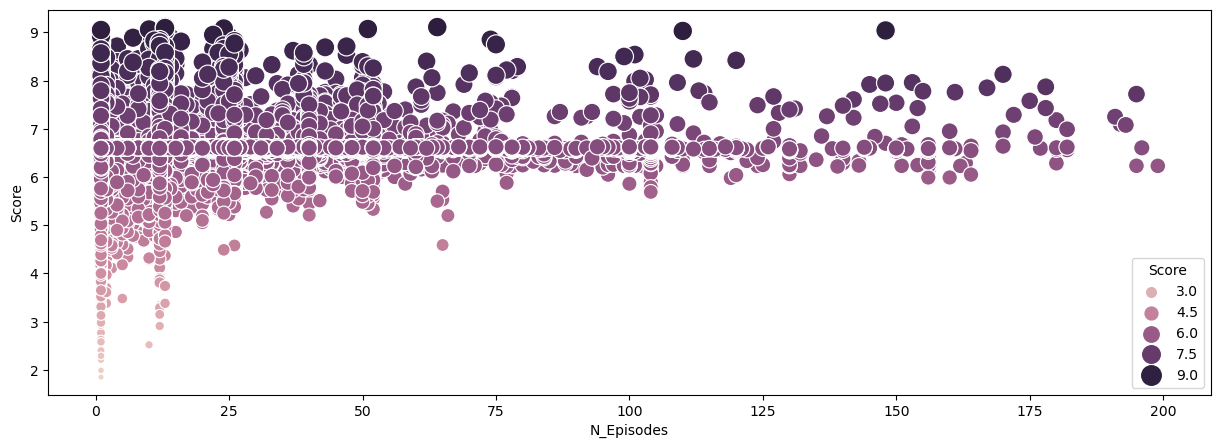

In [20]:
until2000 = df_copy[df_copy["N_Episodes"] < 200] #there are a couple of outliers, it is better to do not take them into account
utils.scat(until2000,"N_Episodes","Score","N_Episodes_VS_Score_Less200")

The relationship between this two variables is still not clear, therefore, we are going to proceed with some test.

First, we are going to check for if the data is normally distributed. After that we will do a Correlation Tests and finally we will perform a Parametric or a Nonparametric Statistical Hypothesis Tests (depending on the results from previous test)

**Normality Tests**

Let'a check if the data normally distributed with a Shapiro-Wilk test, Anderson-Darling test and a normal test.

Interpretation

- H0: The data is normally distributed.
- H1: The data is not normally distributed.

In [21]:
# Shapiro-Wilk normality test
utils.shapiro_test(df_copy['Score'])

Statistics=0.954, p=0.000
P-Values is smaller than 0.05
We reject the null hypothesis and We fail to reject the alternative hypothesis. The data is not normally distributed


c:\Users\Christiandda\miniconda3\envs\ramup_py39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
# D'Agostino (kurtosis and skewness) normality test
utils.normality_test(df_copy['Score'])

Statistics=1446.110, p=0.000
P-Values is smaller than 0.05
We reject the null hypothesis and We fail to reject the alternative hypothesis. The data is not normally distributed


In [23]:
# Anderson-Darling normality test
utils.anderson_test(df_copy['Score'])

Statistic: 481.317
15.000: 0.576, data does not looks normally distributed. We reject the null hypothesis and We fail to reject the alternative hypothesis. 
10.000: 0.656, data does not looks normally distributed. We reject the null hypothesis and We fail to reject the alternative hypothesis. 
5.000: 0.787, data does not looks normally distributed. We reject the null hypothesis and We fail to reject the alternative hypothesis. 
2.500: 0.918, data does not looks normally distributed. We reject the null hypothesis and We fail to reject the alternative hypothesis. 
1.000: 1.092, data does not looks normally distributed. We reject the null hypothesis and We fail to reject the alternative hypothesis. 


After perfoming the three different normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

The data is not normally distributed.

**Correlation Test**

Since we know that one of the two variables is not normally distributed, we will proceed with Spearman’s Rank Correlation test. It test whether two samples have a monotonic relationship.

Assumptions:

- Observations in each sample are independent and identically distributed.
- Observations in each sample can be ranked (those for which the individual observations can be put in order from smallest to largest, even though the exact values are unknown).

Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [24]:
# Spearman's dependency test
utils.spearman(df_copy['Score'], df_copy['Duration'])

Spearmans correlation coefficient: 0.207
P-value equals 0.000. There is a dependency between the samples. We reject the null hypothesis and We fail to reject the alternative hypothesis


After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

A Spearman test is considered as very weak (0.20 to 0.39)

Results of the test showed there is a positive, weak correlation/dependency between the two variables

However, in that analysis we are taking into account any type of anime, but we want to focus in TV Series and ONA

In [25]:
filtered = df_copy[(df_copy["N_Episodes"] < 200 ) & (df_copy["Type"] == "ONA") | (df_copy["N_Episodes"] < 200 ) & (df_copy["Type"] == "TV")]

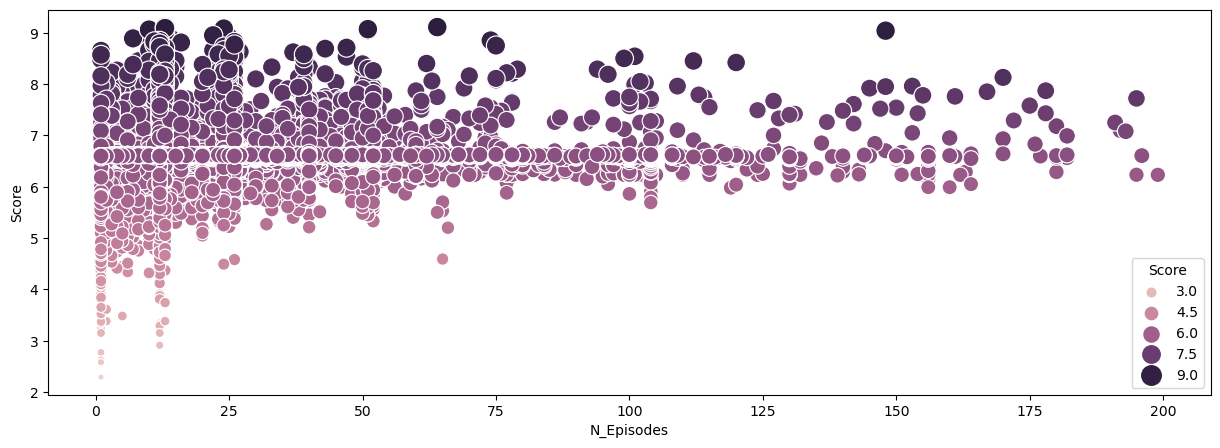

In [26]:
utils.scat(filtered,"N_Episodes","Score","N_Episodes_VS_Score_Less200_Only_ONA_and_TV")

In [95]:
# Shapiro-Wilk  normality test
utils.shapiro_test(filtered["Score"])

Statistics=0.922, p=0.000
P-Values is smaller than 0.05
We reject the null hypothesis and We fail to reject the alternative hypothesis. The data is not normally distributed


After perfoming the Shapiro-Wilk normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

The data is not normally distributed.

**Correlation Test**

Since we know that one of the two variables is not normally distributed, we will proceed with Spearman’s Rank Correlation test. It test whether two samples have a monotonic relationship.

Assumptions:

- Observations in each sample are independent and identically distributed.
- Observations in each sample can be ranked (those for which the individual observations can be put in order from smallest to largest, even though the exact values are unknown).

Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [28]:
# Spearman's dependency test
utils.spearman(df_copy['Score'], df_copy['Duration'])

Spearmans correlation coefficient: 0.207
P-value equals 0.000. There is a dependency between the samples. We reject the null hypothesis and We fail to reject the alternative hypothesis


After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

A Spearman test is considered as very weak (0.00 to 0.19)

Results of the test showed there is a positive, very weak correlation/dependency between the two variables

We have sufficient evidence to conclude that there is a correlation/dependency between the two variables for any type of anime

### Score and Duration of the episodes

Let's do a scatterplot to see the relationship between different variables (Score and Duration of the episodes).

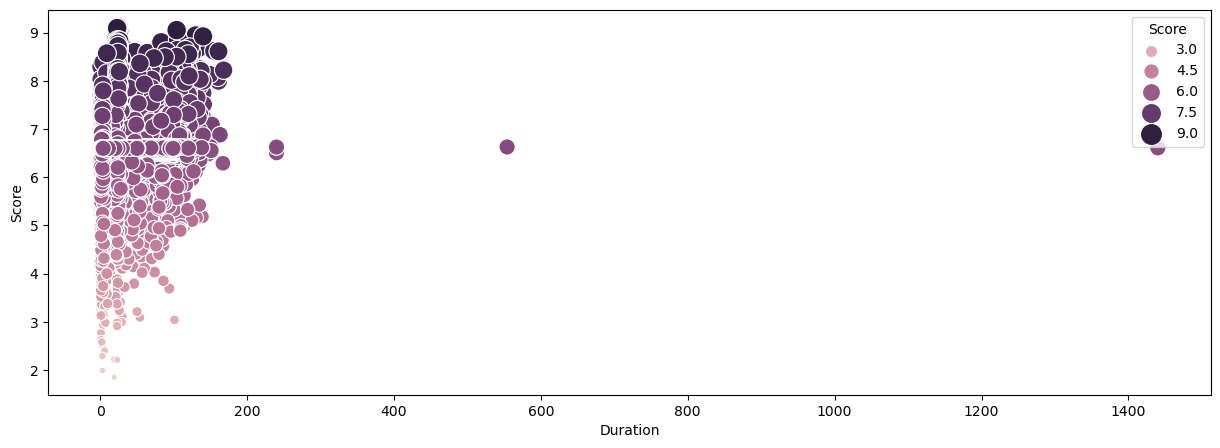

In [21]:
utils.scat(df_copy,"Duration","Score","Duration_VS_Score")

In [11]:
# Get count of values greater than 2022 in the column 'Released' 
count = df_copy["Duration"][df_copy["Duration"] > 200].count()
print("There are",count,"animes with a duration of more than 200 minutes")

There are 4 animes with a duration of more than 200 minutes


We observe 4 outliers that do not let us see properly the scatterplot.

Since there are only 4 outliers, we will discard them from the plotting.

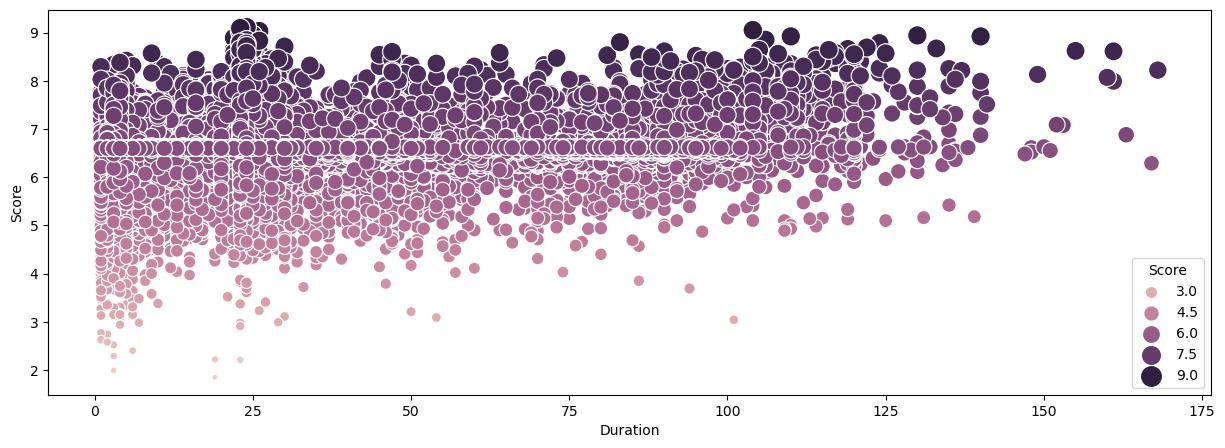

In [22]:
until400 = df_copy[df_copy["Duration"] < 200] #there are a couple of outliers, it is better to do not taking them into account
utils.scat(until400,"Duration","Score","Duration_VS_Score_less 200")

The relationship between this two variables is still not clear, therefore, we are going to proceed with some test.

First, we are going to check for if the data is normally distributed. After that we will do a Correlation Tests and finally we will perform a Parametric or a Nonparametric Statistical Hypothesis Tests (depending on the results from previous test)

**Normality Tests**

Let'a check if the data normally distributed with a Shapiro-Wilk test, Anderson-Darling test and a normal test.

Interpretation

- H0: The data is normally distributed.
- H1: The data is not normally distributed.

In [96]:
# Shapiro-Wilk  normality test
utils.shapiro_test(df_copy['Score'])

Statistics=0.954, p=0.000
P-Values is smaller than 0.05
We reject the null hypothesis and We fail to reject the alternative hypothesis. The data is not normally distributed


In [ ]:
# D'Agostino (kurtosis and skewness) normality test
utils.normality_test(df_copy['Score'])

Statistics=1446.110, p=0.000
P-Values is smaller than 0.05
We reject the null hypothesis and We fail to reject the alternative hypothesis. The data is not normally distributed


In [ ]:
# Anderson-Darling normality test
utils.anderson_test(df_copy['Score'])

After perfoming the three different normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

The data is not normally distributed.

**Correlation Test**

Since we know that one of the two variables is not normally distributed, we will proceed with Spearman’s Rank Correlation test. It test whether two samples have a monotonic relationship.

Assumptions:

- Observations in each sample are independent and identically distributed.
- Observations in each sample can be ranked (those for which the individual observations can be put in order from smallest to largest, even though the exact values are unknown).

Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [ ]:
# Spearman's dependency test
utils.spearman(df_copy['Score'], df_copy['Duration'])

After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

A Spearman test is considered as very weak (0.20 to 0.39)

Results of the test showed there is a positive, weak correlation/dependency between the two variables

However, in that analysis we are taking into account any type of anime, but we want to focus in TV Series and ONA

In [11]:
filtered = df_copy[(df_copy["Duration"] < 30 ) & (df_copy["Type"] == "ONA") | (df_copy["Duration"] < 30 ) & (df_copy["Type"] == "TV")]

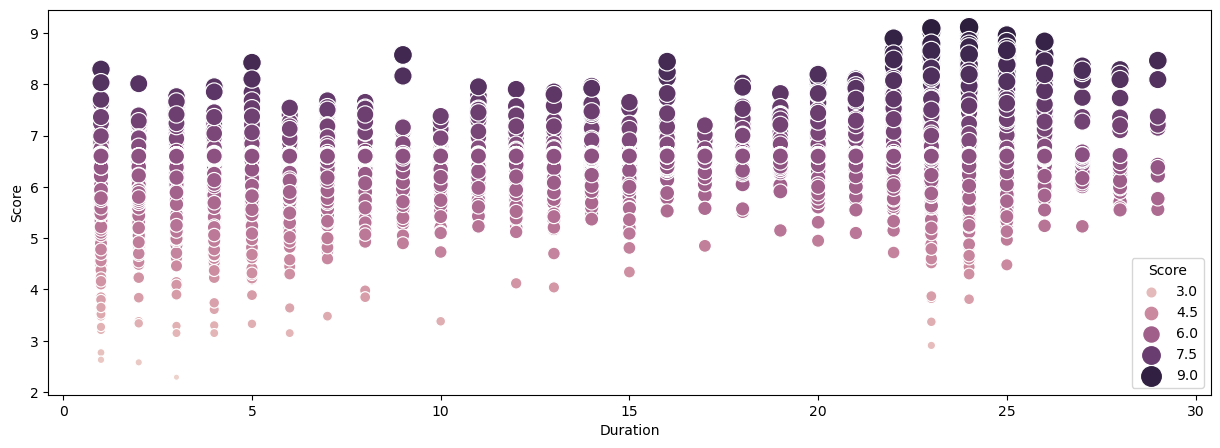

In [58]:
utils.scat(filtered,"Duration","Score","Duration_VS_Score_Less30_Only_ONA_and_TV")

In [44]:
# Shapiro-Wilk  normality test
utils.shapiro_test(filtered["Score"])

Statistics=0.922, p=0.000
P-Values is smaller than 0.05
We reject the null hypothesis and We fail to reject the alternative hypothesis. The data is not normally distributed


After perfoming the Shapiro-Wilk normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

The data is not normally distributed.

**Correlation Test**

Since we know that one of the two variables is not normally distributed, we will proceed with Spearman’s Rank Correlation test. It test whether two samples have a monotonic relationship.

Assumptions:

- Observations in each sample are independent and identically distributed.
- Observations in each sample can be ranked (those for which the individual observations can be put in order from smallest to largest, even though the exact values are unknown).

Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [13]:
# Spearman's dependency test
utils.spearman(df_copy['Score'], df_copy['Duration'])

Spearmans correlation coefficient: 0.383
P-value equals 0.000. There is a dependency between the samples. We reject the null hypothesis and We fail to reject the alternative hypothesis


After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

A Spearman test is considered as very weak (0.20 to 0.39)

Results of the test showed there is a positive, very weak correlation/dependency between the two variables

### Score and Rating

We can check grafically the Score of each Rating to see the meadian.

This boxplot shows that the meadian are pretty much the same. 

But slighly better in Romance, Sci-Fi and Drama. 

We will not take into account Hentai, because animated porno is not the goal of the company.

It requieres mores analytical study

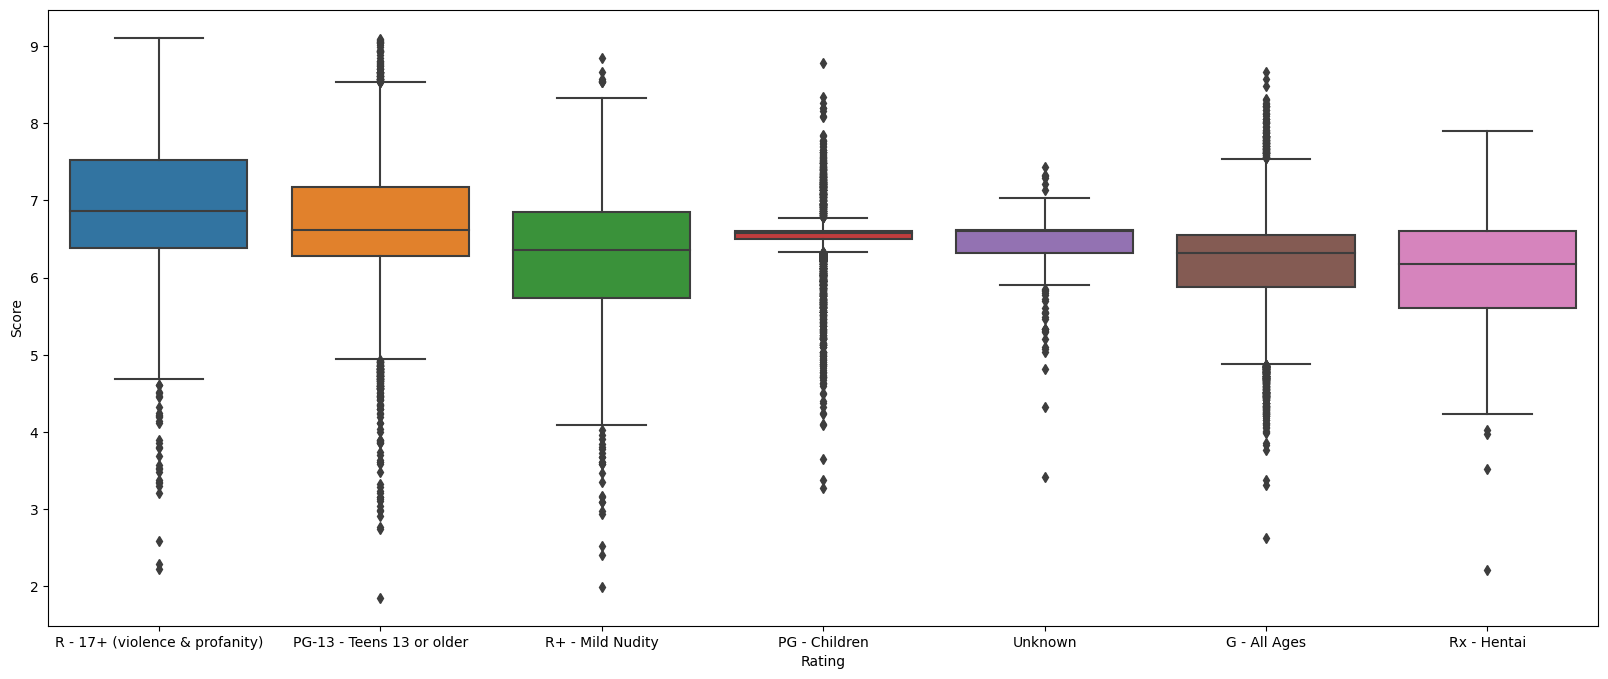

In [71]:
filtered_sco_rat = df_copy[(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV") ]
mean = filtered_sco_rat.groupby(['Rating'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy,mean,'Rating','Score')

Now we calculate the mean,median, min and max of Scored_by for each Rating. 

It shows that the Ratings with better mean are PG - Children, R - 17+ (violence & profanity) and PG-13 - Teens 13 or older.

In [ ]:
# finding the mean, median, min and max of Scored_by
top_10_Scored_by = utils.various(df_copy,'Rating','Scored_by')
top_10_Scored_by

Scored_by                       
                                         mean   median  min      max
Rating                                                              
PG - Children                   162767.532730  18676.5   17  4127786
R - 17+ (violence & profanity)  155940.416667  48527.5    3  2554804
R+ - Mild Nudity                 85117.526316  25542.0  126  1146952
PG-13 - Teens 13 or older        59802.149708   7683.0    0  3688044
G - All Ages                     48109.825501   1995.0    6  4128912
Rx - Hentai                       6978.327273   3172.0  359    65891

We calculate the mean,median, min and max of Score for each Rating.

It shows that the Rating with better mean are Production R - 17+ (violence & profanity), PG-13 - Teens 13 or older and PG - Children.

In [34]:
 # finding the mean, median, min and max of Score
top_10_Score = utils.various(df_copy,'Rating','Score')
top_10_Score

Score                      
                                    mean    median   min   max
Rating                                                        
R - 17+ (violence & profanity)  7.043194  7.140000  2.29  9.11
PG-13 - Teens 13 or older       6.748912  6.626757  2.77  9.09
R+ - Mild Nudity                6.559787  6.615000  3.15  8.85
PG - Children                   6.533370  6.587958  3.27  8.16
G - All Ages                    6.286732  6.364798  2.63  8.49
Rx - Hentai                     6.068105  6.060000  4.67  7.23

We also check the coefficient of variation of Score and Scored_by. 

I tis possible to see those where the scores are more regular PG - Children or G - All Ages 

Those that their score are more iregular like R+ - Mild Nudity and R - 17+ (violence & profanity).

In [37]:
#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Rating columns with their score
df_copy_aux['Rating'] =df_copy['Rating'][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")]
df_copy_aux['Score'] =df_copy['Score'][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")]
df_copy_aux['Scored_by'] =df_copy['Scored_by'][(df_copy["Type"] == "ONA") | (df_copy["Type"] == "TV")]

# Group a dataframe and calculate coefficient of variation
df_copy_aux.groupby('Rating').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Rating,,
R - 17+ (violence & profanity),0.137730,1.909184
R+ - Mild Nudity,0.121579,1.748941
PG-13 - Teens 13 or older,0.111630,2.855835
G - All Ages,0.093640,5.072982
Rx - Hentai,0.093119,1.518774
PG - Children,0.046958,3.202293
Unknown,0.040753,2.705322


Doing some research we found some titles for each category:

R - 17+ (violence & profanity)
- Goblin Slayer
- Berserk
- Elfen Lied
- Hellsing 

PG-13 - Teens 13 or older
- My Hero Academia
- Sword Art Online The Movie
- Fullmetal Alchemist the Movie
- One Piece Film
- Naruto

PG - Children
- Spirited Away
- Pom Poko
- Avatar
- Howl's Moving Castle

Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Ratings to go for are: PG - Children, R - 17+ (violence & profanity) and PG-13 - Teens 13 or older.

- 2. If the goal is about the score there are two options:
        - Having the best score but not regular, the best three Ratings to go for are: R - 17+ (violence & profanity), PG-13 - Teens 13 or older and PG - Children.
        - Not Having the best score but the most regular one, the best three Ratings to go for are: PG - Children or G - All Ages.
        

### Score and Genre

We are going to create an auxiliar dataframe with three columns Genre, Score and Scored_by.

Since the Genre column could have different Genre for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [77]:
# Create a copy of df_copy
df_anime = df_copy.copy()
df_anime = df_anime[(df_anime["Type"] == "ONA") | (df_anime["Type"] == "TV")]
#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Genre_Split'] = df_anime['Genre'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Genre columns with their score
df_copy_aux['Genre'] = pd.Series([x for _list in df_anime['Genre_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Genre', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Genre_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Genre'].isin(df_anime['Genre'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10.

We can check grafically the Score of each Genre to see the median. 

This boxplot shows that the median are pretty much the same. 

But slighly better in Romance, Sci-Fi and Drama. 

We will not take into account Hentai, because animated porno is not the goal of the company.

It requieres mores analytical study

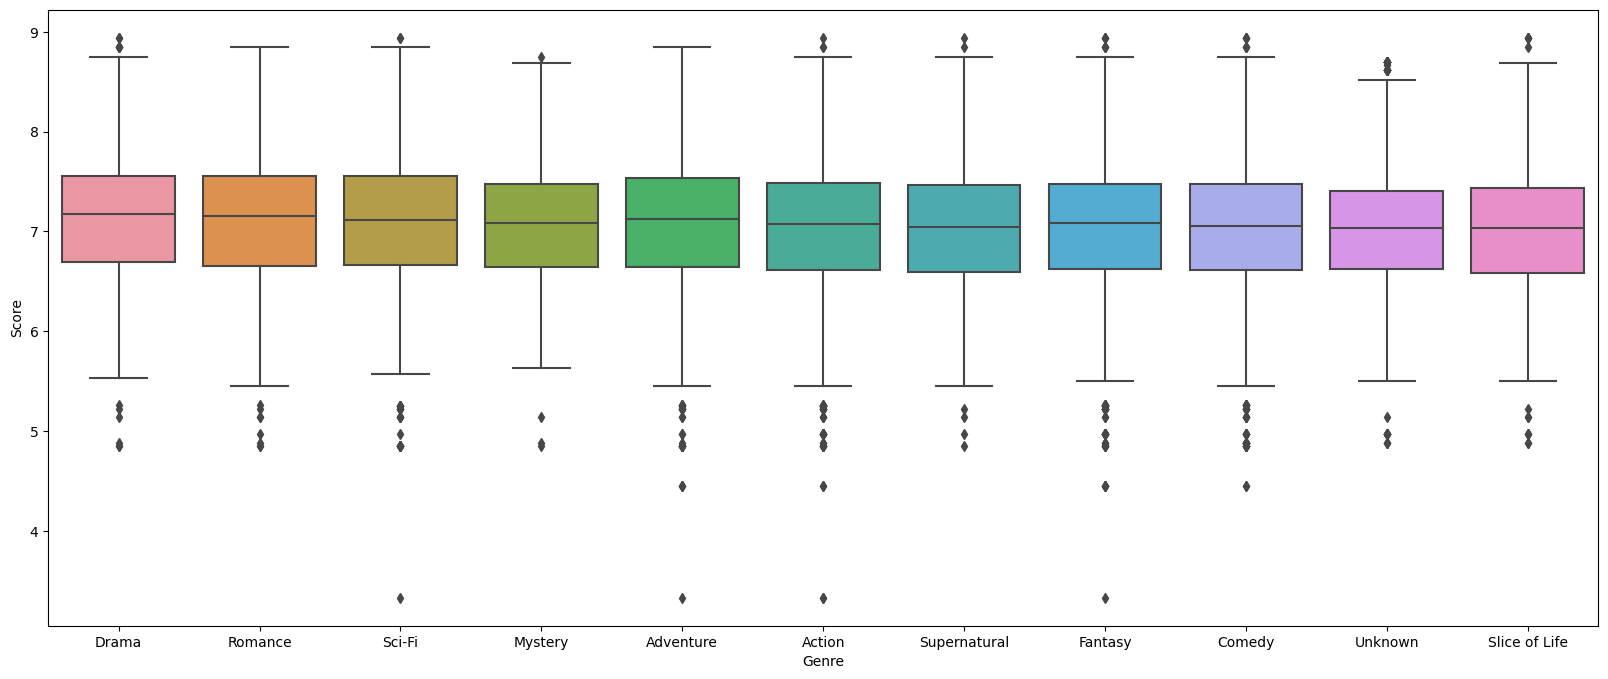

In [78]:

mean = top10.groupby(['Genre'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy_aux,mean,'Genre','Score')

Now we calculate the mean,median, min and max of Scored_by for each Genre. From the top 10 Genres.

It shows that the Genres with better mean are Supernatural, Fantasy and Romance.

In [80]:
# finding the mean, median, min and max of Scored_by
top_10_Scored_by = utils.various(top10,'Genre','Scored_by') 
top_10_Scored_by

Scored_by                      
                       mean   median min      max
Genre                                            
Unknown       163978.337007  14006.5   3  4127786
Fantasy        95315.199395  10673.0   7  4125905
Supernatural   94591.516646  18639.0  22  3688044
Romance        89381.473684  21719.0   6  2011482
Drama          80719.304868  12836.0  22  2554804
Mystery        79976.242563  17548.0  26  1250813
Action         79699.152617   7411.0   6  2554804
Adventure      68579.464250   5500.0  14  3298982
Comedy         68234.668013   8013.0   0  4128912
Sci-Fi         56985.771067   7484.0  17  1866134

Now we calculate the mean,median, min and max of Score for each Genre. From the top 10 Genres.

It confirmas the boxplot, that the Genres with better mean are Romance, Sci-Fi and Drama.

In [79]:
# finding the mean, median, min and max of Score
top_10_Score = utils.various(top10,'Genre','Score') 
top_10_Score

Score                   
                  mean median   min   max
Genre                                    
Drama         7.139107   7.17  4.85  8.94
Romance       7.112974   7.15  4.85  8.85
Sci-Fi        7.095158   7.11  3.33  8.94
Mystery       7.085973   7.08  4.85  8.75
Adventure     7.082613   7.12  3.33  8.85
Action        7.048747   7.07  3.33  8.94
Supernatural  7.044198   7.04  4.85  8.94
Fantasy       7.042160   7.08  3.33  8.94
Comedy        7.038904   7.05  4.45  8.94
Unknown       7.035665   7.03  4.88  8.70

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those where the scores are more regular like Slice of Life, Sci-Fi or Romance 

Those that their score are more iregular like Adventure, Fantasy and Action.

In [81]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Genre').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Genre,,
Adventure,0.096610,2.842514
Action,0.096544,2.644240
Sci-Fi,0.095413,2.829930
Comedy,0.093376,3.566060
Fantasy,0.093103,3.299691
Supernatural,0.092302,2.458614
Slice of Life,0.091559,2.512193
Romance,0.090977,1.860675
Unknown,0.088482,3.433236


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Genres to go for are: Supernatural, Fantasy and Romance.

- 2. If the goal is about the score there are two options:
        - Having the best score but not regular, the best three Genres to go for are: Romance, Sci-Fi and Drama.
        - Not Having the best score but the most regular one, the best three Genres to go for are: Slice of Life, Sci-Fi or Romance.

### Score and Theme

We are going to create an auxiliar dataframe with three columns Theme, Score and Scored_by.

Since the Theme column could have different Theme for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [84]:
# Create a copy of df_copy
df_anime = df_copy.copy()
df_anime = df_anime[(df_anime["Type"] == "ONA") | (df_anime["Type"] == "TV")]
#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Theme_Split'] = df_anime['Theme'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Theme columns with their score
df_copy_aux['Theme'] = pd.Series([x for _list in df_anime['Theme_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Theme', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Theme_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Theme'].isin(df_anime['Theme'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10

We can check grafically the Score of each Theme to see the median. 

This boxplot shows that the median are pretty much the same. But slighly better in Mecha, Military and Super Power. It requieres mores analytical study

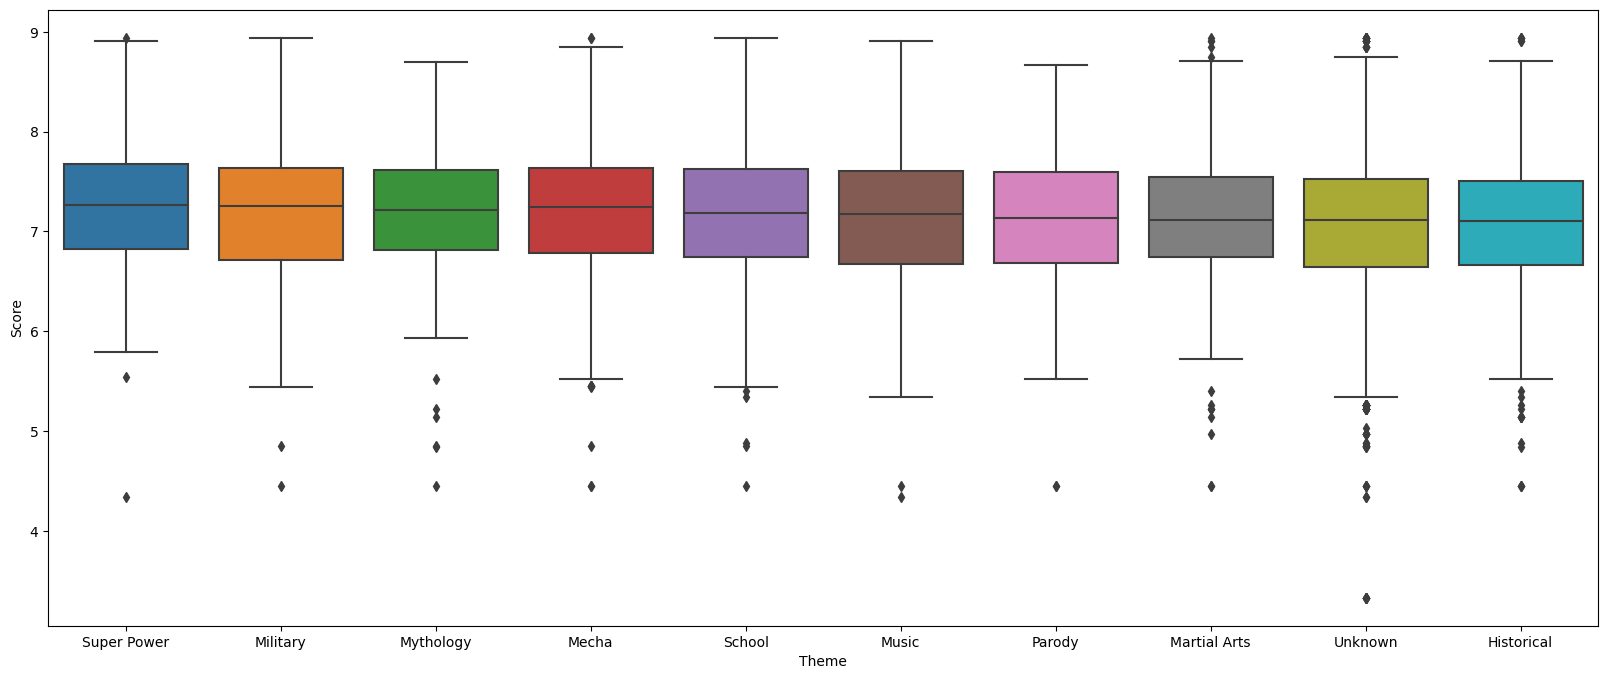

In [85]:
mean = top10.groupby(['Theme'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False).head(10)
utils.box_bidi(df_copy_aux,mean,'Theme','Score')

Now we and calculate the mean,median, min and max of Scored_by for each Theme. From the top 10 Theme.

It shows that the Theme with better mean are Anthropomorphic, School and Super Power.

In [93]:
top_10_Scored_by = utils.various(top10,'Theme','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                       
                          mean   median  min      max
Theme                                                
Anthropomorphic  229096.374587  33403.0   56  4118873
School           109032.196279  30600.0   26  1898783
Super Power      106806.537764  17631.0   41  2047625
Military          97044.083636  12954.0  101  2554804
Unknown           91419.017403   8194.0    0  4128912
Mythology         77054.844291  12320.0   33  1189886
Mecha             52369.015280   4086.0   17  1913288
Parody            51652.462366   4397.0   79  2047625
Historical        46719.970000   4049.5   33  1817526
Martial Arts      41977.829208   2577.5   95  1811391

Now that we have that auxiliar dataframe, we need to unify the Theme by its name and calculate the mean,median, min and max of Score for each Theme. From the top 10 Theme.

It confirms the boxplot, that the Themes with better mean are Mythology, Military and Super Power.

In [87]:
top_10_Score = utils.various(top10,'Theme','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                   
                  mean median   min   max
Theme                                    
Super Power   7.254169  7.260  4.34  8.94
Military      7.226691  7.250  4.45  8.94
Mythology     7.216574  7.210  4.45  8.70
Mecha         7.212673  7.240  4.45  8.94
School        7.188837  7.180  4.45  8.94
Music         7.131835  7.170  4.34  8.91
Parody        7.121532  7.130  4.45  8.67
Martial Arts  7.119724  7.110  4.45  8.94
Unknown       7.091234  7.110  3.33  8.94
Historical    7.089777  7.105  4.45  8.94

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those where the scores are more regular like School, Mecha or Mythology

Those that their score are more iregular like Military or Super Power

In [88]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Theme').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Theme,,
Anthropomorphic,0.105384,3.098722
Military,0.099371,2.948196
Unknown,0.097073,3.824974
Martial Arts,0.096642,4.061181
Music,0.096554,3.487015
Historical,0.095642,2.895665
Parody,0.094162,3.019024
Super Power,0.093960,2.489321
Mecha,0.093074,3.316836


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Themes to go for are: Anthropomorphic, School and Super Power.

- 2. If the goal is about the score there are two options:
        - Having the best score but not regular, the best three Themes to go for are: Mythology, Military and Super Power.
        - Not Having the best score but the most regular one, the best three Themes to go for are: School, Mecha or Mythology.
        

### Score and Producers

We are going to create an auxiliar dataframe with three columns Producers, Score and Scored_by.

Since the Producers column could have different Producers for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [108]:
# Create a copy of df_copy
df_anime = df_copy.copy()
df_anime = df_anime[(df_anime["Type"] == "ONA") | (df_anime["Type"] == "TV")]
#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Producers_Split'] = df_anime['Producers'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the producers columns with their score
df_copy_aux['Producers'] = pd.Series([x for _list in df_anime['Producers_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Producers', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Producers_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Producers'].isin(df_anime['Producers'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10


We can check grafically the Score of each Producer with the median. 

This boxplot shows that the median are pretty much the same. 

It requieres mores analytical study

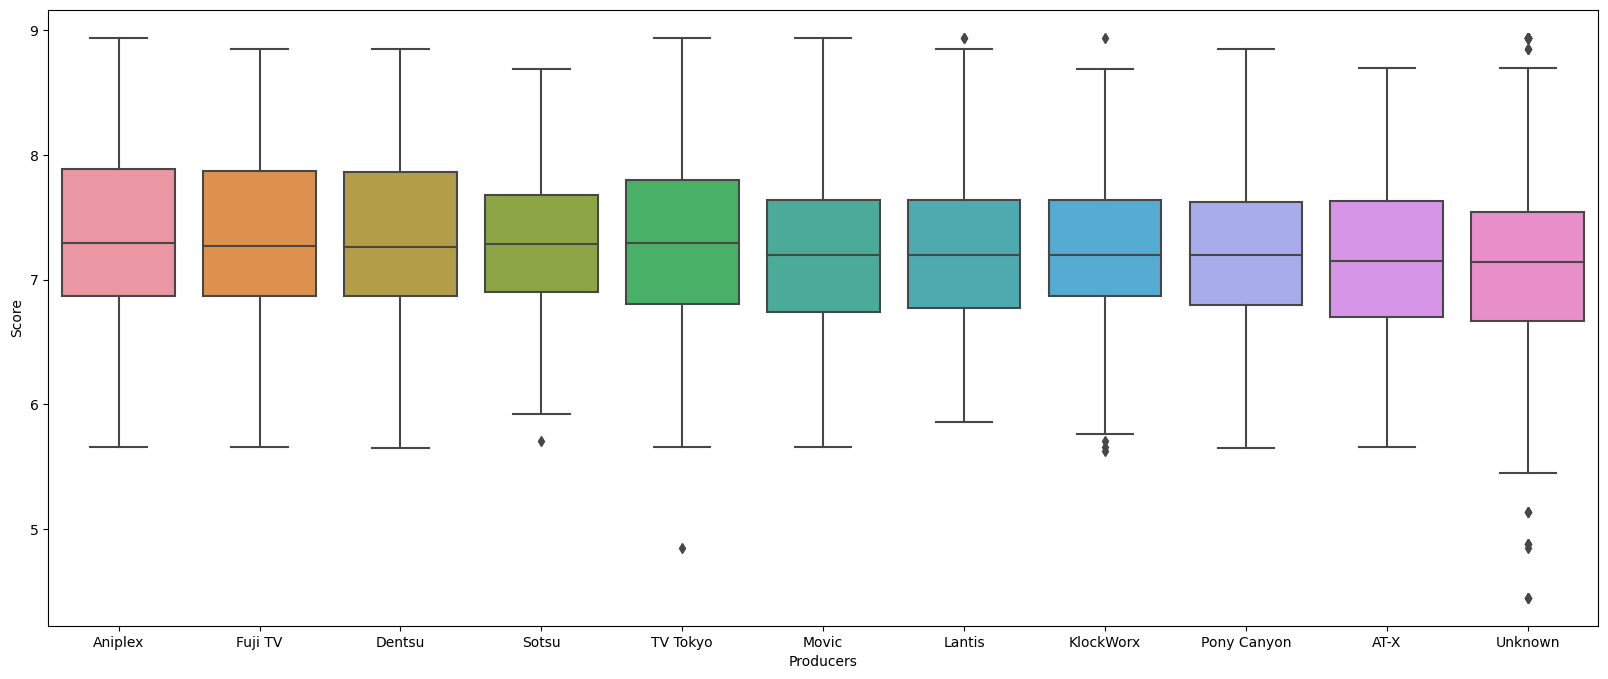

In [109]:
filtered_sco_pro = df_copy[(df_copy["Type"] == "ONA") &  (df_copy["Producers"] != "Unknown") | (df_copy["Type"] == "TV") &  (df_copy["Producers"] != "Unknown")]
mean = top10.groupby(['Producers'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy_aux,mean,'Producers','Score')

Now we calculate the mean,median, min and max of Scored_by for each Producers. From the top 10 Studios.

It shows that the Producers with better mean are Dentsu, Movic and Aniplex.

In [112]:
 # finding the mean, median, min and max of Scored_by
top_10_Scored_by = utils.various(top10,'Producers','Scored_by')
top_10_Scored_by

Scored_by                       
                      mean   median  min      max
Producers                                        
Dentsu       240536.630769  66326.0  251  2554804
Movic        219161.701195  89526.0  228  1898783
Aniplex      213673.638728  84219.0  117  2011482
KlockWorx    183066.379630  84585.0  424  1162643
AT-X         140642.223270  73130.0  169  1442254
Pony Canyon  126837.506073  38033.0  104  2554804
Lantis       115706.581699  46276.5  282  2047625
Fuji TV      114898.162698  24013.0  131  1250813
Unknown      104899.947853   8165.0    0  4128912
TV Tokyo      79604.432018  14281.5  121  2047625

Now that we have that auxiliar dataframe, we need to unify the Producers by its name and calculate the mean,median, min and max of Score for each Producer. From the top 10 Producers.

It shows that the Producers with better mean are Aniplex, Fuji TV and TV Dentsu.

In [113]:
 # finding the mean, median, min and max of Score
top_10_Score = utils.various(top10,'Producers','Score')
top_10_Score

Score                   
                 mean median   min   max
Producers                               
Aniplex      7.337919  7.295  5.66  8.94
Fuji TV      7.308492  7.270  5.66  8.85
Dentsu       7.306346  7.260  5.65  8.85
Sotsu        7.302410  7.290  5.71  8.69
TV Tokyo     7.296360  7.295  4.85  8.94
Movic        7.256853  7.200  5.66  8.94
Lantis       7.245850  7.195  5.86  8.94
KlockWorx    7.237130  7.195  5.63  8.94
Pony Canyon  7.203158  7.200  5.65  8.85
AT-X         7.182925  7.150  5.66  8.70

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those where the scores are more regular like Bandai Visual, Fuji TV and Pony Canyon.

Those that their score are more iregular like Lantis, Movic and Aniplex

In [89]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Producers').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Producers,,
Aniplex,0.114587,1.780259
Lantis,0.113323,2.135781
Movic,0.112961,1.713928
AT-X,0.111794,1.448191
Unknown,0.109032,7.139484
Dentsu,0.108199,1.804679
NHK,0.106444,6.234538
TV Tokyo,0.106250,2.722853
Pony Canyon,0.101995,2.675487


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible and having best score, eventhough we might have iregular score, the best three Producers to go for are: Dentsu, Movic and Aniplex.

- 2. If the goal is to have more regular score,the best three Producers to go for are: Bandai Visual, Fuji TV and TV Tokyo.

### Score and Studios

We are going to create an auxiliar dataframe with three columns Studios, Score and Scored_by.

Since the Studio column could have different Studios for one raw, we need to separate and assign to each one of them the respective Score and Scored_by

In [101]:
# Create a copy of df_copy
df_anime = df_copy.copy()
df_anime = df_anime[(df_anime["Type"] == "ONA")  | (df_anime["Type"] == "TV")]
#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Studios_Split'] = df_anime['Studios'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Studios columns with their score
df_copy_aux['Studios'] = pd.Series([x for _list in df_anime['Studios_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Studios_Split', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Studios_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Studios'].isin(df_anime['Studios'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10


We can check grafically the Score of each studio with the median. 

This boxplot shows that the median are pretty much the same but Shanghai Animation Film Studio seems a bit different than the rest. 

It requieres mores analytical study

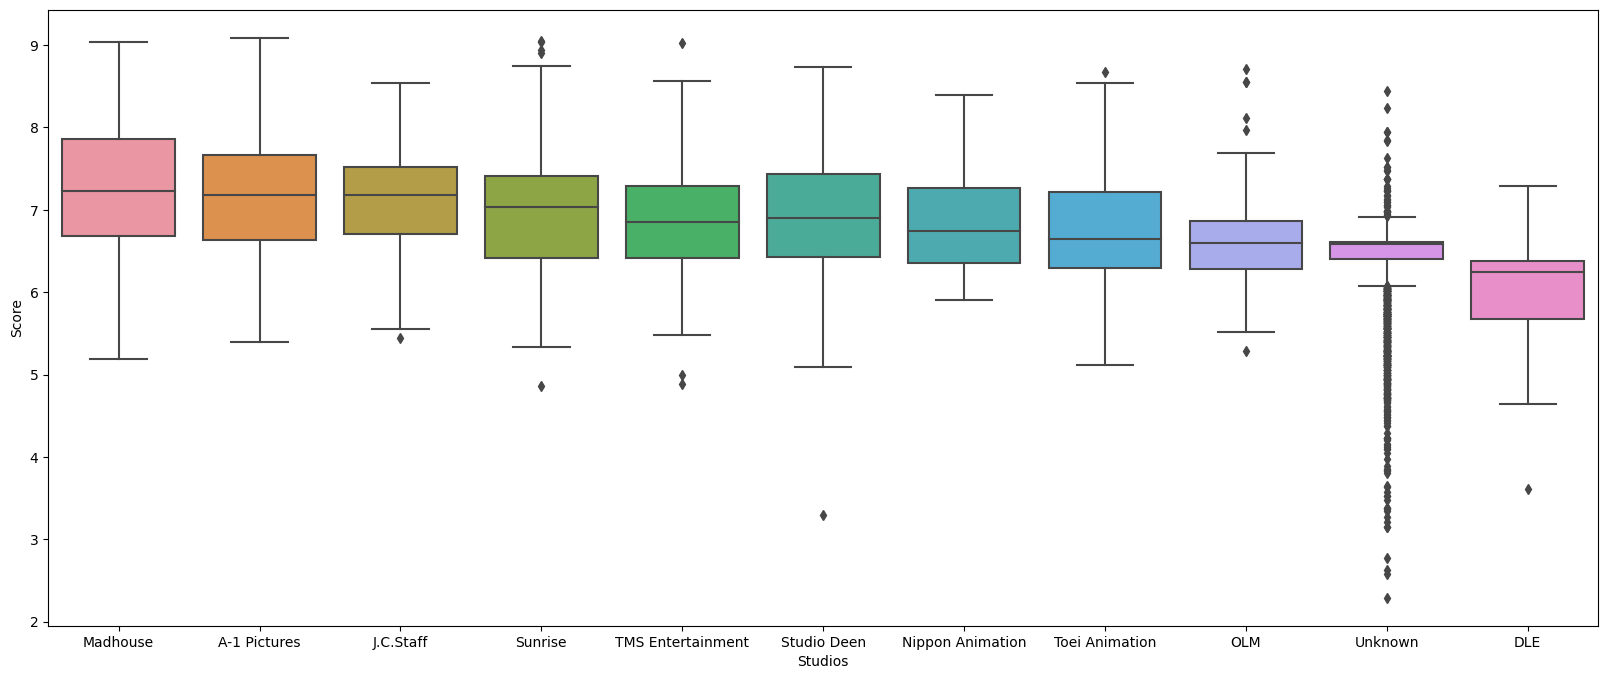

In [102]:
mean = top10.groupby(['Studios'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy_aux,mean,'Studios','Score')

Now we calculate the mean,median, min and max of Scored_by for each Studio. From the top 10 Studios.

It shows that the Studios with better mean are A-1 Pictures, Madhouse and J.C.Staff.

In [103]:
 # finding the mean, median, min and max of Scored_by
top_10_Scored_by = utils.various(top10,'Studios','Scored_by')
top_10_Scored_by

Scored_by                       
                            mean   median  min      max
Studios                                                
A-1 Pictures       226296.566667  67312.5  117  2011482
Madhouse           136257.818750  27311.0  185  2520521
Unknown            122209.659570  10789.0    0  4128912
J.C.Staff          120269.840909  50072.0   38  1288419
Studio Deen         60644.154286  13955.0  126  1162643
TMS Entertainment   54347.591549   7320.0   86   928782
Sunrise             41013.260090   3657.0  117  1298956
DLE                 33921.013889   2676.0  105  1023343
Toei Animation      33364.295302   3125.5   30  1392685
OLM                 24756.507143   4657.0  113   378009

Now that we have that auxiliar dataframe, we need to unify the studios by its name and calculate the mean,median, min and max of Score for each Studio. From the top 10 Studios.

It shows that the Studios with better mean are Madhouse, A-1 Pictures and J.C.Staff.

In [104]:
 # finding the mean, median, min and max of Score
top_10_Score = utils.various(top10,'Studios','Score')
top_10_Score

Score                     
                       mean   median   min   max
Studios                                         
Madhouse           7.229300  7.23000  5.19  9.04
A-1 Pictures       7.193980  7.18500  5.40  9.09
J.C.Staff          7.136574  7.18500  5.44  8.54
Sunrise            6.971141  7.03000  4.86  9.05
TMS Entertainment  6.891308  6.85000  4.88  9.02
Studio Deen        6.885022  6.90000  3.30  8.74
Nippon Animation   6.835087  6.74000  5.90  8.40
Toei Animation     6.778345  6.65000  5.11  8.67
OLM                6.636592  6.59500  5.28  8.71
Unknown            6.404769  6.58208  2.29  8.44

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those where the scores are more regular like Nippon Animation, OLM, DLE.

Those that their score are more iregular like Madhouse, Studio Deen, Sunrise

In [105]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Studios').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Studios,,
Madhouse,0.113166,2.483079
Studio Deen,0.109497,2.249221
Sunrise,0.105083,3.412560
A-1 Pictures,0.102353,1.523294
TMS Entertainment,0.101846,2.235107
Toei Animation,0.092047,3.846230
J.C.Staff,0.090889,1.628922
DLE,0.090169,2.999470
OLM,0.085565,2.378649


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three studios to go for are: A-1 Pictures, Madhouse and J.C.Staff.

- 2. If the goal is about the score there are two options:
        - Having the best score but not regular, the best three studios to go for are: Madhouse, A-1 Pictures and J.C.Staff.
        - Not Having the best score but the most regular one, the best three studios to go for are: Nippon Animation, OLM, DLE.
        

# Conclusions

**From Numerical One Dimensional-Analysis**
- Usual lenght of a series is 11 to 26 episodes
    There is a total of 24105 animes, from those, 11040 are Tv Series or ONA.

    The number of animes that are Tv Series or ONA with more than 100 episodes is 470 out of 11040. Less or equal to 100 episodes is 10570 out of 11040

    Checking the 25th percentile and 75th percentile we get that the Tv Series or ONA animes with less than 100 episodes has between 11 to 26 episodes

    The number of animes that are Tv Series or ONA with less or equal to 26 episodes is 7973 out of 11040 and between 1 to 26 is 5378 out of 11040
    
    We can say that 45,8 % of anime are TV Series and ONA, from those:

        48,71% has between 11 to 26 episodes

        23,51 % les tan 11 episodes

        23,52 % between 27 to 100

        4,26 % more tan 100 episodes

- Usual duration of episodes from 15 to 24 minutes duration
    Basically, from Tv Series or ONA animes, 9904 out of 11040, have 24 or less minutes and just 1136  with more than 24 minutes. 

    There are 8678 animes have between 5 to 24 minutes and are Tv Series or ONA

    From TV series or ONA:

        89,71 % 24 or less minutes duration

        10,29 % more than 24 minutes duration

    From this:

        78,61 % have between 5 to 24 minutes duration

        67,31 % have between 15 to 24 minutes duration

- Usual score fro TV and ONA is between 6.32 and 6.75 points
Checking the boxplot of TV and ONA animes we get that the scores are this:

    From TV and ONA:

        There are 2755 animes with less than 6.32 points

        There are 5549 animes between 6.32 and 6.75 points

        There are 2736 animes with more than 6.75 points

    It means:

        24,96 % with less than 6.32 points 

        50,26 % between 6.32 and 6.75 points 

        24,78 % with more than 6.75 points

- We can see that Bleach: Sennen Kessen-hen is number 1 right now in total Score and Kaguya-sama wa Kokurasetai number 3. Both of them recently released. With time and more votes, they could maintain their position or change it, we would not know until some time pass.

- 2016 was the year that the most anime were released . This was followed by 2017

    From 2000 until today 19105 animes has been released, 79,26 % of all anime.
    - 9853 TV series and ONA has been released
    - 2463 Movies has been released
    - 2178 specials has been released
    - 2620 OVAs has been released
    - 1918 music videos has been released
    - 73 Unknown has been released

    It means:

    - 51,57 % TV series or ONA
    - 12,89 % are movies
    - 11,4 % are specials
    - 13,71 % are OVAs
    - 10,04 % are music videos
    - 0,39 % does not fall to any category



**From Categorical One Dimensional-Analysis**
- Most of the anime are TV type (regular series)

- Most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves)

    From 11040 animes that belong to TV series and ONA. The 63,85 % come from an original source, manga or game.

        38,76 % comes from an Original source

        19,21 % comes from a Manga source

        5,88 % comes from a game source

- PG-13 - Teens 13 or older is the most popular
    - 38,72 % PG-13
    - 26,01 % PG – Children
    - 22,16 % G - All Ages
    - 6,41 % R - 17

- Comedy Genre is the most typical

    The top 10 genres represent the 91,39 % of all anime
    - 20,73 % comedy
    - 15,57 % fantasy
    - 13,1 % action
    - 10,13 % adventure
    - 7,49 % Sci-Fi
    - 6,13 % Drama
    - 6,04 % Slice of Life
    - 5,67 % Romance
    - 4,24 % Supernatural
    - 2,29 % Mystery

- Music, School and history theme are the ones with more animes.

    There are 51 different themes

    We know 8681 anime themes from TV and ONA type

    Top 10 represent 5205, 59,96 % of the total

- NHK, Nippon Hoso Kyokai (Japan Broadcasting Corporation), is the producer with the most anime in the world

    From TV and ONA: TV Tokyo, Aniplex, AT-X are the top 3

    This top 10 (2901) represents the 20,08 %

- Toei Animation is the first private company with the most anime in the world

    From TV and ONA: Toei Animation, Sunrise, J.C.Staff are the top 3 (no change)
    
    We know 6839 anime Studios from TV and ONA type

    This top 10 (2901) represents the 24,87 %



**From Bi-dimensional Analysis**
- **Most valued Types by users:** Taking into account these results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Types to go for are: TV, ONA and Movie.

    - 2. If the goal is about the score there are two options:
            - Having the best score but not regular, the best three Types to go for are: TV, Movie and Specials.
            - Not Having the best score but the most regular one, the best three Types to go for are: TV, Special and Music.

        However, taking also into account the results of the unidimensional analysis of Types:
        - Specials and Music types has less animes then the rest.
        - TV, Movie and OVA has mores animes then the rest
        - ONA is increasing rapidly thanks to the online distribution companies like Netflix.
        We could conclude that, going for TV, Movie and ONA would be the best idea

- **Best source to create an anime:** Taking into account these results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Sources to go for are: Light novel, Original and Manga.

    - 2. If the goal is about the score there are two options:
            - Having the best score but not regular, the best three Sources to go for are: Music, Visual novel and manga.
            - Not Having the best score but the most regular one, the best three Sources to go for are: Music, Visual novel and manga.
                
        However, taking also into account the results of the unidimensional analysis of Sources:
        - Picture book, Book, Radio and Web novel has almost no animes. It would be risky to go for these ones.
        - The best idea would be to go for Light novel, Manga and Original Sources

- **Correlation between Score and of number of episodes:** 
    - <ins>Normality Test:</ins> After perfoming the three different normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. The data is not normally distributed.

    - <ins>Correlation test:</ins> P-value equals 0.000 and Spearmans correlation coefficient: 0.233. A Spearman test is considered as very weak (0.20 to 0.39)

    - <ins>Dependency relationship:</ins> After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

    - <ins>Conclusion:</ins> Results of the test showed there is a positive, weak correlation/dependency between the two variables
    
    - <ins>Observations:</ins> However, in that analysis we are taking into account any type of anime, but we want to focus in TV Series and ONA.

    **Focusing on TV Series and ONA**

    - <ins>Normality Test:</ins> After perfoming the Shapiro-Wilk normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. The data is not normally distributed.
    - <ins>Correlation test:</ins> P-value equals 0.000 and Spearmans correlation coefficient: 0.233. A Spearman test is considered as very weak (0.00 to 0.19)
    - <ins>Dependency relationship:</ins> After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis.  
    - <ins>Conclusion:</ins> Results of the test showed there is a positive, very weak correlation/dependency between the two variables

    - <ins>Final Conclusion:</ins> We have sufficient evidence to conclude that there is a correlation/dependency between the two variables for any type of anime

    - <ins>Other findings:</ins> Seems that the higher concentration of higher scores are between 12 and 25 episodes

- **Correlation between Score and Duration of the episodes:** 
    - <ins>Normality Test:</ins> After perfoming the three different normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis.

    - <ins>Correlation test:</ins>  P-value equals 0.000 and Spearmans correlation coefficient: 0.207. A Spearman test is considered as very weak (0.20 to 0.39)

    - <ins>Dependency relationship:</ins> After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. 

    - <ins>Conclusion:</ins> Results of the test showed there is a positive, weak correlation/dependency between the two variables
    
    - <ins>Observations:</ins> However, in that analysis we are taking into account any type of anime, but we want to focus in TV Series and ONA

    **Focusing on TV Series and ONA**

    - <ins>Normality Test:</ins> After perfoming the Shapiro-Wilk normality test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis. The data is not normally distributed.
    - <ins>Correlation test:</ins> P-value equals 0.000 and Spearmans correlation coefficient: 0.383. A Spearman test is considered as very weak (0.20 to 0.39)
    - <ins>Dependency relationship:</ins> After perfoming the Spearman's dependency test, we have sufficient evidence to reject the null hypothesis and fail to reject the alternative hypothesis.  
    - <ins>Conclusion:</ins> Results of the test showed there is a positive, very weak correlation/dependency between the two variables

    - <ins>Final Conclusion:</ins> We have sufficient evidence to conclude that there is a correlation/dependency between the two variables for any type of anime

- **Best Rating to focus:** Taking into account these results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Ratings to go for are: PG - Children, R - 17+ (violence & profanity) and PG-13 - Teens 13 or older.

    - 2. If the goal is about the score there are two options:
            - Having the best score but not regular, the best three Ratings to go for are: R - 17+ (violence & profanity), PG-13 - Teens 13 or older and PG - Children.
            - Not Having the best score but the most regular one, the best three Ratings to go for are: PG - Children or G - All Ages.

- **Best Genres to use in an anime:** Taking into account these results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Genres to go for are: Supernatural, Fantasy and Romance.

    - 2. If the goal is about the score there are two options:
            - Having the best score but not regular, the best three Genres to go for are: Romance, Sci-Fi and Drama.
            - Not Having the best score but the most regular one, the best three Genres to go for are: Slice of Life, Sci-Fi or Romance.

- **Best themes to use in an anime:** Taking into account these results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Themes to go for are: Anthropomorphic, School and Super Power.

    - 2. If the goal is about the score there are two options:
            - Having the best score but not regular, the best three Themes to go for are: Mythology, Military and Super Power.
            - Not Having the best score but the most regular one, the best three Themes to go for are: School, Mecha or Mythology.

- **Best producers to hire:** Taking into account these results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible and having best score, eventhough we might have iregular score, the best three Producers to go for are: Dentsu, Movic and Aniplex.

    - 2. If the goal is to have more regular score,the best three Producers to go for are: Bandai Visual, Fuji TV and TV Tokyo.

- **Best studios to hire:** It will depend of the goal. Taking into account these results, this are the possible ways to go for.
    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three studios to go for are: A-1 Pictures, Madhouse and J.C.Staff.

    - 2. If the goal is about the score there are two options:
            - Having the best score but not regular, the best three studios to go for are: Madhouse, A-1 Pictures and J.C.Staff.
            - Not Having the best score but the most regular one, the best three studios to go for are: Nippon Animation, OLM, DLE.

# References 

- [MyAnimeList.net](https://myanimelist.net/)
- [from Data to Viz](https://www.data-to-viz.com/#connectedscatter)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib Documentation](https://matplotlib.org/)
- [Data Visualization con pandas y seaborn](https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f)
- [The Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Stack Overflow](https://stackoverflow.com/)
- [codificandobits](https://www.codificandobits.com/blog/analisis-exploratorio-de-datos/)
- [Towards data science](https://towardsdatascience.com/beautifying-the-messy-plots-in-python-solving-common-issues-in-seaborn-7372e6479fb)
- [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)